**Customer Personality Analysis**<br><br>
Created by: 
Noor Kharismawan Akbar (JCDSOL-009-038)

<hr>

# **A. Background**

**`Customer Personality Analysis`** adalah dataset pelanggan di suatu perusahaan yang terletak di USA pada tahun 2012-2014. Perusahaan ini menjual berbagai jenis produk seperti wine, buah, daging, ikan, manisan/permen, dan emas. Perusahaan ini juga membuka marketplace pada beberapa opsi seperti web, katalog, dan toko. Perusahaan ini juga telah berkali-kali melakukan campaign dan memberi diskon. Namun, tidak semua tawaran campaign diterima pelanggan & tidak semua diskon dapat menarik pembeli yang dapat menjadi customer loyal.

<hr>

# **B. Problem Statement**

Perusahan ingin mengetahui customer mana yang memberikan profit yang banyak ke perusahaan. Kemudian juga ingin diketahui customer mana yang cenderung menerima tawaran campaign. Informasi ini akan digunakan perusahaan untuk membantu melakukan efisiensi dalam biaya, waktu, dan tenaga dalam promosi & campaign. Analisis ini dapat membantu bisnis untuk memodifikasi marketplace, produk, dan campaign berdasarkan target pelanggannya dari berbagai jenis segmen.

Pada analisis ini, akan dijawab pertanyaan yang secara garis besar sebagai berikut:<br>
* Bagaimana **kinerja penjualan produk** saat ini? 
Barang apa yang paling sering dibeli dan memberikan pemasukan yang banyak bagi perusahaan, serta melalui apa mereka membelinya?
* Bagaimana **kinerja marketing campaign** saat ini?
Bagaimana juga karakteristik customer yang menerima tawaran campaign, terutama dibandingkan customer yang menolak?
* Bagaimana juga **karakteristik customer** saat ini & customer terbaik (yang baru-baru membeli, paling sering, dan merupakan pembelanja berat)?

<hr>

# **C. Data**

Untuk menyelesaikan permasalahan ini, Digunakan dataset `marketing_campaign.csv` yang berasal dari proyek **Dr. Omar Romero-Hernandez**. Dataset ini dapat diunduh [di laman ini](https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis)

**Column Description**:
* People
    * ID: ID unik pelanggan
    * Year_Birth: Tahun lahir pelanggan
    * Education: Tingkat pendidikan pelanggan
    * Marital_Status: Status perkawinan pelanggan
    * Income: Pendapatan rumah tangga tahunan pelanggan
    * Kidhome: Jumlah anak dalam rumah tangga pelanggan
    * Teenhome: Jumlah remaja dalam rumah tangga pelanggan
    * Dt_Customer: Tanggal pendaftaran pelanggan dengan perusahaan
    * Recency: Jumlah hari sejak pembelian terakhir pelanggan
    * Complain: 1 jika pelanggan melakukan komplain dalam 2 tahun terakhir, 0 jika tidak
* Product
    * MntWines: Amount spent untuk wine dalam 2 tahun terakhir
    * MntFruits: Amount spent untuk buah-buahan dalam 2 tahun terakhir
    * MntMeatProducts: Amount spent untuk daging dalam 2 tahun terakhir
    * MntFishProducts: Amount spent untuk membeli ikan dalam 2 tahun terakhir
    * MntSweetProducts: Amount spent untuk permen dalam 2 tahun terakhir
    * MntGoldProds: Amount spent untuk emas dalam 2 tahun terakhir
* Promotion
    * NumDealsPurchases: Jumlah pembelian yang dilakukan dengan diskon
    * AcceptedCmp1: 1 jika pelanggan menerima penawaran di campaign pertama, 0 jika tidak
    * AcceptedCmp2: 1 jika pelanggan menerima penawaran di campaign ke-2, 0 jika tidak
    * AcceptedCmp3: 1 jika pelanggan menerima penawaran di campaign ke-3, 0 jika tidak
    * AcceptedCmp4: 1 jika pelanggan menerima penawaran di campaign ke-4, 0 jika tidak
    * AcceptedCmp5: 1 jika pelanggan menerima penawaran di campaign ke-5, 0 jika tidak
    * Response: 1 jika pelanggan menerima tawaran di campaign terakhir, 0 jika tidak
* Place
    * NumWebPurchases: Jumlah pembelian yang dilakukan melalui situs web perusahaan
    * NumCatalogPurchases: Jumlah pembelian yang dilakukan menggunakan katalog
    * NumStorePurchases: Jumlah pembelian yang dilakukan langsung di toko
    * NumWebVisitsMonth: Jumlah kunjungan ke website perusahaan dalam sebulan terakhir

<hr>

## **C.1 Import Libraries & Load Dataset**

Import Libraries yang dibutuhkan dalam notebook ini.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import missingno as mn
from scipy.stats import normaltest, chi2_contingency, mannwhitneyu, ttest_ind
from statsmodels.stats.proportion import proportions_ztest

import warnings
warnings.filterwarnings("ignore")

Menggunakan `display.max_columns` untuk menampilkan semua kolom dalam dataset.

In [2]:
pd.set_option('display.max_columns', None)

Menggunakan separator `\t` untuk memisahkan setiap kolom pada dataset.

In [3]:
df = pd.read_csv('marketing_campaign.csv', sep = '\t')

In [4]:
df.head()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
0  04-09-2012       58       635         88              546              172   
1  08-03-2014       38        11          1                6                2   
2  21-08-2013       26       426         49              127              111   
3  10-02-2014       26        11          4               20               10   
4  19-01-2014       94       173         43              118               46   

   MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  \
0                88            88                  3                8   
1                 1             6                  2                1   
2                21            42                  1                8   
3                 3             5                  2                2   
4                27            15                  5                5   

   NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  \
0                   10                  4                  7             0   
1                    1                  2                  5             0   
2                    2                 10                  4             0   
3                    0                  4                  6             0   
4                    3                  6                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response  
0              3         11         1  
1              3         11         0  
2              3         11         0  
3              3         11         0  
4              3         11         0

<hr>

## **C.2 Data Understanding**

### C.2.a Ukuran Dataset

Untuk mengetahui jumlah baris dan kolom pada dataset.

In [5]:
print('Jumlah (Baris, Kolom):',df.shape)

Jumlah (Baris, Kolom): (2240, 29)


### C.2.b Informasi Dataset

Untuk mengetahui nama kolom, jumlah non-null value, dan datatype.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

Dari informasi dataset diatas, terdapat berbagai tipe data yang dapat dikelompokkan menjadi data **Kuantitatif** dan **Kualitatif**.

### C.2.c Statistik Data

Berikut ringkasan statistik dari kolom yang berisi data **Kuantitatif**

In [7]:
df.describe().T

count          mean           std     min       25%  \
ID                   2240.0   5592.159821   3246.662198     0.0   2828.25   
Year_Birth           2240.0   1968.805804     11.984069  1893.0   1959.00   
Income               2216.0  52247.251354  25173.076661  1730.0  35303.00   
Kidhome              2240.0      0.444196      0.538398     0.0      0.00   
Teenhome             2240.0      0.506250      0.544538     0.0      0.00   
Recency              2240.0     49.109375     28.962453     0.0     24.00   
MntWines             2240.0    303.935714    336.597393     0.0     23.75   
MntFruits            2240.0     26.302232     39.773434     0.0      1.00   
MntMeatProducts      2240.0    166.950000    225.715373     0.0     16.00   
MntFishProducts      2240.0     37.525446     54.628979     0.0      3.00   
MntSweetProducts     2240.0     27.062946     41.280498     0.0      1.00   
MntGoldProds         2240.0     44.021875     52.167439     0.0      9.00   
NumDealsPurchases    2240.0      2.325000      1.932238     0.0      1.00   
NumWebPurchases      2240.0      4.084821      2.778714     0.0      2.00   
NumCatalogPurchases  2240.0      2.662054      2.923101     0.0      0.00   
NumStorePurchases    2240.0      5.790179      3.250958     0.0      3.00   
NumWebVisitsMonth    2240.0      5.316518      2.426645     0.0      3.00   
AcceptedCmp3         2240.0      0.072768      0.259813     0.0      0.00   
AcceptedCmp4         2240.0      0.074554      0.262728     0.0      0.00   
AcceptedCmp5         2240.0      0.072768      0.259813     0.0      0.00   
AcceptedCmp1         2240.0      0.064286      0.245316     0.0      0.00   
AcceptedCmp2         2240.0      0.013393      0.114976     0.0      0.00   
Complain             2240.0      0.009375      0.096391     0.0      0.00   
Z_CostContact        2240.0      3.000000      0.000000     3.0      3.00   
Z_Revenue            2240.0     11.000000      0.000000    11.0     11.00   
Response             2240.0      0.149107      0.356274     0.0      0.00   

                         50%       75%       max  
ID                    5458.5   8427.75   11191.0  
Year_Birth            1970.0   1977.00    1996.0  
Income               51381.5  68522.00  666666.0  
Kidhome                  0.0      1.00       2.0  
Teenhome                 0.0      1.00       2.0  
Recency                 49.0     74.00      99.0  
MntWines               173.5    504.25    1493.0  
MntFruits                8.0     33.00     199.0  
MntMeatProducts         67.0    232.00    1725.0  
MntFishProducts         12.0     50.00     259.0  
MntSweetProducts         8.0     33.00     263.0  
MntGoldProds            24.0     56.00     362.0  
NumDealsPurchases        2.0      3.00      15.0  
NumWebPurchases          4.0      6.00      27.0  
NumCatalogPurchases      2.0      4.00      28.0  
NumStorePurchases        5.0      8.00      13.0  
NumWebVisitsMonth        6.0      7.00      20.0  
AcceptedCmp3             0.0      0.00       1.0  
AcceptedCmp4             0.0      0.00       1.0  
AcceptedCmp5             0.0      0.00       1.0  
AcceptedCmp1             0.0      0.00       1.0  
AcceptedCmp2             0.0      0.00       1.0  
Complain                 0.0      0.00       1.0  
Z_CostContact            3.0      3.00       3.0  
Z_Revenue               11.0     11.00      11.0  
Response                 0.0      0.00       1.0

Dari tabel deskripsi statistik untuk kolom data kuantitatif, didapati bahwa semua kolom tersebut merupakan variabel [Kuantitatif-Ratio](https://www.questionpro.com/blog/ratio-scale-vs-interval-scale/#:~:text=The%20difference%20between%20interval%20vs,hand%2C%20never%20fall%20below%20zero.), karena mempunyai nilai true zero dan tidak bisa merepresentasikan value dibawah nol.

Berikut ringkasan statistik dari kolom yang berisi data **Kualitatif**

In [8]:
df.describe(include='object').T

count unique         top  freq
Education       2240      5  Graduation  1127
Marital_Status  2240      8     Married   864
Dt_Customer     2240    663  31-08-2012    12

Kemudian, untuk data kualitatif, terdiri dari 3 kolom dimana kolom `Education` merupakan variabel [Kuantitatif-Ordinal](https://www.simplilearn.com/what-is-nominal-data-article#:~:text=The%20main%20differences%20between%20Nominal,between%E2%80%9D%20qualitative%20and%20quantitative%20data.) karena tingkat pendidikan dapat diurutkan. Sementara kolom `Marital_Status` merupakan variabel [Kuantitatif-Nominal](https://www.simplilearn.com/what-is-nominal-data-article#:~:text=The%20main%20differences%20between%20Nominal,between%E2%80%9D%20qualitative%20and%20quantitative%20data.) karena status perkawinan tidak dapat diurutkan. Sementara kolom `Dt_Customer` yang berisi tanggal pendaftaran customer *seharusnya* yang bertipe data timestamp merupakan variabel [Kuantitatif-Ordinal](https://openclassrooms.com/en/courses/6037301-perform-an-initial-data-analysis/6051886-discover-the-four-variable-types#:~:text=However%2C%20since%20adding%20timestamps%20together,is%20considered%20a%20qualitative%20variable.)

### C.2.d Unique Value

Setelah mengetahui tipe data dan variabel per kolom nya. Mari kita lihat jumlah unique value & unique data nya.

In [9]:
list_item = []
for col in df.columns:
    list_item.append([col,df[col].nunique(),df[col].unique()])

tabel_desc = pd.DataFrame(columns=['Column Name','Num of Unique','Unique Data'],data=list_item)

In [10]:
pd.set_option('display.max_colwidth',-1)
tabel_desc

Column Name  Num of Unique  \
0   ID                   2240            
1   Year_Birth           59              
2   Education            5               
3   Marital_Status       8               
4   Income               1974            
5   Kidhome              3               
6   Teenhome             3               
7   Dt_Customer          663             
8   Recency              100             
9   MntWines             776             
10  MntFruits            158             
11  MntMeatProducts      558             
12  MntFishProducts      182             
13  MntSweetProducts     177             
14  MntGoldProds         213             
15  NumDealsPurchases    15              
16  NumWebPurchases      15              
17  NumCatalogPurchases  14              
18  NumStorePurchases    14              
19  NumWebVisitsMonth    16              
20  AcceptedCmp3         2               
21  AcceptedCmp4         2               
22  AcceptedCmp5         2               
23  AcceptedCmp1         2               
24  AcceptedCmp2         2               
25  Complain             2               
26  Z_CostContact        1               
27  Z_Revenue            1               
28  Response             2               

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              Unique Data  
0   [5524, 2174, 4141, 6182, 5324, 7446, 965, 6177, 4855, 5899, 1994, 387, 2125, 8180, 2569, 2114, 9736, 4939, 6565, 2278, 9360, 5376, 1993, 4047, 1409, 7892, 2404, 5255, 9422, 1966, 6864, 3033, 5710, 7373, 8755, 10738, 4339, 10755, 8595, 2968, 8601, 503, 8430, 7281, 2139, 1371, 9909, 7286, 7244, 6566, 8614, 4114, 1331, 2225, 9381, 6260, 10383, 7437, 8557, 8375, 6853, 3076, 1012, 6518, 4137, 8082, 1386, 9369, 4477, 1357, 1402, 10629, 6312, 8132, 1050, 5846, 1859, 7503, 10401, 1618, 3332, 2261, 5346, 4119, 535, 5268, 273, 4452, 8504, 771, 8996, 9235, 5798, 11178, 2230, 7516, 7247, 11100, 4646, 3037, ...]                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         
1   [1957, 1954, 1965, 1984, 1981, 1967, 1971, 1985, 1974, 1950, 1983, 1976, 1959, 1952, 1987, 1946, 1980, 1949, 1982, 1979, 1951, 1969, 1986, 1989, 1963, 1970, 1973, 1943, 1975, 1996, 1968, 1964, 1977, 1978, 1955, 1966, 1988, 1948, 1958, 1972, 1960, 1945, 1991, 1962, 1953, 1961, 1956, 1992, 1900, 1893, 1990, 1947, 1899, 1993

Dilihat dari **Unique Data** pada tabel diatas:
* Terdapat 2 kolom yaitu `Z_CostContact` & `Z_Revenue` yang hanya memiliki 1 unique value.
* Terdapat 7 kolom yaitu `AcceptedCmp3`, `AcceptedCmp4`, `AcceptedCmp5`, `AcceptedCmp1`, `AcceptedCmp2`, `Complain`, `Response` yang merupakan boolean (berisi 0 atau 1).
* Untuk 20 kolom lain, memiliki unique value lebih dari 2.
* **tidak terdapat typo atau kesalahan pengetikan**. Selanjutnya, kita akan mengecek apakah ada data kosong / missing value pada dataset.

### C.2.e Missing Value

In [11]:
df.isna().sum()

ID                     0 
Year_Birth             0 
Education              0 
Marital_Status         0 
Income                 24
Kidhome                0 
Teenhome               0 
Dt_Customer            0 
Recency                0 
MntWines               0 
MntFruits              0 
MntMeatProducts        0 
MntFishProducts        0 
MntSweetProducts       0 
MntGoldProds           0 
NumDealsPurchases      0 
NumWebPurchases        0 
NumCatalogPurchases    0 
NumStorePurchases      0 
NumWebVisitsMonth      0 
AcceptedCmp3           0 
AcceptedCmp4           0 
AcceptedCmp5           0 
AcceptedCmp1           0 
AcceptedCmp2           0 
Complain               0 
Z_CostContact          0 
Z_Revenue              0 
Response               0 
dtype: int64

Ternyata terdapat missing value pada kolom `Income`, mari kita lihat persentase nya.

In [12]:
#Missing value percentage
df.isna().sum()/df.shape[0]*100

ID                     0.000000
Year_Birth             0.000000
Education              0.000000
Marital_Status         0.000000
Income                 1.071429
Kidhome                0.000000
Teenhome               0.000000
Dt_Customer            0.000000
Recency                0.000000
MntWines               0.000000
MntFruits              0.000000
MntMeatProducts        0.000000
MntFishProducts        0.000000
MntSweetProducts       0.000000
MntGoldProds           0.000000
NumDealsPurchases      0.000000
NumWebPurchases        0.000000
NumCatalogPurchases    0.000000
NumStorePurchases      0.000000
NumWebVisitsMonth      0.000000
AcceptedCmp3           0.000000
AcceptedCmp4           0.000000
AcceptedCmp5           0.000000
AcceptedCmp1           0.000000
AcceptedCmp2           0.000000
Complain               0.000000
Z_CostContact          0.000000
Z_Revenue              0.000000
Response               0.000000
dtype: float64

Persentase missing value pada kolom `Income` sebesar 1,07%.

### C.2.f Duplicated Value

Langkah terakhir dalam data understanding, kita cek **Data duplikat**

In [13]:
df.duplicated().sum()

0

Tidak terdapat data duplikat dalam dataset ini.

### C.2.g Ringkasan

Dari Informasi yang telah dikumpulkan melalui data understanding, berikut ringkasan nya:
* Dataset Customer Personality Analysis (`marketing_campaign.csv`) memiliki 2.240 baris dan 29 kolom.
* Dataset ini memiliki tipe data float64 sebanyak 1 kolom, int64 sebanyak 25 kolom, dan object sebanyak 3 kolom.
* Kolom `ID` memiliki jumlah unique value sebanyak jumlah baris pada dataset ini (2.240 buah).
* Kolom `Education` memiliki beberapa value yang memiliki arti/penafsiran yang sama.
* Kolom `Dt_Customer` (dengan tipe data object) yang berisi tanggal pendaftaran seharusnya memiliki tipe data datetime.
* Dari 25 kolom yang memiliki tipe data int64, terdapat 7 kolom yang memiliki tipe data boolean:
`AcceptedCmp3`, `AcceptedCmp4`, `AcceptedCmp5`, `AcceptedCmp1`, `AcceptedCmp2`, `Complain`, `Response`.
* Kolom `Z_CostContact` dan `Z_Revenue` hanya memiliki 1 unique value, serta tidak ada penjelasan mengenai kolom ini.
* Kolom `Income` memiliki data kosong sebanyak 24 buah
* Tidak terdapat data duplikat

<hr>

## **C.3 Data Cleaning**

### C.3.a Menghandle Missing Value

#### Analisis Missing Value

Untuk menghandle missing value pada dataset ini, berdasarkan artikel ["A Guide to Handling Missing values in Python"](https://www.kaggle.com/code/parulpandey/a-guide-to-handling-missing-values-in-python) dari Kaggle, akan dilakukan:
* Peninjauan letak & persebaran baris yang memiliki missing value menggunakan Tabel & Matrix
* Analisis korelasi missing value menggunakan Heatmap
* Analisis clustering menggunakan [Dendrogram](https://en.wikipedia.org/wiki/Dendrogram)

Menampilkan baris yang mengandung missing value pada dataset.

In [14]:
df[df['Income'].isna()]

ID  Year_Birth   Education Marital_Status  Income  Kidhome  Teenhome  \
10    1994   1983        Graduation  Married       NaN      1        0          
27    5255   1986        Graduation  Single        NaN      1        0          
43    7281   1959        PhD         Single        NaN      0        0          
48    7244   1951        Graduation  Single        NaN      2        1          
58    8557   1982        Graduation  Single        NaN      1        0          
71    10629  1973        2n Cycle    Married       NaN      1        0          
90    8996   1957        PhD         Married       NaN      2        1          
91    9235   1957        Graduation  Single        NaN      1        1          
92    5798   1973        Master      Together      NaN      0        0          
128   8268   1961        PhD         Married       NaN      0        1          
133   1295   1963        Graduation  Married       NaN      0        1          
312   2437   1989        Graduation  Married       NaN      0        0          
319   2863   1970        Graduation  Single        NaN      1        2          
1379  10475  1970        Master      Together      NaN      0        1          
1382  2902   1958        Graduation  Together      NaN      1        1          
1383  4345   1964        2n Cycle    Single        NaN      1        1          
1386  3769   1972        PhD         Together      NaN      1        0          
2059  7187   1969        Master      Together      NaN      1        1          
2061  1612   1981        PhD         Single        NaN      1        0          
2078  5079   1971        Graduation  Married       NaN      1        1          
2079  10339  1954        Master      Together      NaN      0        1          
2081  3117   1955        Graduation  Single        NaN      0        1          
2084  5250   1943        Master      Widow         NaN      0        0          
2228  8720   1978        2n Cycle    Together      NaN      0        0          

     Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  \
10    15-11-2013  11       5         5          6                 
27    20-02-2013  19       5         1          3                 
43    05-11-2013  80       81        11         50                
48    01-01-2014  96       48        5          48                
58    17-06-2013  57       11        3          22                
71    14-09-2012  25       25        3          43                
90    19-11-2012  4        230       42         192               
91    27-05-2014  45       7         0          8                 
92    23-11-2013  87       445       37         359               
128   11-07-2013  23       352       0          27                
133   11-08-2013  96       231       65         196               
312   03-06-2013  69       861       138        461               
319   23-08-2013  67       738       20         172               
1379  01-04-2013  39       187       5          65                
1382  03-09-2012  87       19        4          12                
1383  12-01-2014  49       5         1          9                 
1386  02-03-2014  17       25        1          13                
2059  18-05-2013  52       375       42         48                
2061  31-05-2013  82       23        0          15                
2078  03-03-2013  82       71        1          16                
2079  23-06-2013  83       161       0          22                
2081  18-10-2013  95       264       0          21                
2084  30-10-2013  75       532       126        490               
2228  12-08-2012  53       32        2          1607              

      MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
10    0                2                 1             1                   
27    3                263               362           0                   
43    3                2                 39            1                   
48 

Kemudian kita akan melihat persebaran missing value pada dataset.

<AxesSubplot: >

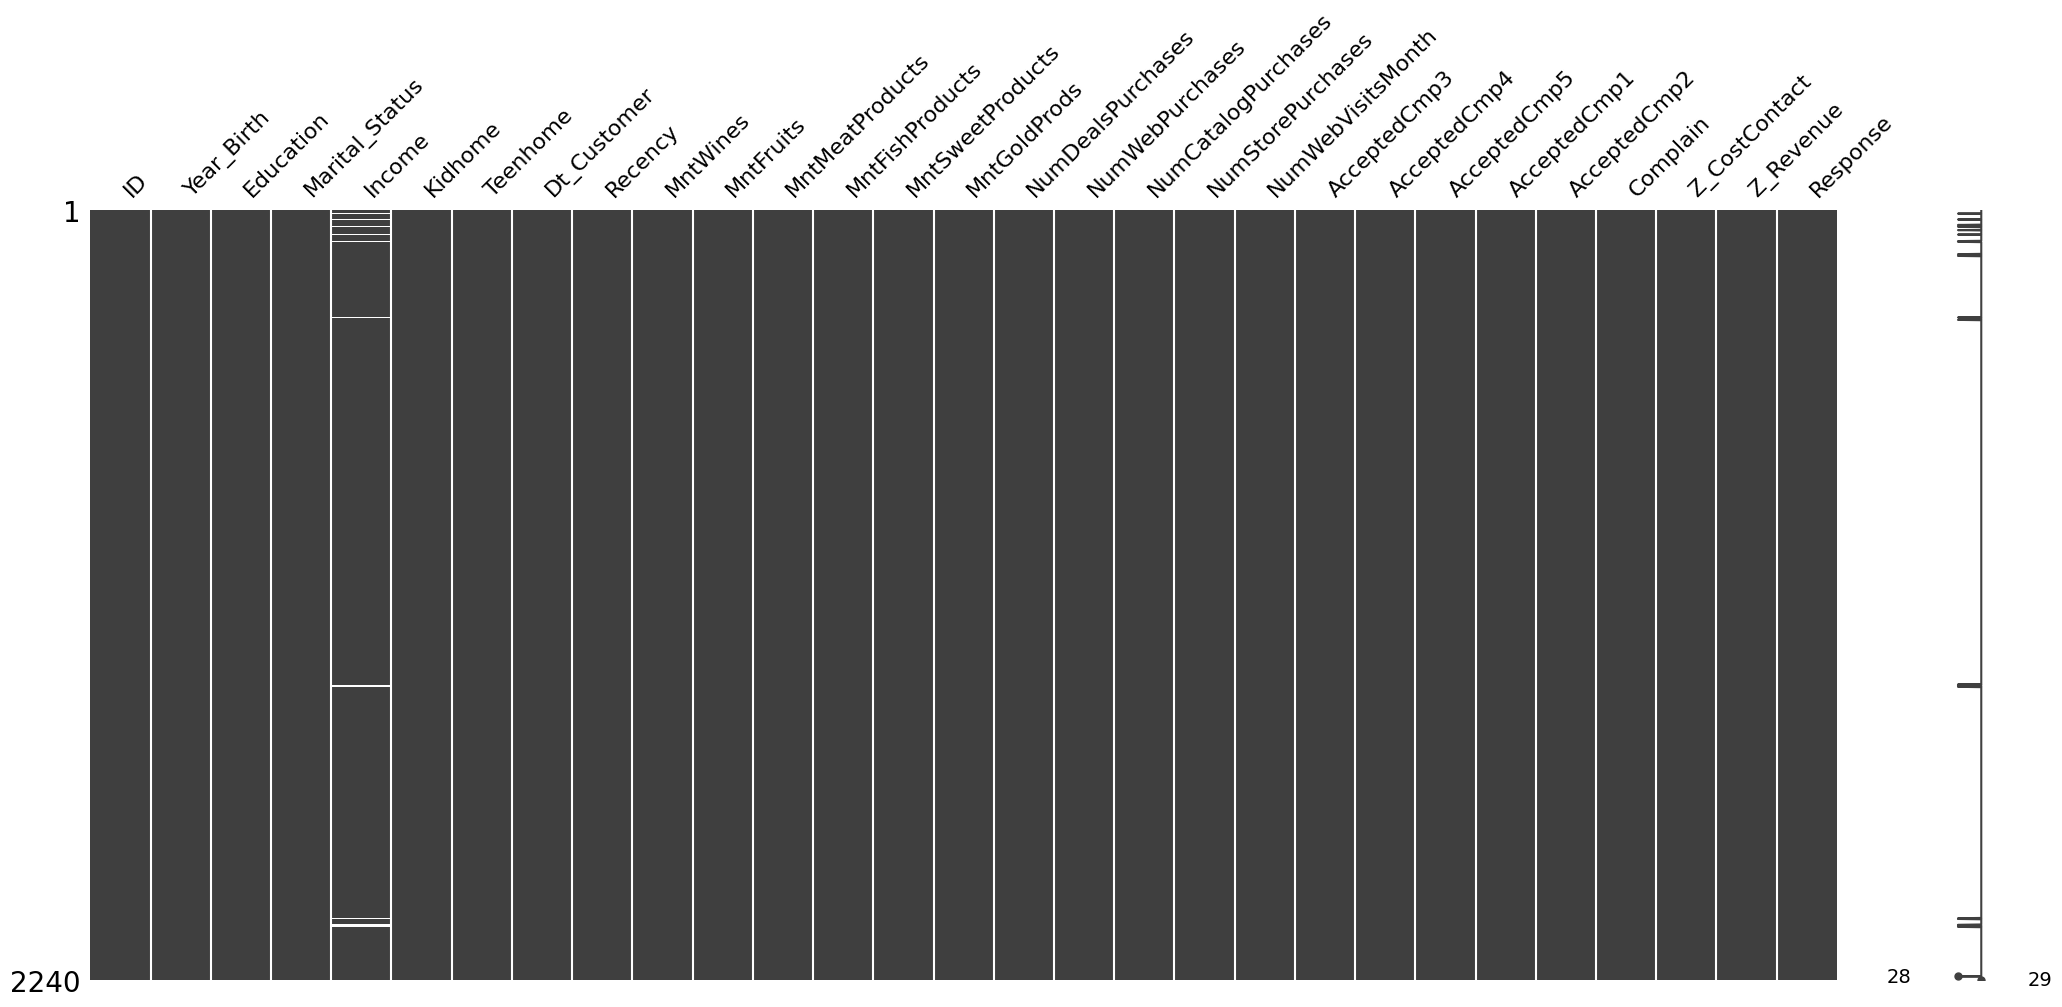

In [15]:
mn.matrix(df)

Terlihat persebaran missing value cukup **acak** dalam dataset

Selanjutnya kita akan menampilkan heatmap untuk kolom yang mengandung missing value.

<AxesSubplot: >

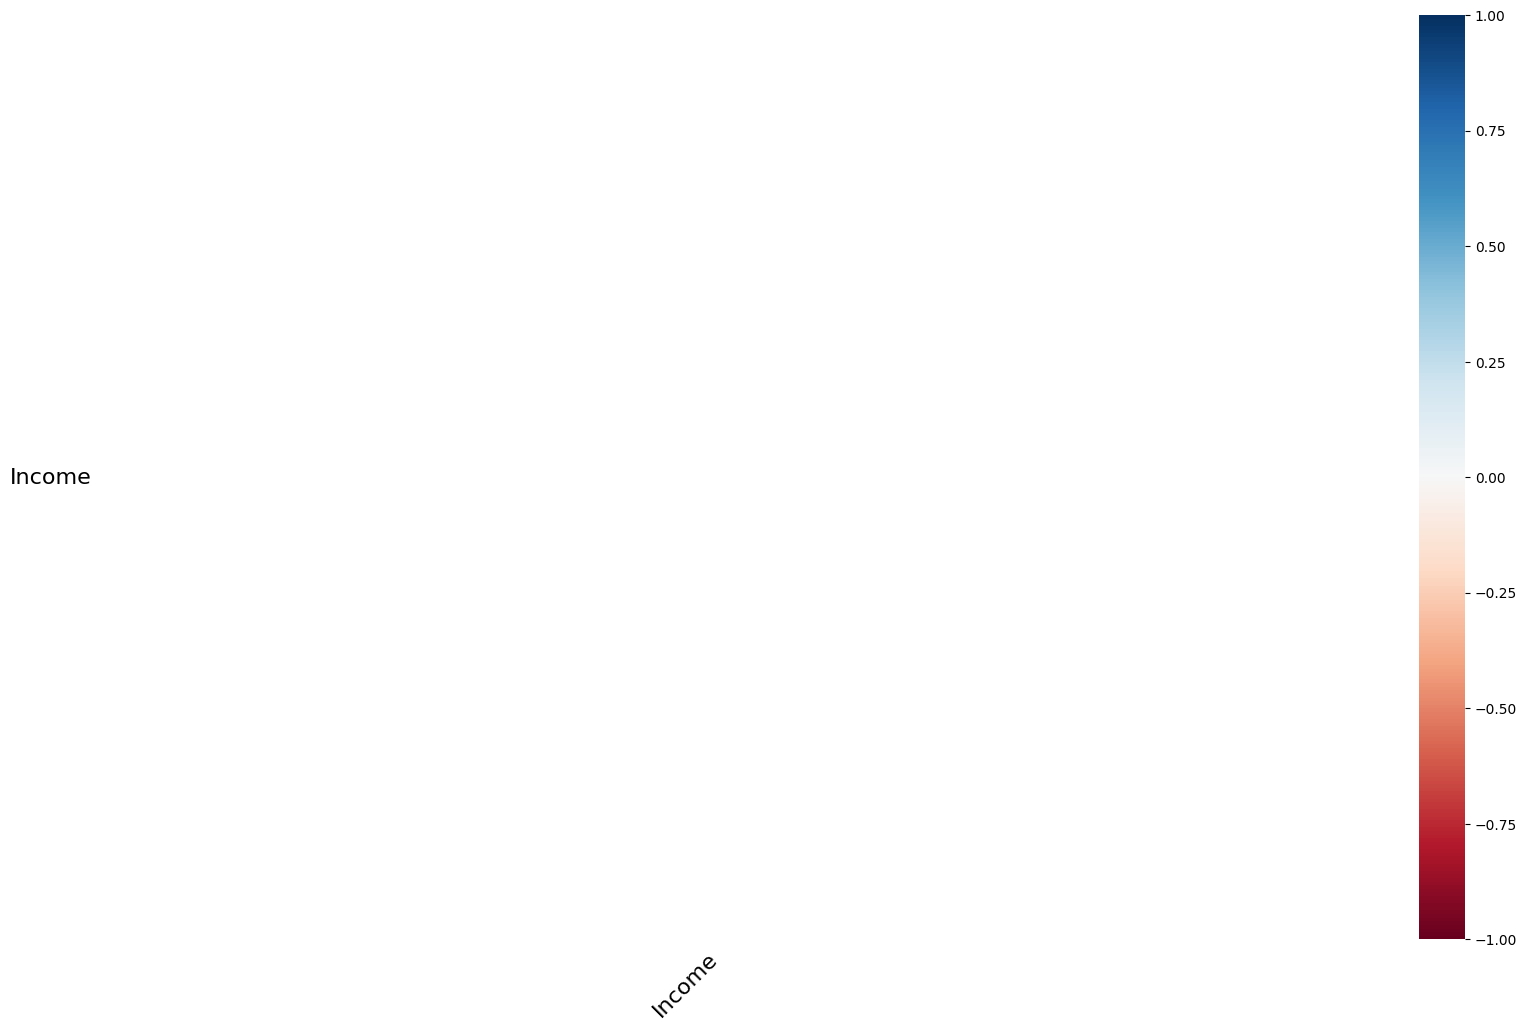

In [16]:
mn.heatmap(df)

Heatmap tidak muncul karena hanya 1 kolom yang mengandung missing value. Sehingga **tidak dapat dilakukan analisis dengan heatmap.**

Kemudian kita akan melakukan analisis clustering pada kolom yang mengandung missing value menggunakan Dendrogram.

<AxesSubplot: >

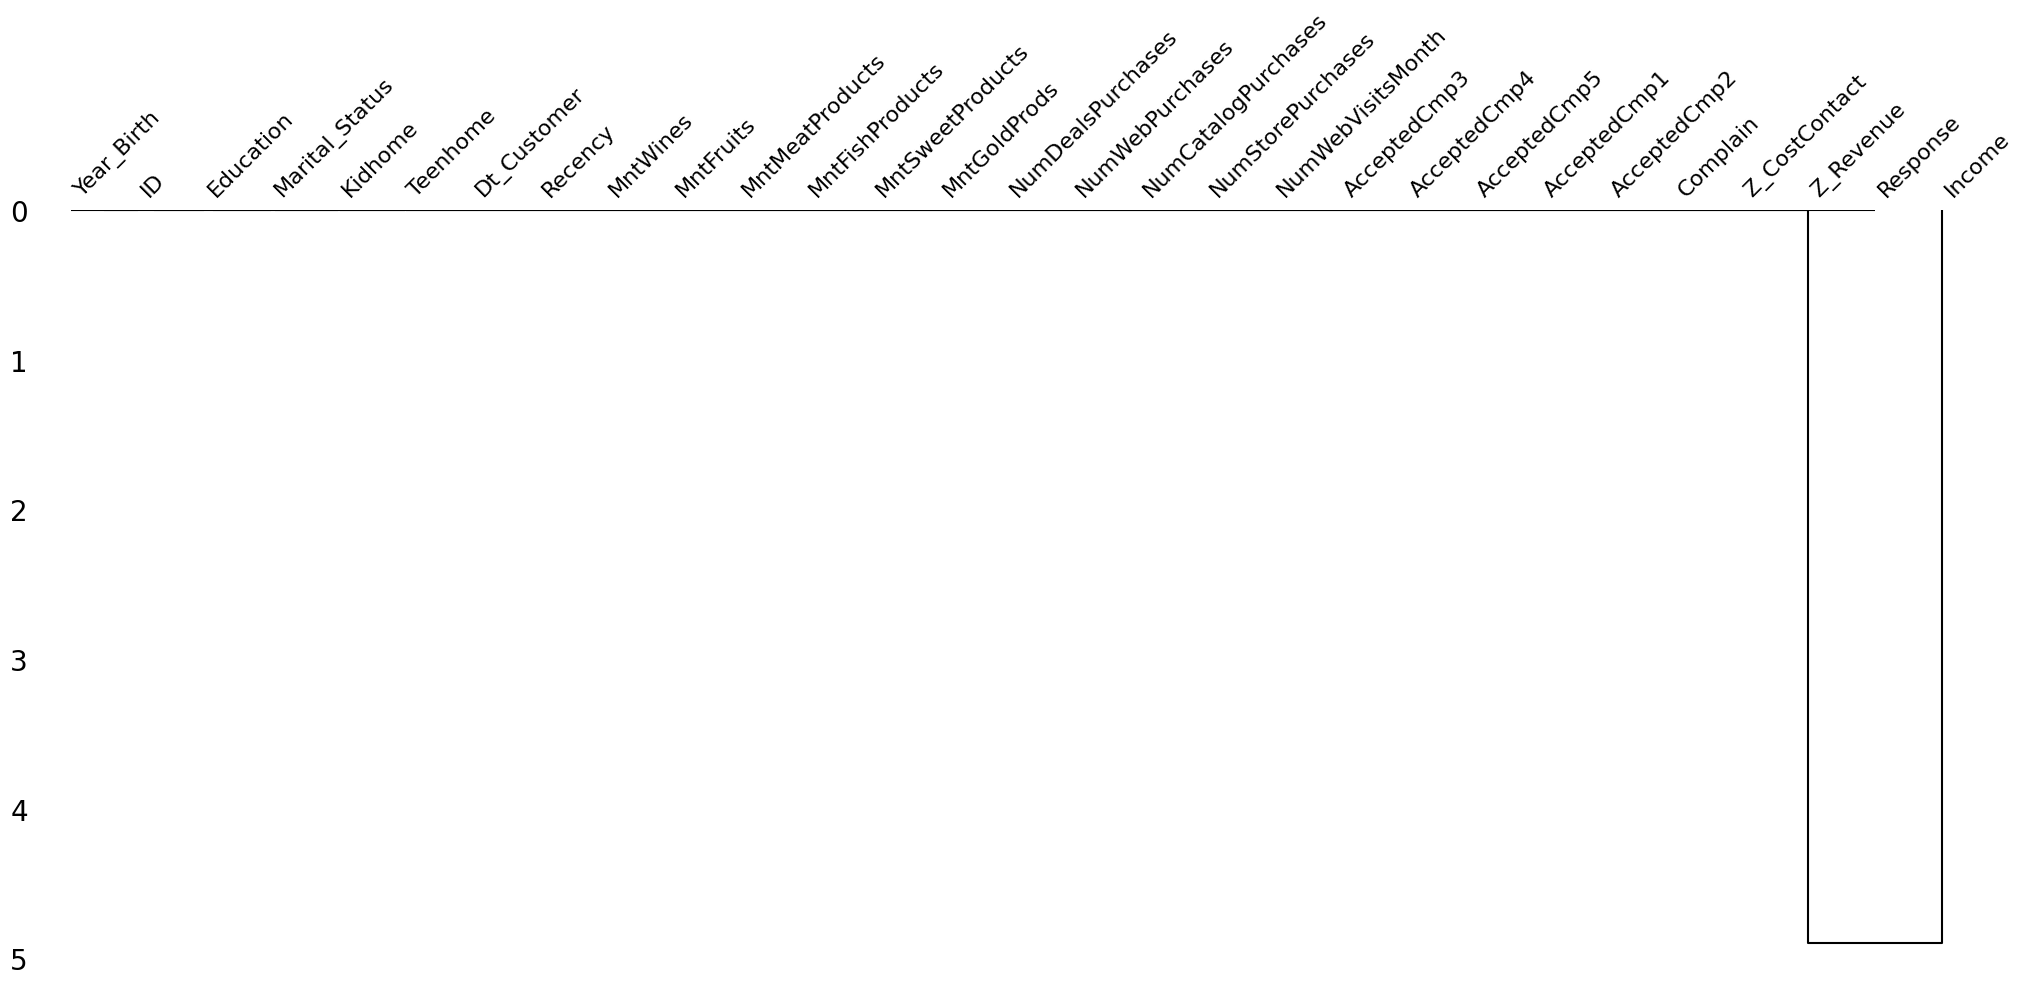

In [17]:
mn.dendrogram(df)

Hasil dendrogram menunjukkan missing value kolom `Income` juga tidak bisa dibaca clusteringnya, karena hanya 1 kolom yang mengandung missing value.

Analisis Missing Value:
* Menurut analisis diatas, missing values pada kolom income termasuk kategori reason [Missing Completely at Random (MCAR)](https://stefvanbuuren.name/fimd/sec-MCAR.html).
* Untuk menghandle missing value tersebut, kita akan melakukan Listwise Deletion atau **menghapus** baris yang mengandung data yang kosong pada Kolom `Income`.
* Hal ini juga karena persentase nya missing valuenya sangat kecil (1,07%). Menurut artikel yang diterbitkan oleh [University of Prince Edward Island](https://pressbooks.library.upei.ca/montelpare/chapter/working-with-missing-data/#:~:text=Generally%2C%20if%20less%20than%205,to%20which%20data%20is%20missing.), secara umum jika data yang hilang kurang dari 5%, masih acceptable untuk mengabaikan nya.

#### Menghapus missing value

In [18]:
df.shape

(2240, 29)

In [19]:
df=df.dropna(subset=['Income'])

In [20]:
df.shape

(2216, 29)

### C.3.b Menghapus kolom yang tidak digunakan dalam analisis data

Kolom yang akan dihapus adalah:
* Kolom `ID` yang berisi unique ID pelanggan (primary key) akan dihapus karena **kurang relevan** dalam analisis ini.
* Kolom `Z_CostContact` dan `Z_Revenue` **hanya memiliki 1 unique value**, serta **tidak ada penjelasan** mengenai kolom ini.

In [21]:
df.shape

(2216, 29)

In [22]:
df = df.drop(columns=['ID','Z_CostContact','Z_Revenue'])

In [23]:
df.shape

(2216, 26)

### C.3.d Mengubah tipe data `Dt_Customer`

Kolom `Dt_Customer` yang sebelumnya memiliki tipe data object akan diubah menjadi datetime

In [24]:
df['Dt_Customer'].info()

<class 'pandas.core.series.Series'>
Int64Index: 2216 entries, 0 to 2239
Series name: Dt_Customer
Non-Null Count  Dtype 
--------------  ----- 
2216 non-null   object
dtypes: object(1)
memory usage: 34.6+ KB


In [25]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])

In [26]:
df['Dt_Customer'].info()

<class 'pandas.core.series.Series'>
Int64Index: 2216 entries, 0 to 2239
Series name: Dt_Customer
Non-Null Count  Dtype         
--------------  -----         
2216 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 34.6 KB


### C.3.e Mendeteksi & Menghandle Outliers

#### Box plot untuk semua kolom

Menggunakan boxplot untuk mendeteksi outlier pada kolom yang mengandung data numerikal

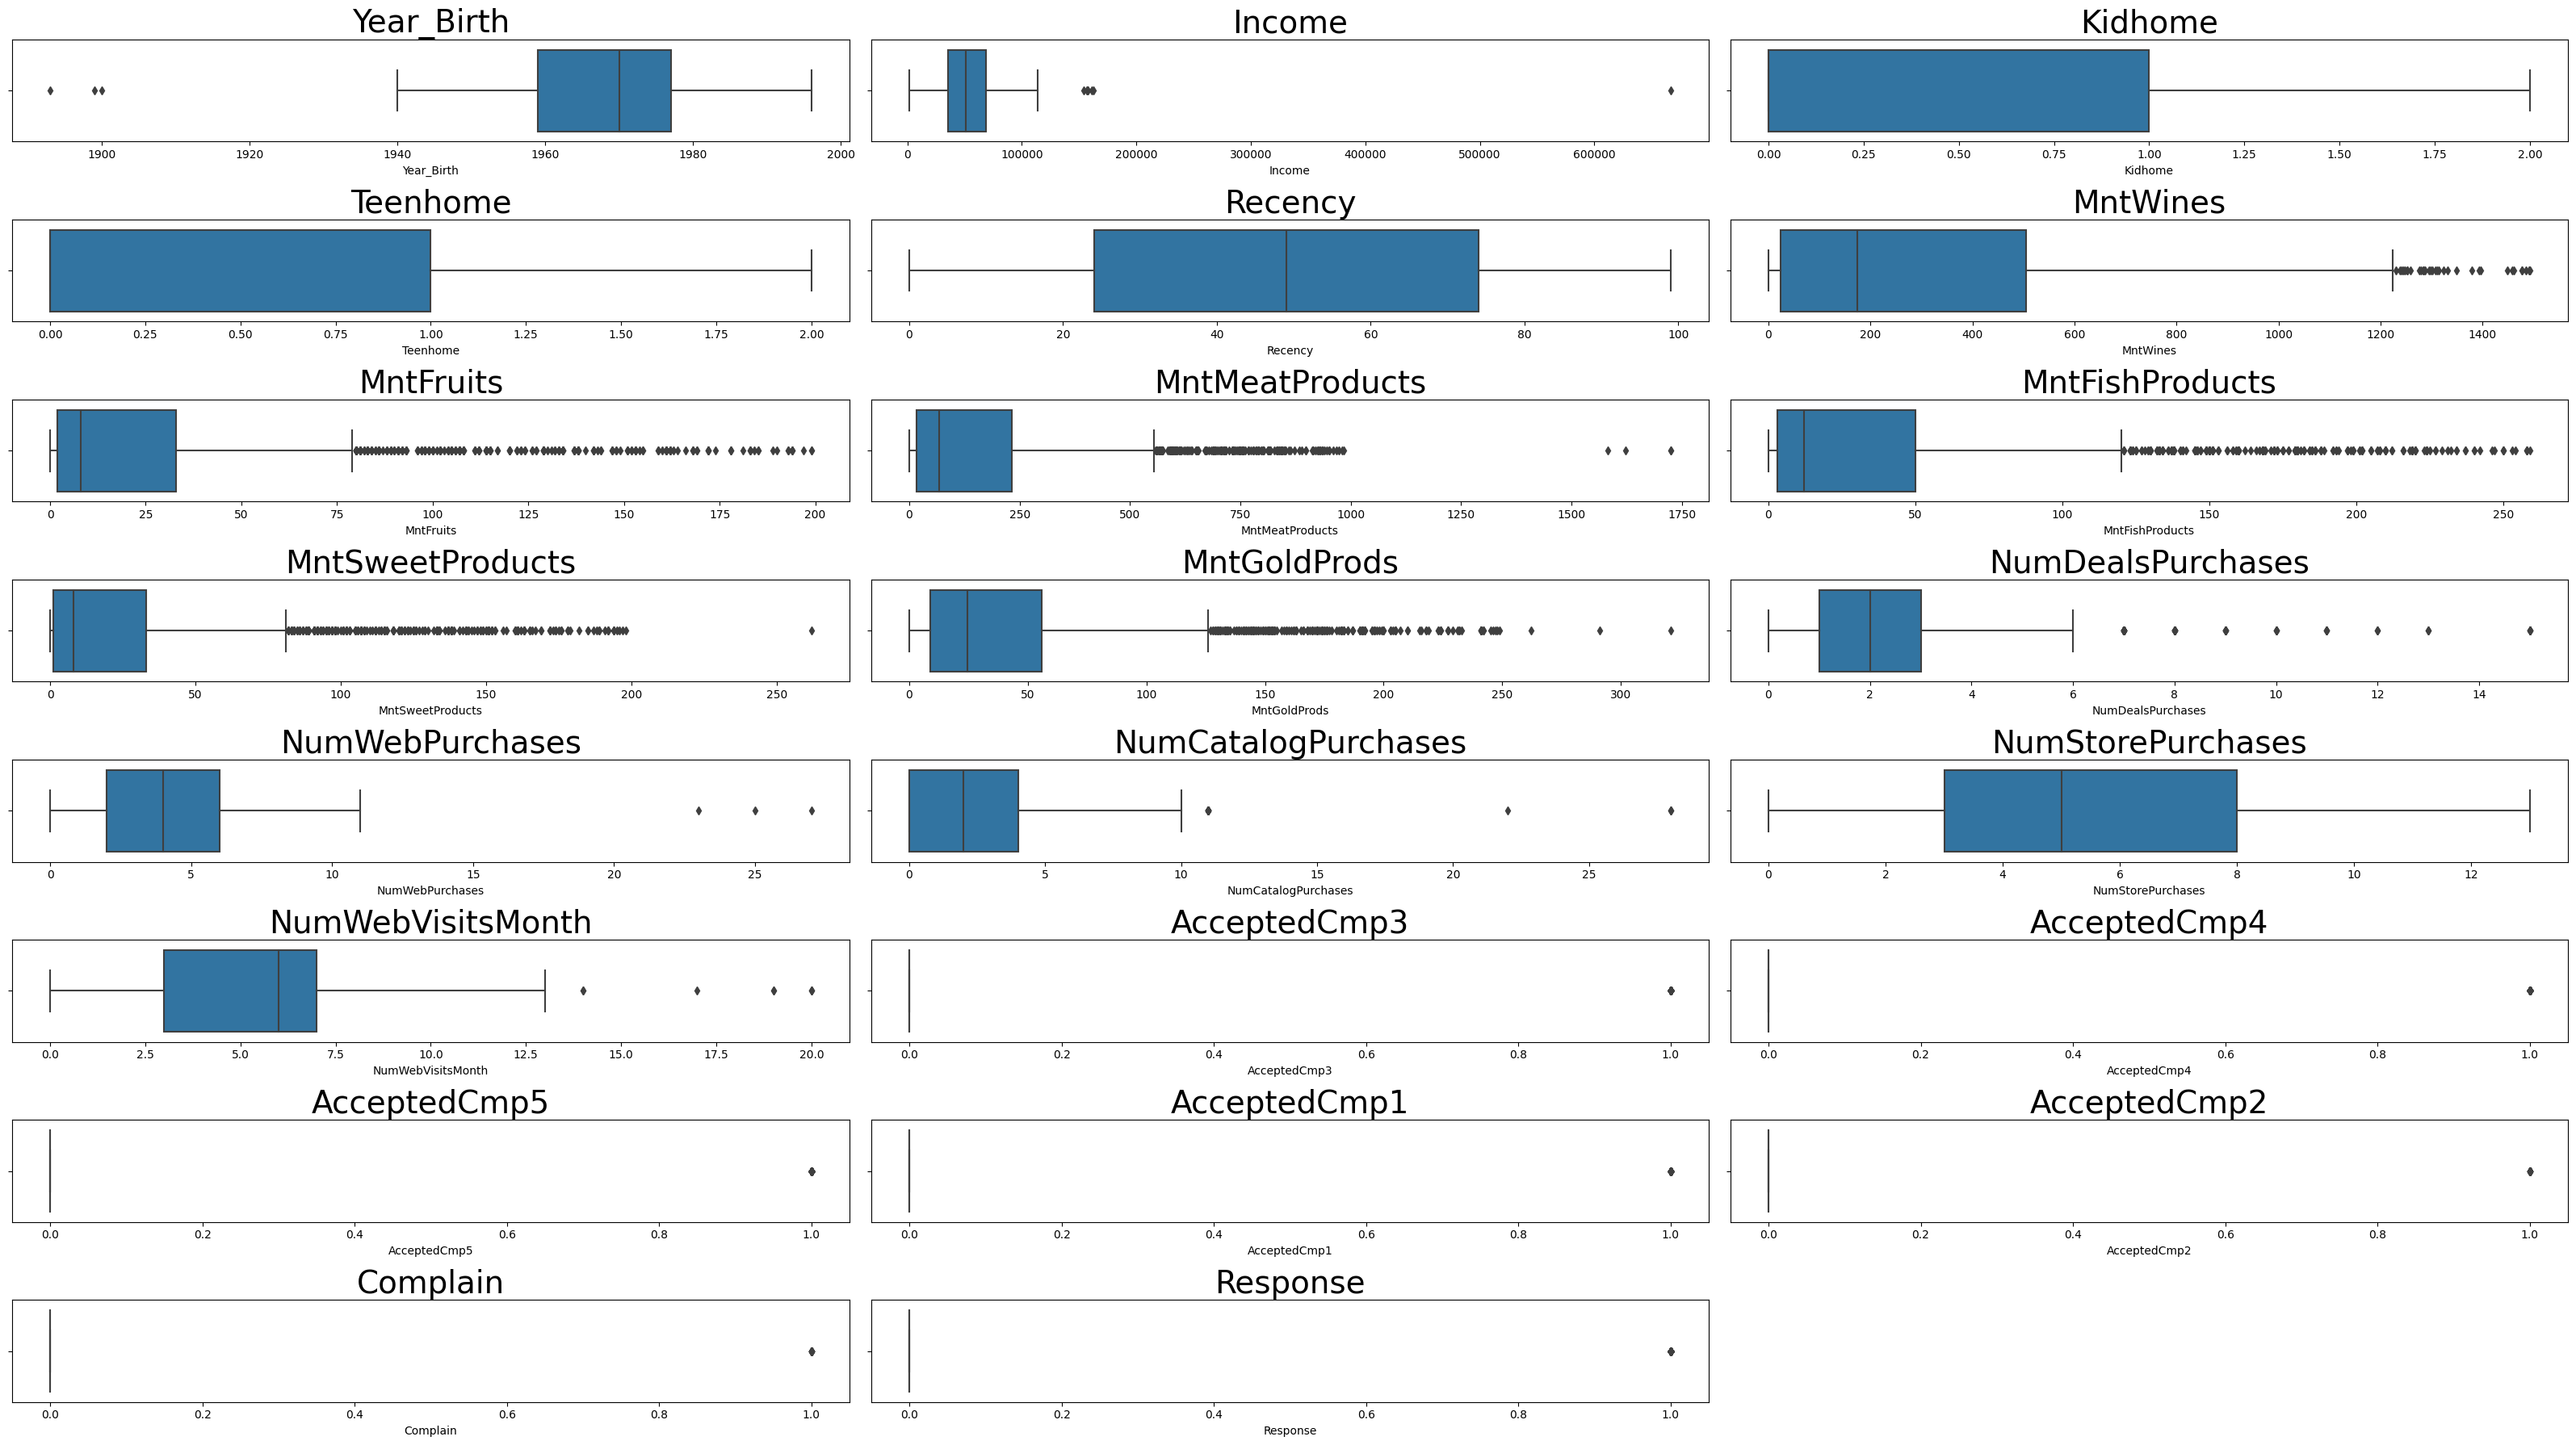

In [27]:
plt.figure(figsize=(32,18))
plotnumber = 1

for col in (x for x in df.describe().columns):
    ax = plt.subplot(8,3,plotnumber)
    sns.boxplot(x=col,data=df)
    plt.title(col,fontsize=28)
    plt.tight_layout()
    plotnumber+=1

plt.show()

Dalam boxplot diatas, terlihat terdapat outlier di beberapa kolom, namun fokus kita disini adalah membuat analisis dataset, sehingga kita **hanya akan menghandle outlier yang dicurigai merupakan kesalahan penginputan**.

#### Kolom `Year_Birth`

Menampilkan boxplot untuk kolom `Year_Birth`

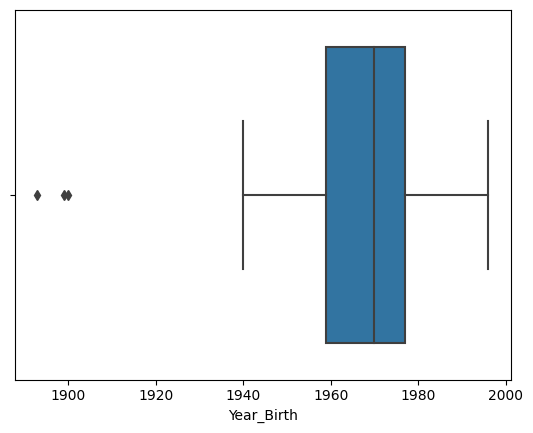

In [28]:
sns.boxplot(x='Year_Birth',data=df)
plt.show()

Menampilkan sebaran data (sorted) pada kolom `Year_Birth`

In [29]:
df['Year_Birth'].sort_values()

239     1893
339     1899
192     1900
1950    1940
424     1941
        ... 
1850    1995
696     1995
2213    1995
46      1996
1170    1996
Name: Year_Birth, Length: 2216, dtype: int64

Dari informasi diatas, didapati 3 nilai yang merupakan **outlier**.

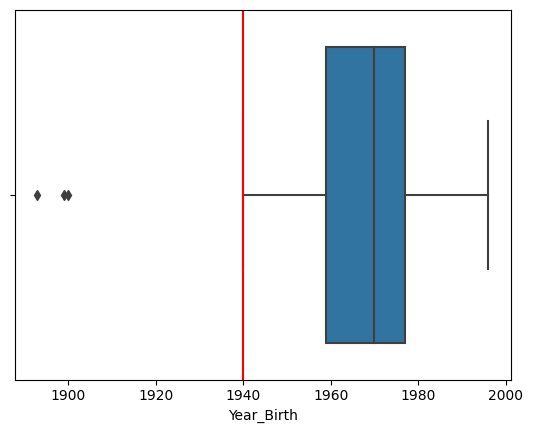

In [30]:
sns.boxplot(x='Year_Birth',data=df)
plt.axvline(df['Year_Birth'].quantile(0.25) - ((19/18) * (df['Year_Birth'].quantile(0.75)-df['Year_Birth'].quantile(0.25))), color='red')
plt.show()

Menampilkan data yang akan di delete.

In [31]:
year_birth_delete=df['Year_Birth']<1940
df[year_birth_delete]

Year_Birth Education Marital_Status   Income  Kidhome  Teenhome  \
192  1900        2n Cycle  Divorced       36640.0  1        0          
239  1893        2n Cycle  Single         60182.0  0        1          
339  1899        PhD       Together       83532.0  0        0          

    Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  \
192 2013-09-26   99       15        6          8                 
239 2014-05-17   23       8         0          5                 
339 2013-09-26   36       755       144        562               

     MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
192  7                4                 25            1                   
239  7                0                 2             1                   
339  104              64                224           1                   

     NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
192  2                1                    2                   
239  1                0                    2                   
339  4                6                    4                   

     NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
192  5                  0             0             0              
239  4                  0             0             0              
339  1                  0             0             1              

     AcceptedCmp1  AcceptedCmp2  Complain  Response  
192  0             0             1         0         
239  0             0             0         0         
339  0             0             0         0

Menampilkan persentase data yang akan di delete.

In [32]:
print('Data Year_Birth yang akan dihapus (%):',(len(df[year_birth_delete])/df.shape[0])*100)

Data Year_Birth yang akan dihapus (%): 0.13537906137184114


Analisis `Year_Birth`:
* Terdapat 3 data yang merupakan outlier
* Menurut data dari [sensus USA](https://www.census.gov/data/tables/2014/demo/age-and-sex/2014-age-sex-composition.html) pada tahun 2014, tercatat hanya **1.7%** penduduk USA yang berusia **85 tahun** keatas. 
* Pada dataset ini, hanya terdapat 3 data yang memiliki umur diatas 85 tahun (Lahir sebelum 1929). 
* Kemudian tidak terdapat data `Year_Birth` diantara tahun 1940 dan 1900.
* Data outlier tersebut dapat dimungkinkan kesalahan input, seperti kita ingin menginput 1990 tetapi malah terketik 1900<br>

Sehingga kita akan melakukan **Listwise Deletion** atau **menghapus baris** yang mengandung data outlier `Year_Birth`

#### Kolom `Income`

Menampilkan boxplot untuk kolom `Income`

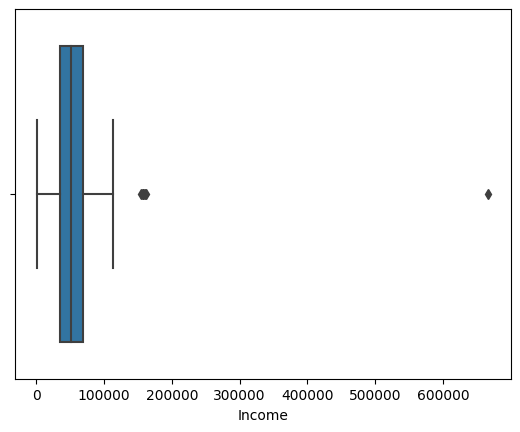

In [33]:
sns.boxplot(x='Income',data=df)
plt.show()

In [34]:
df['Income'].sort_values(ascending=False).head(10)

2233    666666.0
617     162397.0
687     160803.0
1300    157733.0
164     157243.0
1653    157146.0
2132    156924.0
655     153924.0
1898    113734.0
646     105471.0
Name: Income, dtype: float64

Terdapat satu data outlier `Income`=666666.0 yang memiliki jarak yang lumayan jauh dibanding data yang lain.

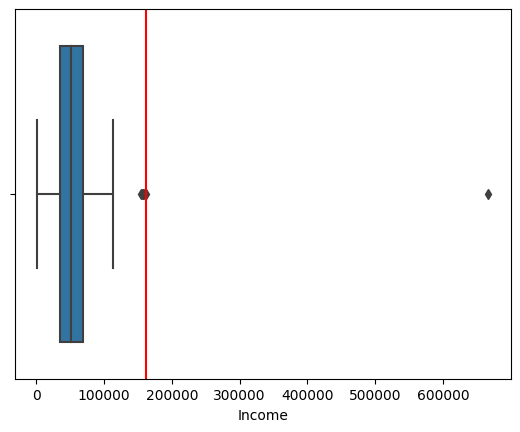

In [35]:
sns.boxplot(x='Income',data=df)
plt.axvline(162397, color='red')
plt.show()

In [36]:
income_delete = df['Income']>162397.0
df[income_delete]

Year_Birth   Education Marital_Status    Income  Kidhome  Teenhome  \
2233  1977        Graduation  Together       666666.0  1        0          

     Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  \
2233 2013-02-06   23       9         14         18                

      MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
2233  8                1                 12            4                   

      NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
2233  3                1                    3                   

      NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
2233  6                  0             0             0              

      AcceptedCmp1  AcceptedCmp2  Complain  Response  
2233  0             0             0         0

In [37]:
print('Data Income yang akan dihapus (%):',(len(df[income_delete])/df.shape[0])*100)

Data Income yang akan dihapus (%): 0.04512635379061372


Analisis `Income`:
* Hanya 1 data outlier yang memiliki `Income` sangat tinggi yaitu 666666.
* Sebetulnya masih ada 7 data outlier lain yang value nya berkisar antara 153924 dan 162397, namun itu masih dalam range yang wajar dalam data Income USA pada tahun [2012](https://commons.wikimedia.org/wiki/File:Distribution_of_Annual_Household_Income_in_the_United_States_2012.svg), [2013](https://commons.wikimedia.org/wiki/File:Distribution_of_Annual_Household_Income_in_the_United_States_2013.svg), dan [2014](https://commons.wikimedia.org/wiki/File:Distribution_of_Annual_Household_Income_in_the_United_States_2014.svg).
* Jika dilihat data `Income`=666666 pada tahun yang sama dengan `Dt_Customer` [(2013)](https://commons.wikimedia.org/wiki/File:Distribution_of_Annual_Household_Income_in_the_United_States_2013.svg), hanya sekitar **2,6%** orang saja yang memiliki pendapatan diatas 250000.
* Terdapat kemungkinan kesalahan pengetikan yang seharusnya 66666 (dekat Q3).
* Juga terdapat kemungkinan data yang diinput tidak valid karena angka nya sangat cantik (angka kembar).

Sehingga kita akan melakukan **Listwise Deletion** atau **menghapus baris** yang mengandung data outlier `Income`=666666

#### Delete Outliers

In [38]:
outliers_delete = df[((year_birth_delete) | (income_delete))]
outliers_delete

Year_Birth   Education Marital_Status    Income  Kidhome  Teenhome  \
192   1900        2n Cycle    Divorced       36640.0   1        0          
239   1893        2n Cycle    Single         60182.0   0        1          
339   1899        PhD         Together       83532.0   0        0          
2233  1977        Graduation  Together       666666.0  1        0          

     Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  \
192  2013-09-26   99       15        6          8                 
239  2014-05-17   23       8         0          5                 
339  2013-09-26   36       755       144        562               
2233 2013-02-06   23       9         14         18                

      MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
192   7                4                 25            1                   
239   7                0                 2             1                   
339   104              64                224           1                   
2233  8                1                 12            4                   

      NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
192   2                1                    2                   
239   1                0                    2                   
339   4                6                    4                   
2233  3                1                    3                   

      NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
192   5                  0             0             0              
239   4                  0             0             0              
339   1                  0             0             1              
2233  6                  0             0             0              

      AcceptedCmp1  AcceptedCmp2  Complain  Response  
192   0             0             1         0         
239   0             0             0         0         
339   0             0             0         0         
2233  0             0             0         0

In [39]:
df.shape

(2216, 26)

In [40]:
df.drop(outliers_delete.index,inplace=True)

In [41]:
df.shape

(2212, 26)

### C.3.f Membuat kolom `Age` dan meng-segmentasinya berdasarkan data dari kolom `Year_Birth`

Membuat kolom `Age` dengan mengasumsikan analisis ini dilakukan pada tahun 2014 jika meninjau kolom `Dt_Customer`.

In [42]:
date_enrolled = []
for i in df['Dt_Customer']:
    i = i.date()
    date_enrolled.append(i)  

print('Max date Dt_Customer:',max(date_enrolled))

Max date Dt_Customer: 2014-12-06


Membuat kolom `Age`

In [43]:
df['Age']=2014-df['Year_Birth']

In [44]:
df['Age'].sort_values()

46      18
1170    18
696     19
1850    19
995     19
        ..
1923    71
415     71
894     71
424     73
1950    74
Name: Age, Length: 2212, dtype: int64

Mengsegmentasi kolom `Age`

Menurut situs [pickfu.com](https://www.pickfu.com/demographic-segmentation), Segmentasi usia demografis untuk analisis marketing biasanya terbagi menjadi 18-24, 25-34, 35-44, 45-54, 55-64, dan 65 tahun ke atas. Informasi tersebut akan diterapkan pada dataset ini.

In [45]:
df['Age_Segment'] = ['18-24' if x >= 18 and x <= 24 else '25-34' if x >= 25 and x <= 34 else '35-44' if x >= 35 and x <= 44 else '45-54' if x >= 45 and x <= 54 else '55-64' if x >= 55 and x <= 64 else '>65' for x in df['Age']]

In [46]:
df['Age_Segment'].value_counts()

35-44    732
45-54    502
55-64    453
25-34    358
>65      106
18-24    61 
Name: Age_Segment, dtype: int64

### C.3.g Segmentasi Kolom `Education`

Menampilkan nama kolom dan frekuensi value pada kolom `Education` *sebelum* dilakukan segmentasi.

In [47]:
df['Education'].value_counts()

Graduation    1115
PhD           480 
Master        365 
2n Cycle      198 
Basic         54  
Name: Education, dtype: int64

Pada kolom `Education`, 2n Cycle berarti seseorang tersebut sedang menempuh pendidikan graduate level or master's level studies menurut [Studera.nu](https://www.studera.nu/startpage/higher-education-studies/higher-education-in-sweden/study-levels-and-degrees/#:~:text=First%20cycle%20is%20for%20the,doctoral%20or%20PhD%20level%20studies.). Sehingga kita akan mengganti value 2n Cycle menjadi Master.<br>
Kemudian value Basic & Graduation akan kita segmentasi ke dalam Bachelor karena kedua value tersebut memiliki arti mahasiswa S1 yang belum atau sudah lulus.

In [48]:
df['Education'] = df['Education'].replace(['2n Cycle'], 'Master')
df['Education'] = df['Education'].replace(['Graduation','Basic'], 'Bachelor')

Menampilkan nama kolom dan frekuensi value pada kolom `Education` *setelah* dilakukan segmentasi.

In [49]:
df['Education'].value_counts()

Bachelor    1169
Master      563 
PhD         480 
Name: Education, dtype: int64

### C.3.h Segmentasi Kolom `Marital_Status`

#### Menampilkan unique value & frekuensi nya

In [50]:
df['Marital_Status'].value_counts()

Married     857
Together    571
Single      470
Divorced    231
Widow       76 
Alone       3  
Absurd      2  
YOLO        2  
Name: Marital_Status, dtype: int64

Terdapat 3 kolom yaitu `Alone`, `Absurd`, dan `YOLO` yang akan dimasukkan ke dalam kolom lain karena data nya sangat sedikit dan tidak memiliki arti yang jelas.

#### `Marital_Status`: `Alone`

Secara arti, Alone itu berarti sendiri (Yang memiliki arti yang sama dengan kolom `Single`), namun jika dilihat dari kolom `Kidhome` & `Teenhome` mereka mempunyai keturunan.

In [51]:
df[df['Marital_Status']=='Alone']

Year_Birth Education Marital_Status   Income  Kidhome  Teenhome  \
131  1958        Master    Alone          61331.0  1        1          
138  1973        PhD       Alone          35860.0  1        1          
153  1988        Bachelor  Alone          34176.0  1        0          

    Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  \
131 2013-10-03   42       534       5          47                
138 2014-05-19   37       15        0          8                 
153 2014-12-05   12       5         7          24                

     MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
131  0                5                 41            5                   
138  4                2                 20            2                   
153  19               14                20            4                   

     NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
131  11               1                    6                   
138  1                1                    2                   
153  3                0                    4                   

     NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
131  8                  0             0             0              
138  5                  1             0             0              
153  6                  0             0             0              

     AcceptedCmp1  AcceptedCmp2  Complain  Response  Age Age_Segment  
131  0             0             0         0         56   55-64       
138  0             0             0         1         41   35-44       
153  0             0             0         0         26   25-34

Jika dilihat dari Marital_Status single, juga memiliki data yang mirip. Sehingga diputuskan value `Alone` dimasukkan ke dalam value `Single`

In [52]:
df[df['Marital_Status']=='Single'].head()

Year_Birth Education Marital_Status   Income  Kidhome  Teenhome  \
0   1957        Bachelor  Single         58138.0  0        0          
1   1954        Bachelor  Single         46344.0  1        1          
15  1946        PhD       Single         82800.0  0        0          
19  1985        Master    Single         33812.0  1        0          
25  1969        Bachelor  Single         18589.0  0        0          

   Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  \
0  2012-04-09   58       635       88         546               
1  2014-08-03   38       11        1          6                 
15 2012-11-24   23       1006      22         115               
19 2012-03-11   86       4         17         19                
25 2013-02-01   89       6         4          25                

    MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
0   172              88                88            3                   
1   2                1                 6             2                   
15  59               68                45            1                   
19  30               24                39            2                   
25  15               12                13            2                   

    NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
0   8                10                   4                   
1   1                1                    2                   
15  7                6                    12                  
19  2                1                    3                   
25  2                1                    3                   

    NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  \
0   7                  0             0             0             0              
1   5                  0             0             0             0              
15  3                  0             0             1             1              
19  6                  0             0             0             0              
25  7                  0             0             0             0              

    AcceptedCmp2  Complain  Response  Age Age_Segment  
0   0             0         1         57   55-64       
1   0             0         0         60   55-64       
15  0             0         1         68   >65         
19  0             0         0         29   25-34       
25  0             0         0         45   45-54

#### `Marital_Status`: `Absurd`

In [53]:
df[df['Marital_Status']=='Absurd']

Year_Birth Education Marital_Status   Income  Kidhome  Teenhome  \
2093  1993        Bachelor  Absurd         79244.0  0        0          
2134  1957        Master    Absurd         65487.0  0        0          

     Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  \
2093 2012-12-19   58       471       102        125               
2134 2014-10-01   48       240       67         500               

      MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
2093  212              61                245           1                   
2134  199              0                 163           3                   

      NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
2093  4                10                   7                   
2134  3                5                    6                   

      NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
2093  1                  0             0             1              
2134  2                  0             0             0              

      AcceptedCmp1  AcceptedCmp2  Complain  Response  Age Age_Segment  
2093  1             0             0         1         21   18-24       
2134  0             0             0         0         57   55-64

Value `Absurd` akan dimasukkan ke dalam `Single` karena data ini tidak memiliki keturunan.

#### `Marital_Status`: `YOLO`

In [54]:
df[df['Marital_Status']=='YOLO']

Year_Birth Education Marital_Status   Income  Kidhome  Teenhome  \
2177  1973        PhD       YOLO           48432.0  0        1          
2202  1973        PhD       YOLO           48432.0  0        1          

     Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  \
2177 2012-10-18   3        322       3          50                
2202 2012-10-18   3        322       3          50                

      MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
2177  4                3                 42            5                   
2202  4                3                 42            5                   

      NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
2177  7                1                    6                   
2202  7                1                    6                   

      NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
2177  8                  0             0             0              
2202  8                  0             0             0              

      AcceptedCmp1  AcceptedCmp2  Complain  Response  Age Age_Segment  
2177  0             0             0         0         41   35-44       
2202  0             0             0         1         41   35-44

Value `YOLO` akan dimasukkan ke dalam `Married` secara arti *diasumsikan* kelompok ini memiliki arti yang sama dengan `Married`

#### Replace value untuk kolom `Marital_Status`

In [55]:
df["Marital_Status"].replace({"YOLO": "Married", "Absurd": "Single", "Alone": "Single"}, inplace=True)

In [56]:
df['Marital_Status'].value_counts()

Married     859
Together    571
Single      475
Divorced    231
Widow       76 
Name: Marital_Status, dtype: int64

### C.3.i Segmentasi Kolom `Income`

Karena tidak ada data timestamp kecuali kolom `Df_Customer`, kita akan melakukan segmentasi kolom `Income` berdasarkan data Income di USA pada rentang tahun values di kolom `Df_Customer`.

In [57]:
date_enrolled = []
for i in df['Dt_Customer']:
    i = i.date()
    date_enrolled.append(i)  

print('Tanggal pendaftaran pertama:',min(date_enrolled))
print('Tanggal pendaftaran terakhir:',max(date_enrolled))

Tanggal pendaftaran pertama: 2012-01-08
Tanggal pendaftaran terakhir: 2014-12-06


Terlihat dari data kolom `Df_Customer` menunjukkan range data yaitu tahun **2012-2014**. Kemudian, kita akan mengambil data Income di USA dari **Distribution of Annual Household Income in the United States** pada tahun [2012](https://commons.wikimedia.org/wiki/File:Distribution_of_Annual_Household_Income_in_the_United_States_2012.svg), [2013](https://commons.wikimedia.org/wiki/File:Distribution_of_Annual_Household_Income_in_the_United_States_2013.svg), dan [2014](https://commons.wikimedia.org/wiki/File:Distribution_of_Annual_Household_Income_in_the_United_States_2014.svg) yang dimuat dalam laman Wikipedia. Ditetapkan segmentasi yang didapat dari median ketiga data tersebut yaitu:
* `Very Low`: < $20,900
* `Lower`: $20,900 - $51,939
* `Higher`: $51,939 - $105,900
* `Very High`: > $105,900

In [58]:
df['Income'].sort_values(ascending=False)

617     162397.0
687     160803.0
1300    157733.0
164     157243.0
1653    157146.0
          ...   
1975    4428.0  
1846    4023.0  
1524    3502.0  
21      2447.0  
1245    1730.0  
Name: Income, Length: 2212, dtype: float64

In [59]:
df['Income_Segment'] = ['Very Low' if x <= 20900 else 'Lower' if x > 20900 and x <= 51939 else 'Higher' if x > 51939 and x <= 105900 else 'Very High' for x in df['Income']]

In [60]:
df['Income_Segment'].value_counts()

Higher       1082
Lower        980 
Very Low     142 
Very High    8   
Name: Income_Segment, dtype: int64

### C.3.j Menambahkan kolom `Children` & `Is_Parent` dari kolom `Kidhome` & `Teenhome`

Kolom `Kidhome` & `Teenhome` masing-masing merupakan jumlah anak kecil & remaja dalam rumah tangga. Pada analisis ini, kedua kolom tersebut akan dijumlahkan ke dalam kolom `Children`

In [61]:
df.head()

Year_Birth Education Marital_Status   Income  Kidhome  Teenhome  \
0  1957        Bachelor  Single         58138.0  0        0          
1  1954        Bachelor  Single         46344.0  1        1          
2  1965        Bachelor  Together       71613.0  0        0          
3  1984        Bachelor  Together       26646.0  1        0          
4  1981        PhD       Married        58293.0  1        0          

  Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
0 2012-04-09   58       635       88         546              172               
1 2014-08-03   38       11        1          6                2                 
2 2013-08-21   26       426       49         127              111               
3 2014-10-02   26       11        4          20               10                
4 2014-01-19   94       173       43         118              46                

   MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  \
0  88                88            3                  8                 
1  1                 6             2                  1                 
2  21                42            1                  8                 
3  3                 5             2                  2                 
4  27                15            5                  5                 

   NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  \
0  10                   4                  7                  0              
1  1                    2                  5                  0              
2  2                    10                 4                  0              
3  0                    4                  6                  0              
4  3                    6                  5                  0              

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Response  \
0  0             0             0             0             0         1          
1  0             0             0             0             0         0          
2  0             0             0             0             0         0          
3  0             0             0             0             0         0          
4  0             0             0             0             0         0          

   Age Age_Segment Income_Segment  
0  57   55-64       Higher         
1  60   55-64       Lower          
2  49   45-54       Higher         
3  30   25-34       Lower          
4  33   25-34       Higher

In [62]:
df['Children'] = df['Kidhome'] + df['Teenhome']

In [63]:
df['Is_Parent'] = np.where(df.Children> 0, 1, 0)

In [64]:
df.head()

Year_Birth Education Marital_Status   Income  Kidhome  Teenhome  \
0  1957        Bachelor  Single         58138.0  0        0          
1  1954        Bachelor  Single         46344.0  1        1          
2  1965        Bachelor  Together       71613.0  0        0          
3  1984        Bachelor  Together       26646.0  1        0          
4  1981        PhD       Married        58293.0  1        0          

  Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
0 2012-04-09   58       635       88         546              172               
1 2014-08-03   38       11        1          6                2                 
2 2013-08-21   26       426       49         127              111               
3 2014-10-02   26       11        4          20               10                
4 2014-01-19   94       173       43         118              46                

   MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  \
0  88                88            3                  8                 
1  1                 6             2                  1                 
2  21                42            1                  8                 
3  3                 5             2                  2                 
4  27                15            5                  5                 

   NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  \
0  10                   4                  7                  0              
1  1                    2                  5                  0              
2  2                    10                 4                  0              
3  0                    4                  6                  0              
4  3                    6                  5                  0              

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Response  \
0  0             0             0             0             0         1          
1  0             0             0             0             0         0          
2  0             0             0             0             0         0          
3  0             0             0             0             0         0          
4  0             0             0             0             0         0          

   Age Age_Segment Income_Segment  Children  Is_Parent  
0  57   55-64       Higher         0         0          
1  60   55-64       Lower          2         1          
2  49   45-54       Higher         0         0          
3  30   25-34       Lower          1         1          
4  33   25-34       Higher         1         1

### C.3.k Membuat kolom `Year`, `Month`, dan `Month_Year` yang didapat dari kolom `Dt_Customer`

In [65]:
df

Year_Birth Education Marital_Status   Income  Kidhome  Teenhome  \
0     1957        Bachelor  Single         58138.0  0        0          
1     1954        Bachelor  Single         46344.0  1        1          
2     1965        Bachelor  Together       71613.0  0        0          
3     1984        Bachelor  Together       26646.0  1        0          
4     1981        PhD       Married        58293.0  1        0          
...    ...        ...           ...            ... ..       ..          
2235  1967        Bachelor  Married        61223.0  0        1          
2236  1946        PhD       Together       64014.0  2        1          
2237  1981        Bachelor  Divorced       56981.0  0        0          
2238  1956        Master    Together       69245.0  0        1          
2239  1954        PhD       Married        52869.0  1        1          

     Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  \
0    2012-04-09   58       635       88         546               
1    2014-08-03   38       11        1          6                 
2    2013-08-21   26       426       49         127               
3    2014-10-02   26       11        4          20                
4    2014-01-19   94       173       43         118               
...         ...   ..       ...       ..         ...               
2235 2013-06-13   46       709       43         182               
2236 2014-10-06   56       406       0          30                
2237 2014-01-25   91       908       48         217               
2238 2014-01-24   8        428       30         214               
2239 2012-10-15   40       84        3          61                

      MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
0     172              88                88            3                   
1     2                1                 6             2                   
2     111              21                42            1                   
3     10               3                 5             2                   
4     46               27                15            5                   
...   ..               ..                ..           ..                   
2235  42               118               247           2                   
2236  0                0                 8             7                   
2237  32               12                24            1                   
2238  80               30                61            2                   
2239  2                1                 21            3                   

      NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
0     8                10                   4                   
1     1                1                    2                   
2     8                2                    10                  
3     2                0                    4                   
4     5                3                    6                   
...  ..               ..                   ..                   
2235  9                3                    4                   
2236  8                2                    5                   
2237  2                3                    13                  
2238  6                5                    10                  
2239  3                1                    4                   

      NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
0     7                  0             0             0              
1     5                  0             0             0              
2     4                  0             0             0              
3     6                  0             0             0              
4     5                  0             0             0              
...  ..                 ..            ..            ..              
2235  5                  0             0             0              
2236  7                  0             0             0              
2237  6  

In [66]:
df['Year'] = df['Dt_Customer'].dt.year
df['Month'] = df['Dt_Customer'].dt.month
df['Month_Year'] = df['Dt_Customer'].dt.to_period('M')

In [67]:
df

Year_Birth Education Marital_Status   Income  Kidhome  Teenhome  \
0     1957        Bachelor  Single         58138.0  0        0          
1     1954        Bachelor  Single         46344.0  1        1          
2     1965        Bachelor  Together       71613.0  0        0          
3     1984        Bachelor  Together       26646.0  1        0          
4     1981        PhD       Married        58293.0  1        0          
...    ...        ...           ...            ... ..       ..          
2235  1967        Bachelor  Married        61223.0  0        1          
2236  1946        PhD       Together       64014.0  2        1          
2237  1981        Bachelor  Divorced       56981.0  0        0          
2238  1956        Master    Together       69245.0  0        1          
2239  1954        PhD       Married        52869.0  1        1          

     Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  \
0    2012-04-09   58       635       88         546               
1    2014-08-03   38       11        1          6                 
2    2013-08-21   26       426       49         127               
3    2014-10-02   26       11        4          20                
4    2014-01-19   94       173       43         118               
...         ...   ..       ...       ..         ...               
2235 2013-06-13   46       709       43         182               
2236 2014-10-06   56       406       0          30                
2237 2014-01-25   91       908       48         217               
2238 2014-01-24   8        428       30         214               
2239 2012-10-15   40       84        3          61                

      MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
0     172              88                88            3                   
1     2                1                 6             2                   
2     111              21                42            1                   
3     10               3                 5             2                   
4     46               27                15            5                   
...   ..               ..                ..           ..                   
2235  42               118               247           2                   
2236  0                0                 8             7                   
2237  32               12                24            1                   
2238  80               30                61            2                   
2239  2                1                 21            3                   

      NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
0     8                10                   4                   
1     1                1                    2                   
2     8                2                    10                  
3     2                0                    4                   
4     5                3                    6                   
...  ..               ..                   ..                   
2235  9                3                    4                   
2236  8                2                    5                   
2237  2                3                    13                  
2238  6                5                    10                  
2239  3                1                    4                   

      NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
0     7                  0             0             0              
1     5                  0             0             0              
2     4                  0             0             0              
3     6                  0             0             0              
4     5                  0             0             0              
...  ..                 ..            ..            ..              
2235  5                  0             0             0              
2236  7                  0             0             0              
2237  6  

### C.3.l Menambahkan kolom `Total_Products` untuk total produk dari kolom `MntWines`, `MntFruits`, `MntMeatProducts`, `MntFishProducts`,`MntSweetProducts`, dan `MntGoldProds`

In [68]:
df.head()

Year_Birth Education Marital_Status   Income  Kidhome  Teenhome  \
0  1957        Bachelor  Single         58138.0  0        0          
1  1954        Bachelor  Single         46344.0  1        1          
2  1965        Bachelor  Together       71613.0  0        0          
3  1984        Bachelor  Together       26646.0  1        0          
4  1981        PhD       Married        58293.0  1        0          

  Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
0 2012-04-09   58       635       88         546              172               
1 2014-08-03   38       11        1          6                2                 
2 2013-08-21   26       426       49         127              111               
3 2014-10-02   26       11        4          20               10                
4 2014-01-19   94       173       43         118              46                

   MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  \
0  88                88            3                  8                 
1  1                 6             2                  1                 
2  21                42            1                  8                 
3  3                 5             2                  2                 
4  27                15            5                  5                 

   NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  \
0  10                   4                  7                  0              
1  1                    2                  5                  0              
2  2                    10                 4                  0              
3  0                    4                  6                  0              
4  3                    6                  5                  0              

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Response  \
0  0             0             0             0             0         1          
1  0             0             0             0             0         0          
2  0             0             0             0             0         0          
3  0             0             0             0             0         0          
4  0             0             0             0             0         0          

   Age Age_Segment Income_Segment  Children  Is_Parent  Year  Month Month_Year  
0  57   55-64       Higher         0         0          2012  4      2012-04    
1  60   55-64       Lower          2         1          2014  8      2014-08    
2  49   45-54       Higher         0         0          2013  8      2013-08    
3  30   25-34       Lower          1         1          2014  10     2014-10    
4  33   25-34       Higher         1         1          2014  1      2014-01

In [69]:
df['Total_Products'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']

In [70]:
df.head()

Year_Birth Education Marital_Status   Income  Kidhome  Teenhome  \
0  1957        Bachelor  Single         58138.0  0        0          
1  1954        Bachelor  Single         46344.0  1        1          
2  1965        Bachelor  Together       71613.0  0        0          
3  1984        Bachelor  Together       26646.0  1        0          
4  1981        PhD       Married        58293.0  1        0          

  Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
0 2012-04-09   58       635       88         546              172               
1 2014-08-03   38       11        1          6                2                 
2 2013-08-21   26       426       49         127              111               
3 2014-10-02   26       11        4          20               10                
4 2014-01-19   94       173       43         118              46                

   MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  \
0  88                88            3                  8                 
1  1                 6             2                  1                 
2  21                42            1                  8                 
3  3                 5             2                  2                 
4  27                15            5                  5                 

   NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  \
0  10                   4                  7                  0              
1  1                    2                  5                  0              
2  2                    10                 4                  0              
3  0                    4                  6                  0              
4  3                    6                  5                  0              

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Response  \
0  0             0             0             0             0         1          
1  0             0             0             0             0         0          
2  0             0             0             0             0         0          
3  0             0             0             0             0         0          
4  0             0             0             0             0         0          

   Age Age_Segment Income_Segment  Children  Is_Parent  Year  Month  \
0  57   55-64       Higher         0         0          2012  4       
1  60   55-64       Lower          2         1          2014  8       
2  49   45-54       Higher         0         0          2013  8       
3  30   25-34       Lower          1         1          2014  10      
4  33   25-34       Higher         1         1          2014  1       

  Month_Year  Total_Products  
0  2012-04    1617            
1  2014-08    27              
2  2013-08    776             
3  2014-10    53              
4  2014-01    422

### C.3.m Menambahkan kolom `Total_Purchases` untuk total pembelian dari kolom `NumWebPurchases`, `NumCatalogPurchases`, dan `NumStorePurchases`

In [71]:
df.head()

Year_Birth Education Marital_Status   Income  Kidhome  Teenhome  \
0  1957        Bachelor  Single         58138.0  0        0          
1  1954        Bachelor  Single         46344.0  1        1          
2  1965        Bachelor  Together       71613.0  0        0          
3  1984        Bachelor  Together       26646.0  1        0          
4  1981        PhD       Married        58293.0  1        0          

  Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
0 2012-04-09   58       635       88         546              172               
1 2014-08-03   38       11        1          6                2                 
2 2013-08-21   26       426       49         127              111               
3 2014-10-02   26       11        4          20               10                
4 2014-01-19   94       173       43         118              46                

   MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  \
0  88                88            3                  8                 
1  1                 6             2                  1                 
2  21                42            1                  8                 
3  3                 5             2                  2                 
4  27                15            5                  5                 

   NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  \
0  10                   4                  7                  0              
1  1                    2                  5                  0              
2  2                    10                 4                  0              
3  0                    4                  6                  0              
4  3                    6                  5                  0              

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Response  \
0  0             0             0             0             0         1          
1  0             0             0             0             0         0          
2  0             0             0             0             0         0          
3  0             0             0             0             0         0          
4  0             0             0             0             0         0          

   Age Age_Segment Income_Segment  Children  Is_Parent  Year  Month  \
0  57   55-64       Higher         0         0          2012  4       
1  60   55-64       Lower          2         1          2014  8       
2  49   45-54       Higher         0         0          2013  8       
3  30   25-34       Lower          1         1          2014  10      
4  33   25-34       Higher         1         1          2014  1       

  Month_Year  Total_Products  
0  2012-04    1617            
1  2014-08    27              
2  2013-08    776             
3  2014-10    53              
4  2014-01    422

In [72]:
df['Total_Purchases'] = df['NumWebPurchases'] + df['NumCatalogPurchases'] + df['NumStorePurchases']

In [73]:
df.head()

Year_Birth Education Marital_Status   Income  Kidhome  Teenhome  \
0  1957        Bachelor  Single         58138.0  0        0          
1  1954        Bachelor  Single         46344.0  1        1          
2  1965        Bachelor  Together       71613.0  0        0          
3  1984        Bachelor  Together       26646.0  1        0          
4  1981        PhD       Married        58293.0  1        0          

  Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
0 2012-04-09   58       635       88         546              172               
1 2014-08-03   38       11        1          6                2                 
2 2013-08-21   26       426       49         127              111               
3 2014-10-02   26       11        4          20               10                
4 2014-01-19   94       173       43         118              46                

   MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  \
0  88                88            3                  8                 
1  1                 6             2                  1                 
2  21                42            1                  8                 
3  3                 5             2                  2                 
4  27                15            5                  5                 

   NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  \
0  10                   4                  7                  0              
1  1                    2                  5                  0              
2  2                    10                 4                  0              
3  0                    4                  6                  0              
4  3                    6                  5                  0              

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Response  \
0  0             0             0             0             0         1          
1  0             0             0             0             0         0          
2  0             0             0             0             0         0          
3  0             0             0             0             0         0          
4  0             0             0             0             0         0          

   Age Age_Segment Income_Segment  Children  Is_Parent  Year  Month  \
0  57   55-64       Higher         0         0          2012  4       
1  60   55-64       Lower          2         1          2014  8       
2  49   45-54       Higher         0         0          2013  8       
3  30   25-34       Lower          1         1          2014  10      
4  33   25-34       Higher         1         1          2014  1       

  Month_Year  Total_Products  Total_Purchases  
0  2012-04    1617            22               
1  2014-08    27              4                
2  2013-08    776             20               
3  2014-10    53              6                
4  2014-01    422             14

### C.3.n Menambahkan kolom `Total_Campaign` & `Accept_Campaign` dari kolom `AcceptedCmp1-5` & `Response`

In [74]:
df.head()

Year_Birth Education Marital_Status   Income  Kidhome  Teenhome  \
0  1957        Bachelor  Single         58138.0  0        0          
1  1954        Bachelor  Single         46344.0  1        1          
2  1965        Bachelor  Together       71613.0  0        0          
3  1984        Bachelor  Together       26646.0  1        0          
4  1981        PhD       Married        58293.0  1        0          

  Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
0 2012-04-09   58       635       88         546              172               
1 2014-08-03   38       11        1          6                2                 
2 2013-08-21   26       426       49         127              111               
3 2014-10-02   26       11        4          20               10                
4 2014-01-19   94       173       43         118              46                

   MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  \
0  88                88            3                  8                 
1  1                 6             2                  1                 
2  21                42            1                  8                 
3  3                 5             2                  2                 
4  27                15            5                  5                 

   NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  \
0  10                   4                  7                  0              
1  1                    2                  5                  0              
2  2                    10                 4                  0              
3  0                    4                  6                  0              
4  3                    6                  5                  0              

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Response  \
0  0             0             0             0             0         1          
1  0             0             0             0             0         0          
2  0             0             0             0             0         0          
3  0             0             0             0             0         0          
4  0             0             0             0             0         0          

   Age Age_Segment Income_Segment  Children  Is_Parent  Year  Month  \
0  57   55-64       Higher         0         0          2012  4       
1  60   55-64       Lower          2         1          2014  8       
2  49   45-54       Higher         0         0          2013  8       
3  30   25-34       Lower          1         1          2014  10      
4  33   25-34       Higher         1         1          2014  1       

  Month_Year  Total_Products  Total_Purchases  
0  2012-04    1617            22               
1  2014-08    27              4                
2  2013-08    776             20               
3  2014-10    53              6                
4  2014-01    422             14

In [75]:
df['Total_Campaign'] = df['AcceptedCmp1'] + df['AcceptedCmp2'] + df['AcceptedCmp3'] + df['AcceptedCmp4'] + df['AcceptedCmp5'] + df['Response']

In [76]:
df['Accept_Campaign'] = [1 if x > 0 else 0 for x in df['Total_Campaign']]

In [77]:
df.head(10)

Year_Birth Education Marital_Status   Income  Kidhome  Teenhome  \
0  1957        Bachelor  Single         58138.0  0        0          
1  1954        Bachelor  Single         46344.0  1        1          
2  1965        Bachelor  Together       71613.0  0        0          
3  1984        Bachelor  Together       26646.0  1        0          
4  1981        PhD       Married        58293.0  1        0          
5  1967        Master    Together       62513.0  0        1          
6  1971        Bachelor  Divorced       55635.0  0        1          
7  1985        PhD       Married        33454.0  1        0          
8  1974        PhD       Together       30351.0  1        0          
9  1950        PhD       Together       5648.0   1        1          

  Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
0 2012-04-09   58       635       88         546              172               
1 2014-08-03   38       11        1          6                2                 
2 2013-08-21   26       426       49         127              111               
3 2014-10-02   26       11        4          20               10                
4 2014-01-19   94       173       43         118              46                
5 2013-09-09   16       520       42         98               0                 
6 2012-11-13   34       235       65         164              50                
7 2013-08-05   32       76        10         56               3                 
8 2013-06-06   19       14        0          24               3                 
9 2014-03-13   68       28        0          6                1                 

   MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  \
0  88                88            3                  8                 
1  1                 6             2                  1                 
2  21                42            1                  8                 
3  3                 5             2                  2                 
4  27                15            5                  5                 
5  42                14            2                  6                 
6  49                27            4                  7                 
7  1                 23            2                  4                 
8  3                 2             1                  3                 
9  1                 13            1                  1                 

   NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  \
0  10                   4                  7                  0              
1  1                    2                  5                  0              
2  2                    10                 4                  0              
3  0                    4                  6                  0              
4  3                    6                  5                  0              
5  4                    10                 6                  0              
6  3                    7                  6                  0              
7  0                    4                  8                  0              
8  0                    2                  9                  0              
9  0                    0                  20                 1              

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Response  \
0  0             0             0             0             0         1          
1  0             0             0             0             0         0          
2  0             0             0             0             0         0          
3  0             0             0             0             0         0          
4  0             0             0             0             0         0          
5  0             0             0             0             0         0          
6  0             0             0             0             0         0          
7  0             0           

In [78]:
df['Total_Campaign'].value_counts()

0    1608
1    368 
2    139 
3    51  
4    36  
5    10  
Name: Total_Campaign, dtype: int64

<hr>

## **C.4 Clean Data**

Data sudah bersih, mari kita lihat kembali informasi nya.

In [79]:
list_item = []
for col in df.columns:
    list_item.append([col,df[col].nunique(),df[col].unique()])

tabel_desc = pd.DataFrame(columns=['Column Name','Num of Unique','Unique Data'],data=list_item)

In [80]:
pd.set_option('display.max_colwidth',-1)
tabel_desc

Column Name  Num of Unique  \
0   Year_Birth           56              
1   Education            3               
2   Marital_Status       5               
3   Income               1970            
4   Kidhome              3               
5   Teenhome             3               
6   Dt_Customer          662             
7   Recency              100             
8   MntWines             775             
9   MntFruits            158             
10  MntMeatProducts      553             
11  MntFishProducts      182             
12  MntSweetProducts     176             
13  MntGoldProds         212             
14  NumDealsPurchases    15              
15  NumWebPurchases      15              
16  NumCatalogPurchases  14              
17  NumStorePurchases    14              
18  NumWebVisitsMonth    16              
19  AcceptedCmp3         2               
20  AcceptedCmp4         2               
21  AcceptedCmp5         2               
22  AcceptedCmp1         2               
23  AcceptedCmp2         2               
24  Complain             2               
25  Response             2               
26  Age                  56              
27  Age_Segment          6               
28  Income_Segment       4               
29  Children             4               
30  Is_Parent            2               
31  Year                 3               
32  Month                12              
33  Month_Year           36              
34  Total_Products       1047            
35  Total_Purchases      33              
36  Total_Campaign       6               
37  Accept_Campaign      2               

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     

In [81]:
df.shape

(2212, 38)

Sebelum dibersihkan, kita memiliki 2.240 baris data, sekarang kita memiliki 2.212 baris. Sebanyak 28 baris data dihapus karena memiliki null-values pada kolom `Income` dan/atau merupakan outliers.

<hr>

## **C.5 Data Analysis**

### C.5.a Univariate Analysis

Dilakukan analisis pada 5 aspek latar belakang customer yang terdiri dari umur, pendidikan, status pernikahan, pendapatan, dan jumlah anak. Analisis ini digunakan untuk **menunjang** analisis yang dilakukan selanjutnya melalui **Correlation Matrix** & **Multivariate Analysis**

#### 1. Kolom `Age`, dan `Age_Segment`

Dilakukan analisis pada kolom tahun lahir & umur. Kolom `Age` akan divisualisasi menggunakan Histogram karena merupakan data yang variabel nya kontinu. Kemudian kolom `Age_Segment` akan divisualisasi menggunakan & Pie Chart karena merupakan data kategorikal yang berisi variabel numerikal.

<Figure size 1200x900 with 0 Axes>

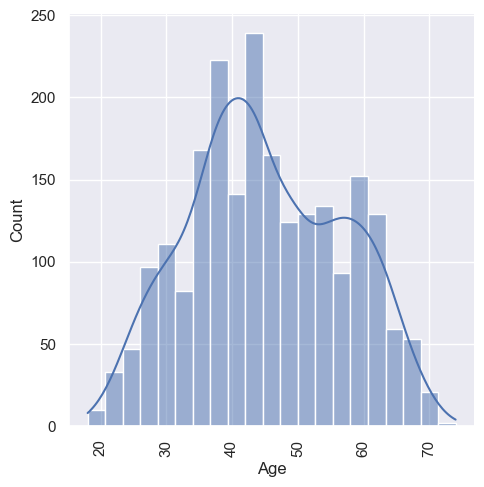

In [82]:
warnings.filterwarnings('ignore')
%matplotlib inline
sns.set()
plt.figure(figsize=(12,9))
sns.displot(df['Age'],kde=True)
plt.xticks(rotation = 90)
plt.show()

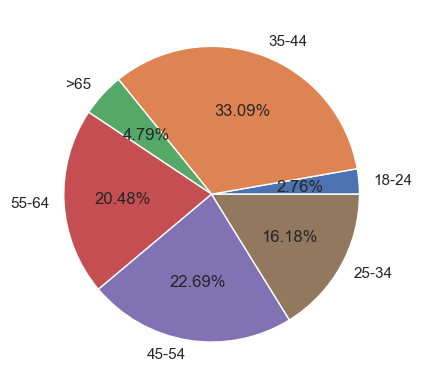

In [83]:
warnings.filterwarnings('ignore')
%matplotlib inline
sns.set()
l,a = list(set(df['Age_Segment'])),[]
for j in range(len(l)):
    a.append(df['Age_Segment'].to_list().count(l[j]))
    l[j] = l[j]
plt.pie(a,labels=l,autopct='%1.2f%%')
plt.show()

#### 2. Kolom `Education`

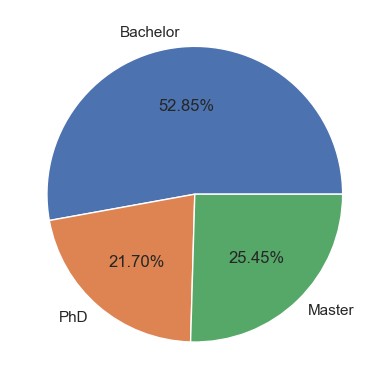

In [84]:
warnings.filterwarnings('ignore')
%matplotlib inline
sns.set()
l,a = list(set(df['Education'])),[]
for j in range(len(l)):
    a.append(df['Education'].to_list().count(l[j]))
    l[j] = l[j]
plt.pie(a,labels=l,autopct='%1.2f%%')
plt.show()

#### 3. Kolom `Marital_Status`

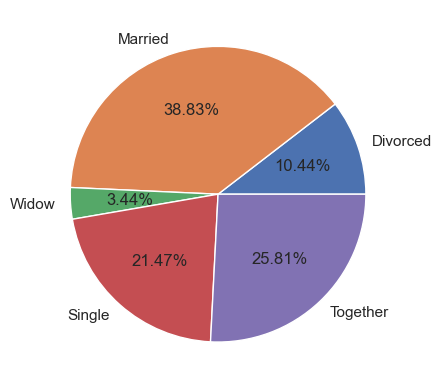

In [85]:
warnings.filterwarnings('ignore')
%matplotlib inline
sns.set()
l,a = list(set(df['Marital_Status'])),[]
for j in range(len(l)):
    a.append(df['Marital_Status'].to_list().count(l[j]))
    l[j] = l[j]
plt.pie(a,labels=l,autopct='%1.2f%%')
plt.show()

#### 4. Kolom `Income` & `Income_Segment`

<Figure size 1200x900 with 0 Axes>

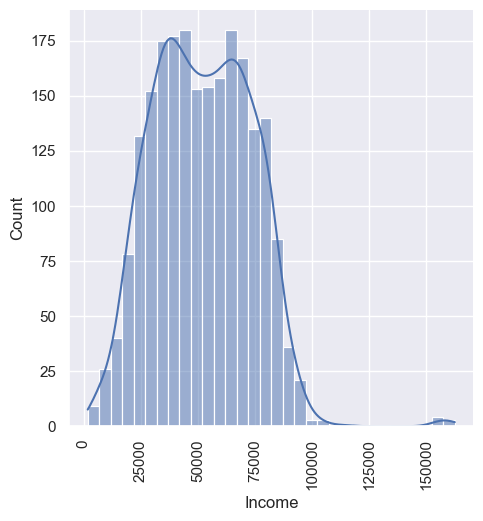

In [86]:
warnings.filterwarnings('ignore')
%matplotlib inline
sns.set()
plt.figure(figsize=(12,9))
sns.displot(df['Income'],kde=True)
plt.xticks(rotation = 90)
plt.show()

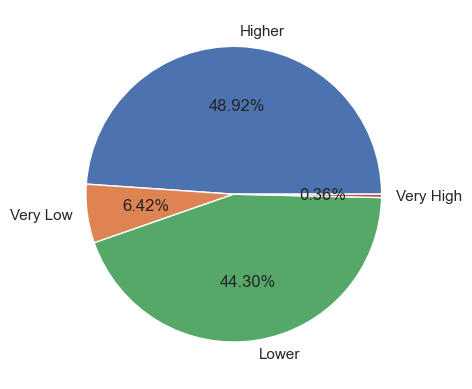

In [87]:
warnings.filterwarnings('ignore')
%matplotlib inline
sns.set()
l,a = list(set(df['Income_Segment'])),[]
for j in range(len(l)):
    a.append(df['Income_Segment'].to_list().count(l[j]))
    l[j] = l[j]
plt.pie(a,labels=l,autopct='%1.2f%%')
plt.show()

#### 5. Kolom `Children`

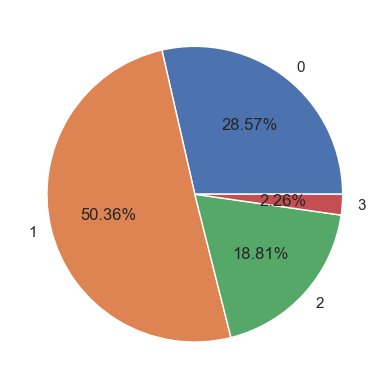

In [88]:
warnings.filterwarnings('ignore')
%matplotlib inline
sns.set()
l,a = list(set(df['Children'])),[]
for j in range(len(l)):
    a.append(df['Children'].to_list().count(l[j]))
    l[j] = l[j]
plt.pie(a,labels=l,autopct='%1.2f%%')
plt.show()

### C.5.b Correlation Matrix

Dilakukan plot correlation matrix untuk kolom yang mengandung data **kuantitatif**. Plot ini bertujuan mengetahui korelasi antar kolom menggunakan metode **Pearson**.

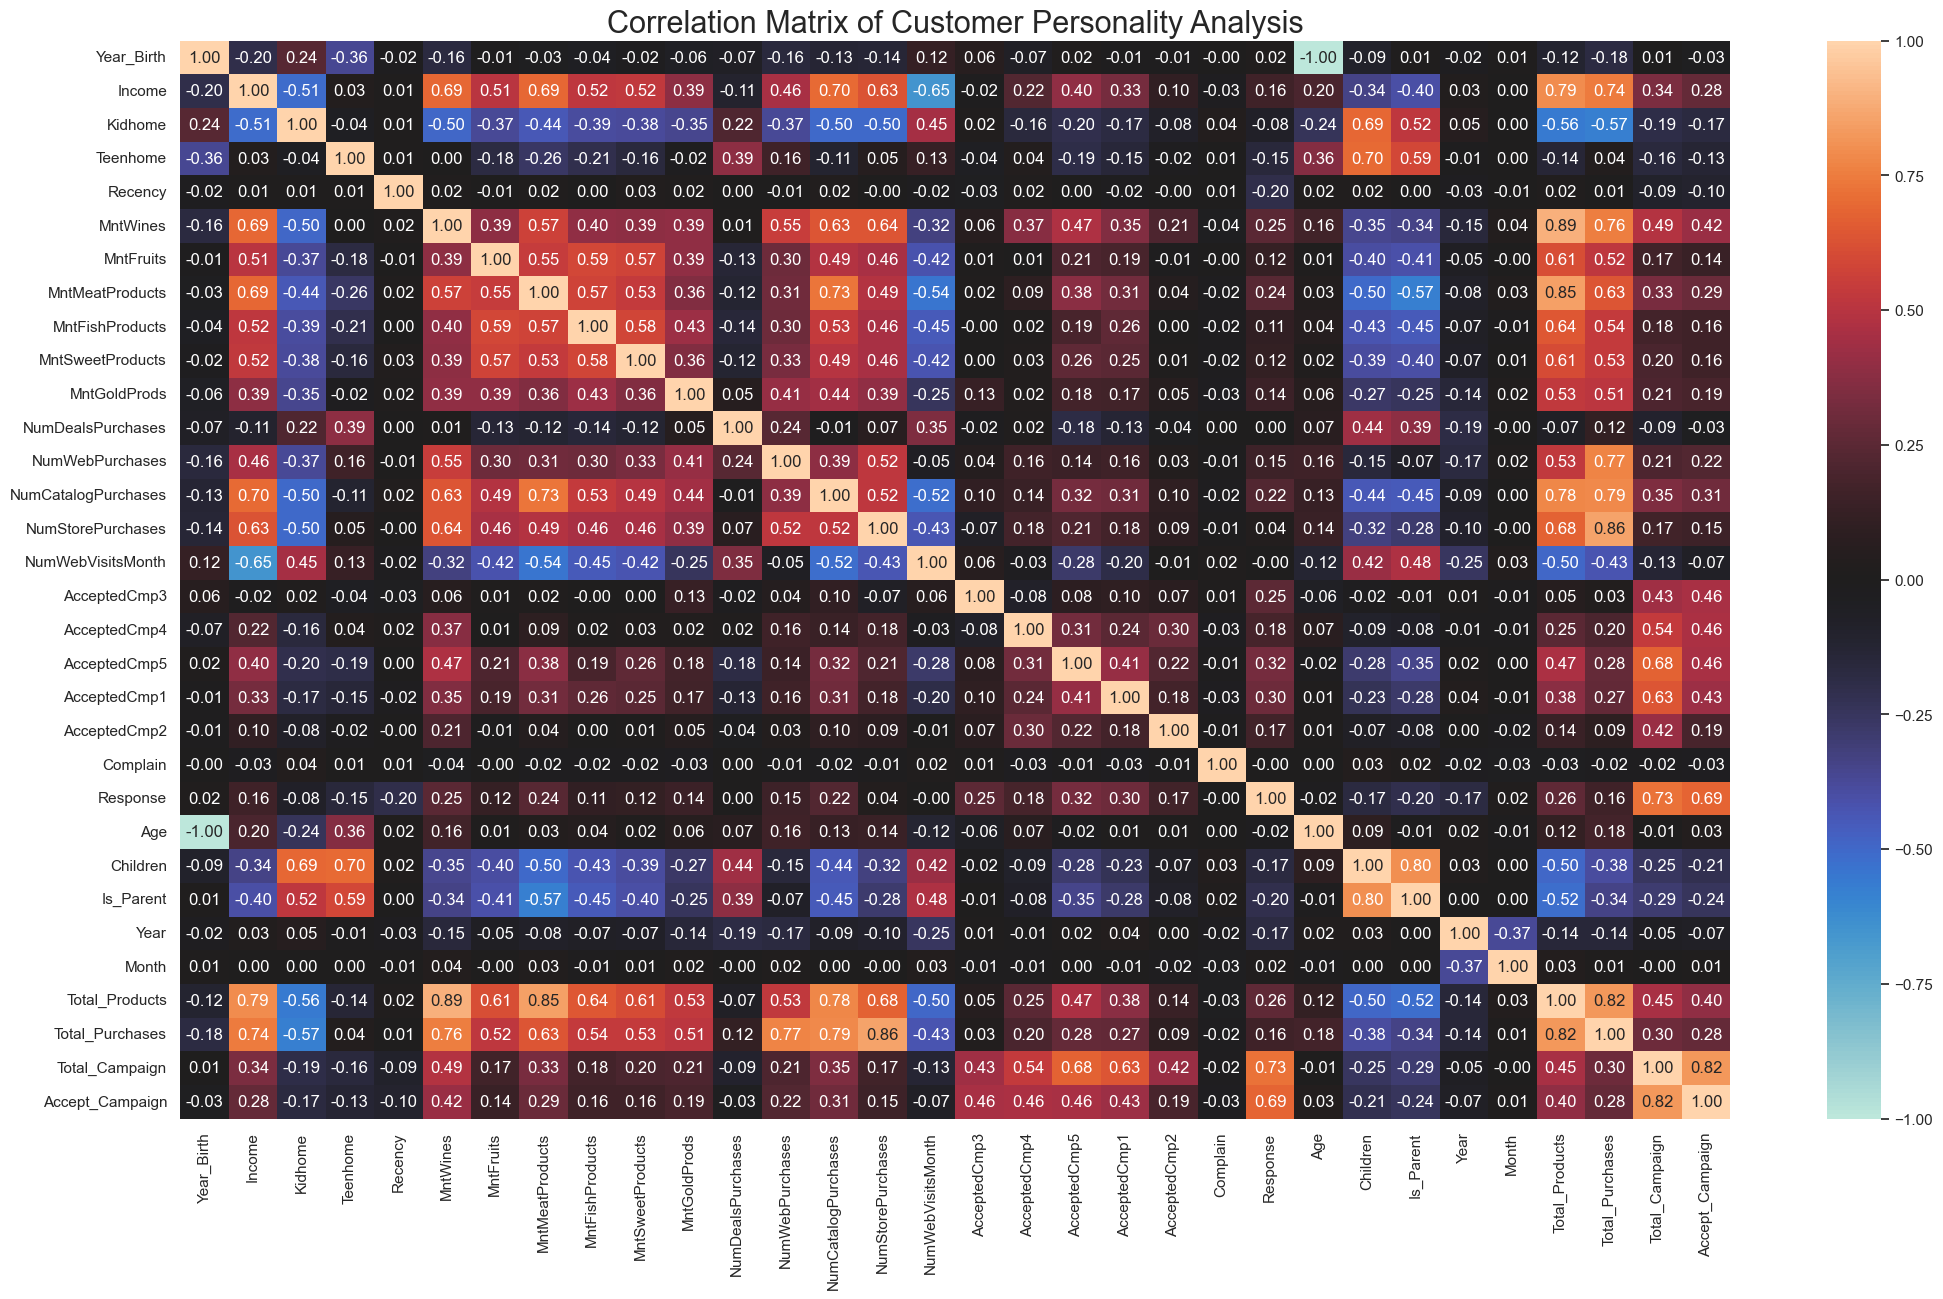

In [89]:
cmap = sns.diverging_palette(220, 10, as_cmap=True)
plt.figure(figsize=(25, 14))
plt.title('Correlation Matrix of Customer Personality Analysis', fontsize=22)
sns.heatmap(df.corr(), annot=True,
            fmt='.2f', center=0)

plt.show()

Dari Correlation Matrix diatas, dapat dilihat bahwa:
* `Income` memiliki korelasi kuat dengan `Total_Products` & `Total_Purchases` yang menandakan semakin tinggi penghasilan customer, semakin besar amount spent nya & semakin sering mereka melakukan pembelian.
* `Children` memiliki korelasi negatif dengan `Total_Products` & `Total_Purchases` yang menandakan semakin banyak anak (tanggungan) semakin sedikit kecil amount spent nya & semakin jarang mereka melakukan pembelian.
* Amount spent (`Total_Products`) memiliki korelasi yang tinggi dengan `MntWines` & `MntMeatProducts` dibandingkan produk lain, yang menandakan kedua produk tersebut yang paling berpengaruh kepada amount spent.
* Amount spent (`Total_Products`) memiliki korelasi tertinggi dengan `NumCatalogPurchases` sementara frekuensi pembelian (`Total_Purchases`) memiliki korelasi tertinggi dengan `NumStorePurchases`. Hal tersebut menandakan bahwa customer cenderung lebih sering berbelanja langsung di toko, namun spent lebih banyak ketika berbelanja menggunakan katalog.
* `Total_Products` & `Total_Purchases` juga saling berkorelasi positif yang berarti semakin tinggi jumlah pembelian pastinya amount spent nya juga semakin besar.
* Total pembelian dengan diskon (`NumDealsPurchases`) memiliki korelasi yang lebih tinggi pada `NumWebPurchases`, yang menandakan pembelian melalui situs web lebih menarik customer ketika ada diskon.
* Customer yang menerima penawaran (`Accept_Campaign`) lebih banyak untuk produk `MntWines` & `MntMeatProducts`, kemudian untuk pembelian menggunakan katalog (`NumCatalogPurchases`)

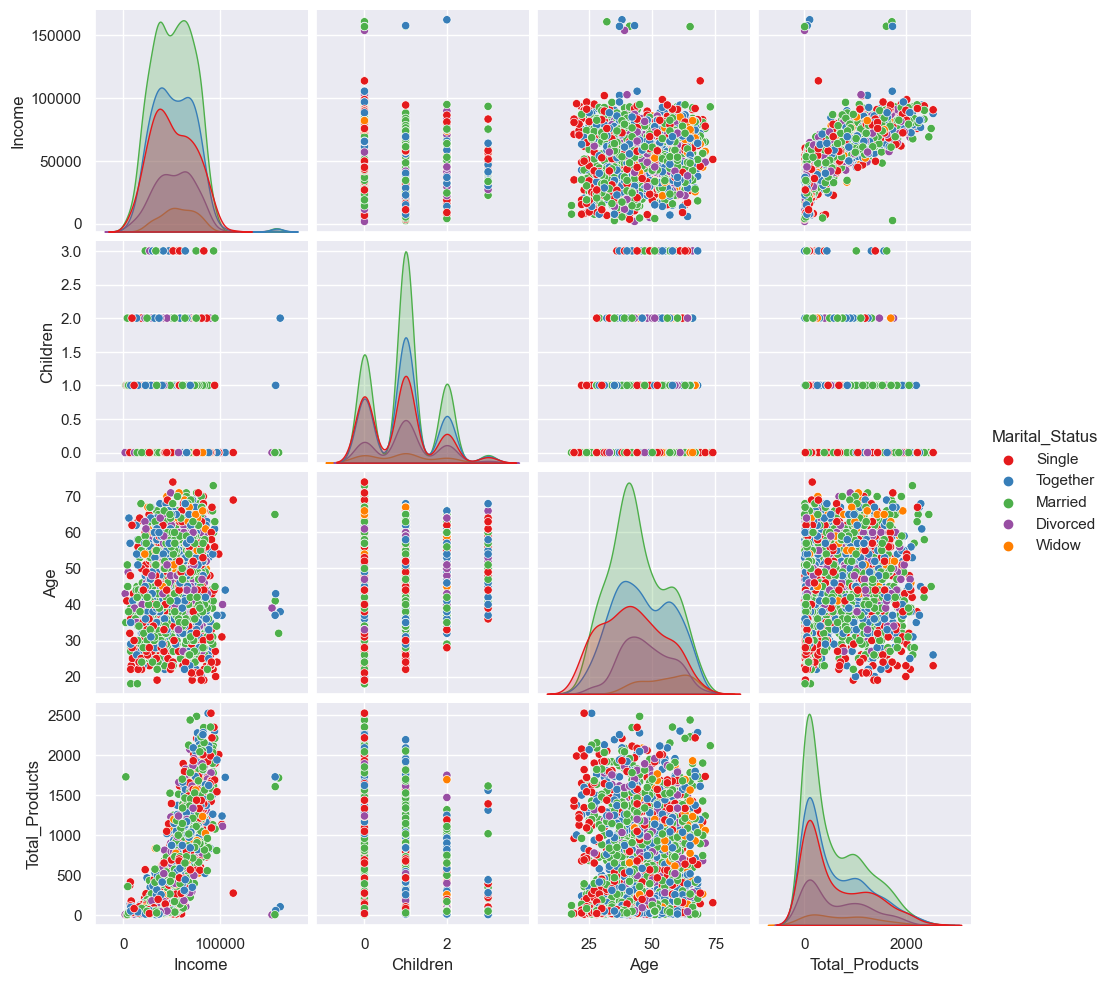

In [90]:
to_plot = ['Income', 'Education', 'Children', 'Age',
           'Total_Products', 'Marital_Status']
sns.pairplot(df[to_plot], hue='Marital_Status', palette='Set1')
plt.show()

In [91]:
df

Year_Birth Education Marital_Status   Income  Kidhome  Teenhome  \
0     1957        Bachelor  Single         58138.0  0        0          
1     1954        Bachelor  Single         46344.0  1        1          
2     1965        Bachelor  Together       71613.0  0        0          
3     1984        Bachelor  Together       26646.0  1        0          
4     1981        PhD       Married        58293.0  1        0          
...    ...        ...           ...            ... ..       ..          
2235  1967        Bachelor  Married        61223.0  0        1          
2236  1946        PhD       Together       64014.0  2        1          
2237  1981        Bachelor  Divorced       56981.0  0        0          
2238  1956        Master    Together       69245.0  0        1          
2239  1954        PhD       Married        52869.0  1        1          

     Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  \
0    2012-04-09   58       635       88         546               
1    2014-08-03   38       11        1          6                 
2    2013-08-21   26       426       49         127               
3    2014-10-02   26       11        4          20                
4    2014-01-19   94       173       43         118               
...         ...   ..       ...       ..         ...               
2235 2013-06-13   46       709       43         182               
2236 2014-10-06   56       406       0          30                
2237 2014-01-25   91       908       48         217               
2238 2014-01-24   8        428       30         214               
2239 2012-10-15   40       84        3          61                

      MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
0     172              88                88            3                   
1     2                1                 6             2                   
2     111              21                42            1                   
3     10               3                 5             2                   
4     46               27                15            5                   
...   ..               ..                ..           ..                   
2235  42               118               247           2                   
2236  0                0                 8             7                   
2237  32               12                24            1                   
2238  80               30                61            2                   
2239  2                1                 21            3                   

      NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
0     8                10                   4                   
1     1                1                    2                   
2     8                2                    10                  
3     2                0                    4                   
4     5                3                    6                   
...  ..               ..                   ..                   
2235  9                3                    4                   
2236  8                2                    5                   
2237  2                3                    13                  
2238  6                5                    10                  
2239  3                1                    4                   

      NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
0     7                  0             0             0              
1     5                  0             0             0              
2     4                  0             0             0              
3     6                  0             0             0              
4     5                  0             0             0              
...  ..                 ..            ..            ..              
2235  5                  0             0             0              
2236  7                  0             0             0              
2237  6  

### C.5.c Multivariate Analysis

#### 1. `Total_Products` & `Total_Purchases`

##### Pengecekan distribusi normal dari kolom `Total_Products` & `Total_Purchases`

Mendefinisikan fungsi result

In [92]:
def result(pvalue, alpha=0.05, ha="", h0=""):

  if pvalue < alpha:
    print(f"Tolak H0. {ha}")
  else:
    print(f"Terima H0. {h0}")

Pada langkah awal, kita akan mengecek distribusi normal untuk kolom `Total_Products`

<Figure size 1200x900 with 0 Axes>

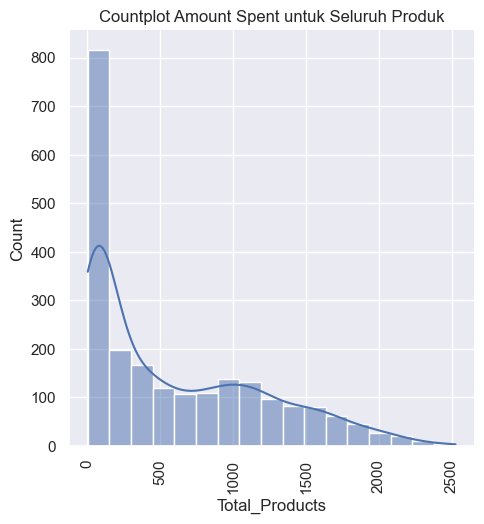

In [93]:
warnings.filterwarnings('ignore')
%matplotlib inline
sns.set()
plt.figure(figsize=(12,9))
sns.displot(df['Total_Products'],kde=True)
plt.xticks(rotation = 90)
plt.title('Countplot Amount Spent untuk Seluruh Produk')
plt.show()

In [94]:
stats, pval=normaltest(df['Total_Products'])
print(stats,pval)
if pval<=0.05:
    print('Data terdistribusi tidak normal') #Ha
else:
    print('Data terdistribusi normal') #Ho

223.92937455703606 2.3678497816117787e-49
Data terdistribusi tidak normal


<Figure size 1200x900 with 0 Axes>

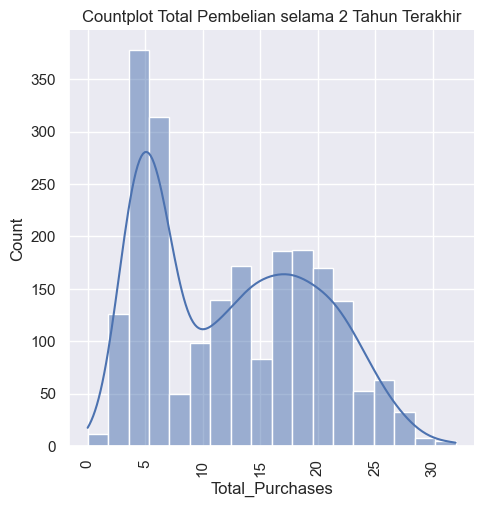

In [95]:
warnings.filterwarnings('ignore')
%matplotlib inline
sns.set()
plt.figure(figsize=(12,9))
sns.displot(df['Total_Purchases'],kde=True)
plt.xticks(rotation = 90)
plt.title('Countplot Total Pembelian selama 2 Tahun Terakhir')
plt.show()

In [96]:
stats, pval=normaltest(df['Total_Purchases'])
print(stats,pval)
if pval<=0.05:
    print('Data terdistribusi tidak normal') #Ha
else:
    print('Data terdistribusi normal') #Ho

1032.9178180657398 5.0669390154579234e-225
Data terdistribusi tidak normal


Kolom `Total_Products` `Total_Purchases` berdistribusi **tidak normal**, sehingga gunakan **Mann–Whitney U test**.

##### `Education`

**Akan menjawab pertanyaan:**
* Customer segment `Education` apa yang paling banyak amount spent nya & paling sering melakukan pembelian?
* Apakah suatu segmen `Education` secara signifikan lebih besar dari segmen lainnya? 

Untuk mengetahui persebaran data kategorikal (`Education` & `Marital_Status`) vs numerikal (`Total_Products` & `Total_Purchases`) akan dibuat bar plot. Selain itu kita juga akan menambahkan kolom `Age` & `Income` untuk melihat tren nya.

In [97]:
Segment_Y = ['Total_Products','Total_Purchases','Age','Income']

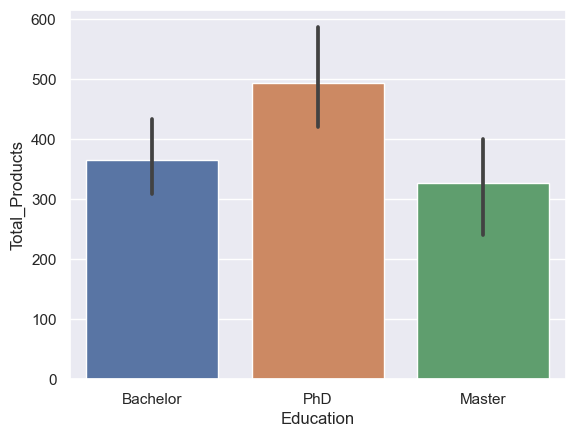

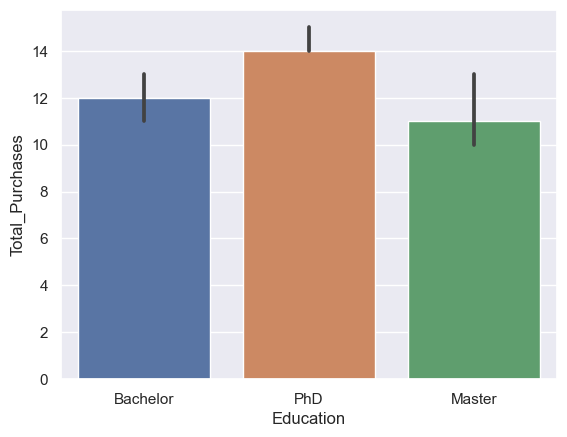

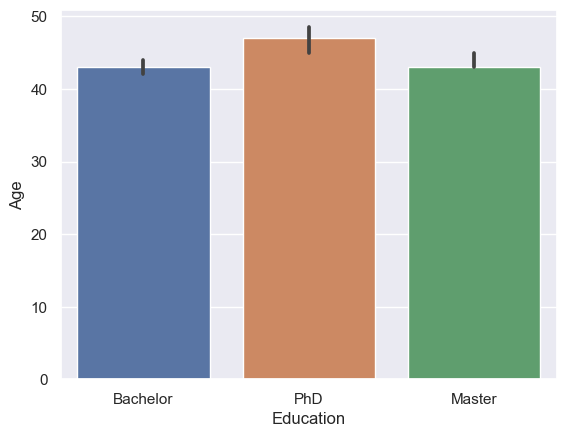

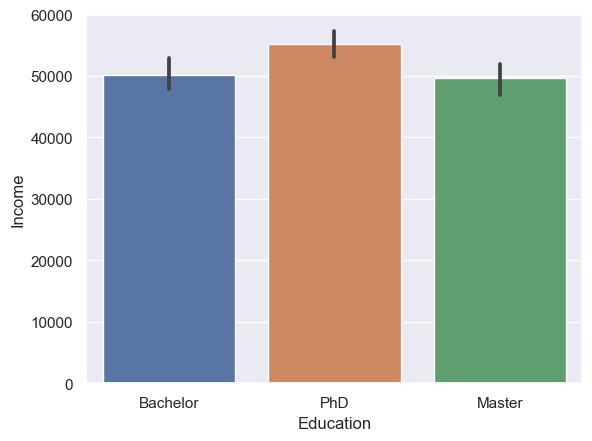

In [98]:
warnings.filterwarnings('ignore')
%matplotlib inline
sns.set()
for i in Segment_Y:
    sns.barplot(data=df, y =i, x = df['Education'], estimator = np.median)
    plt.show()

Untuk kolom `Education` terlihat jenjang pendidikan `PhD` memiliki median `Total_Products` & `Total_Purchases` yang **paling tinggi** diantara yang lain, oleh karena itu kita akan menguji nya menggunakan Non parametrik test **Mann Whitney U test**.

In [99]:
phd = df.loc[df['Education'] == 'PhD', 'Total_Products']
non_phd = df.loc[~(df['Education'] == 'PhD'), 'Total_Products']

stats, pvalue = mannwhitneyu(phd, non_phd, alternative='greater')

H0="Median kelompok PhD kurang dari atau sama dengan median kelompok non-PhD"
Ha="Median kelompok PhD lebih besar dibanding median kelompok non-PhD"

result(pvalue, ha=Ha, h0=H0)
print(stats, pvalue)

Tolak H0. Median kelompok PhD lebih besar dibanding median kelompok non-PhD
450975.0 0.0021828436561714157


In [100]:
phd = df.loc[df['Education'] == 'PhD', 'Total_Purchases']
non_phd = df.loc[~(df['Education'] == 'PhD'), 'Total_Purchases']

stats, pvalue = mannwhitneyu(phd, non_phd, alternative='greater')

H0="Median kelompok PhD kurang dari atau sama dengan median kelompok non-PhD"
Ha="Median kelompok PhD lebih besar dibanding median kelompok non-PhD"

result(pvalue, ha=Ha, h0=H0)
print(stats, pvalue)

Tolak H0. Median kelompok PhD lebih besar dibanding median kelompok non-PhD
453943.5 0.000984575171675523


Kita juga akan menguji apakah `Age` & `Income` memiliki pada kelompok `PhD` memang lebih besar dari kelompok lain atau tidak.

In [101]:
phd = df.loc[df['Education'] == 'PhD', 'Income']
non_phd = df.loc[~(df['Education'] == 'PhD'), 'Income']

stats, pvalue = mannwhitneyu(phd, non_phd, alternative='greater')

H0="Median kelompok PhD kurang dari atau sama dengan median kelompok non-PhD"
Ha="Median kelompok PhD lebih besar dibanding median kelompok non-PhD"

result(pvalue, ha=Ha, h0=H0)
print(stats, pvalue)

Tolak H0. Median kelompok PhD lebih besar dibanding median kelompok non-PhD
470810.0 4.246742855985641e-06


In [102]:
phd = df.loc[df['Education'] == 'PhD', 'Age']
non_phd = df.loc[~(df['Education'] == 'PhD'), 'Age']

stats, pvalue = mannwhitneyu(phd, non_phd, alternative='greater')

H0="Median kelompok PhD kurang dari atau sama dengan median kelompok non-PhD"
Ha="Median kelompok PhD lebih besar dibanding median kelompok non-PhD"

result(pvalue, ha=Ha, h0=H0)
print(stats, pvalue)

Tolak H0. Median kelompok PhD lebih besar dibanding median kelompok non-PhD
484470.5 1.368597050599863e-08


Dari data diatas bisa disimpulkan bahwa customer yang memiliki **pendidikan tinggi** cenderung lebih sering melakukan pembelian dan mengeluarkan spent yang banyak, merujuk pada grafik & hasil pengujian **Mann Whitney U test** yang menyatakan bahwa Median kelompok `PhD` lebih besar dibanding median kelompok `non-PhD`.
<br><br>
Hal ini dapat dikarenakan kelompok `PhD` memiliki median **pendapatan yang lebih tinggi** daripada median kelompok jenjang pendidikan lain, jadi customer tersebut dapat lebih mudah mengalokasikan uang untuk belanja. Ditemukan fakta juga bahwa kelompok `PhD` juga memiliki **umur yang lebih tua** daripada kelompok lain.

Untuk langkah selanjutnya, kita akan menganalisa proporsi antara ketiga kategori `Education` dalam pie chart.

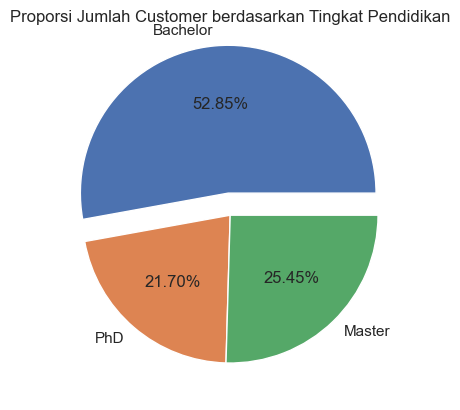

In [103]:
warnings.filterwarnings('ignore')
%matplotlib inline
sns.set()
l,a = list(set(df['Education'])),[]
for j in range(len(l)):
    a.append(df['Education'].to_list().count(l[j]))
    l[j] = l[j]
plt.pie(a,labels=l,autopct='%1.2f%%',explode=[0.15,0,0])
plt.title('Proporsi Jumlah Customer berdasarkan Tingkat Pendidikan')
plt.show()

Jika dilihat dari proporsi pada dataset ini, hanya **21.70%** customer dari jenjang pendidikan `PhD`. Padahal, segmen `Education` ini sangat potensial karena amount spent nya yang besar selama 2 tahun ke belakang ini. Kelompok PhD juga tercatat paling sering melakukan pembelian. Sehingga untuk ke depannya, ada baiknya untuk **memprioritaskan customer yang bergelar `PhD`**.

**Jawaban pertanyaan:**
* Customer segment `Education` apa yang paling banyak amount spent nya & paling sering melakukan pembelian?
    * Customer segmen `PhD` memiliki amount spent tertinggi & paling sering melakukan pembelian.
* Apakah suatu segmen `Education` secara signifikan lebih besar dari segmen lainnya? 
    * Customer segmen `PhD` memiliki median kelompok yang lebih besar dibanding median kelompok non-PhD

##### `Marital Status`

**Akan menjawab pertanyaan:**
* Status pernikahan apa yang paling sering melakukan pembelian dan spent paling banyak?
* Apakah median status pernikahan tertentu signifikan lebih besar dibanding median kelompok lain?

Pertama, kita buat bar plot antara `Marital_Status` dengan `Total_Products` & `Total_Purchases`

In [104]:
Segment_Y2 = ['Total_Products','Total_Purchases']

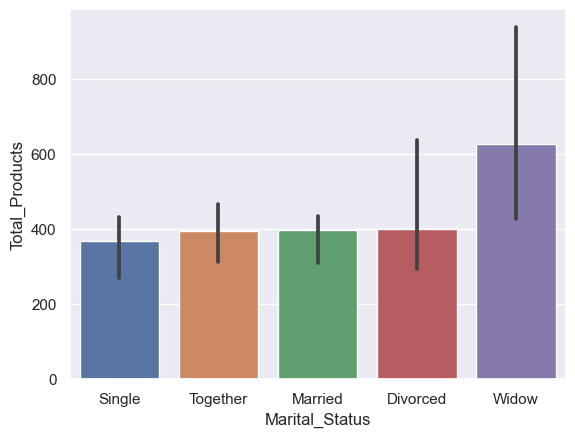

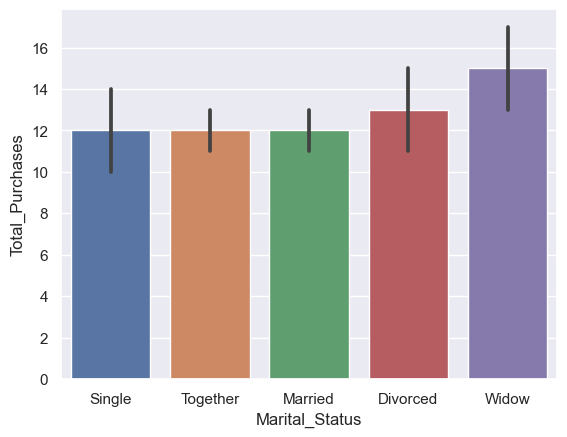

In [105]:
warnings.filterwarnings('ignore')
%matplotlib inline
sns.set()
for i in Segment_Y2:
    sns.barplot(data=df, y=i, x=df['Marital_Status'], estimator=np.median)
    plt.show()

Untuk kolom `Marital_Status` terlihat seorang janda (`Widow`) memiliki median `Total_Products` & `Total_Purchases` yang paling tinggi diantara yang lain, oleh karena itu kita akan menguji nya menggunakan Non parametrik test **Mann Whitney U test**.

In [106]:
widow = df.loc[df['Marital_Status'] == 'Widow', 'Total_Products']
non_widow = df.loc[~(df['Marital_Status'] == 'Widow'), 'Total_Products']

stats, pvalue = mannwhitneyu(widow, non_widow, alternative='greater')
print(stats, pvalue)

H0="Median kelompok widow kurang dari atau sama dengan median kelompok non-widow"
Ha="Median kelompok widow lebih besar dibanding median kelompok non-widow"

result(pvalue, ha=Ha, h0=H0)

93537.0 0.011894044067267894
Tolak H0. Median kelompok widow lebih besar dibanding median kelompok non-widow


In [107]:
widow = df.loc[df['Marital_Status'] == 'Widow', 'Total_Purchases']
non_widow = df.loc[~(df['Marital_Status'] == 'Widow'), 'Total_Purchases']

stats, pvalue = mannwhitneyu(widow, non_widow, alternative='greater')
print(stats, pvalue)

H0="Median kelompok widow kurang dari atau sama dengan median kelompok non-widow"
Ha="Median kelompok widow lebih besar dibanding median kelompok non-widow"

result(pvalue, ha=Ha, h0=H0)

93130.0 0.014282477744609614
Tolak H0. Median kelompok widow lebih besar dibanding median kelompok non-widow


Terbukti bahwa janda memiliki amount spent lebih besar dan total pembelian yang lebih banyak dibanding segmen `Marital_Status` yang lain.

Langkah selanjutnya, mari kita lihat proporsinya.

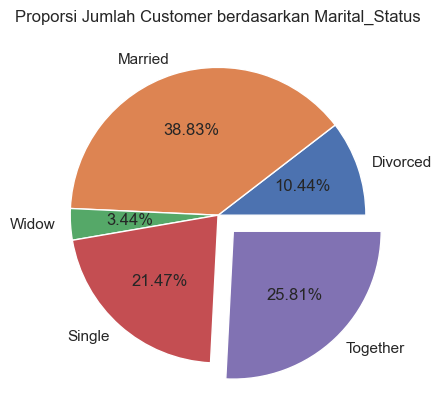

In [108]:
warnings.filterwarnings('ignore')
%matplotlib inline
sns.set()
l,a = list(set(df['Marital_Status'])),[]
for j in range(len(l)):
    a.append(df['Marital_Status'].to_list().count(l[j]))
    l[j] = l[j]
plt.pie(a,labels=l,autopct='%1.2f%%',explode=[0,0,0,0,0.15])
plt.title('Proporsi Jumlah Customer berdasarkan Marital_Status')
plt.show()

Ternyata secara proporsi hanya **3,44%** saja dari seluruh kategori dalam kolom `Marital_Status`. Untuk menganalisanya lebih dalam, kita akan mengsegmentasi ulang berdasarkan customer tersebut hidup sendiri atau hidup bersama:<br>
* `Married`,`Together` -> `Living_Together`
* `Single`,`Divorce`,`Widow` -> `Living_Alone`

In [109]:
df['Marital_Status'].value_counts()

Married     859
Together    571
Single      475
Divorced    231
Widow       76 
Name: Marital_Status, dtype: int64

In [110]:
df

Year_Birth Education Marital_Status   Income  Kidhome  Teenhome  \
0     1957        Bachelor  Single         58138.0  0        0          
1     1954        Bachelor  Single         46344.0  1        1          
2     1965        Bachelor  Together       71613.0  0        0          
3     1984        Bachelor  Together       26646.0  1        0          
4     1981        PhD       Married        58293.0  1        0          
...    ...        ...           ...            ... ..       ..          
2235  1967        Bachelor  Married        61223.0  0        1          
2236  1946        PhD       Together       64014.0  2        1          
2237  1981        Bachelor  Divorced       56981.0  0        0          
2238  1956        Master    Together       69245.0  0        1          
2239  1954        PhD       Married        52869.0  1        1          

     Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  \
0    2012-04-09   58       635       88         546               
1    2014-08-03   38       11        1          6                 
2    2013-08-21   26       426       49         127               
3    2014-10-02   26       11        4          20                
4    2014-01-19   94       173       43         118               
...         ...   ..       ...       ..         ...               
2235 2013-06-13   46       709       43         182               
2236 2014-10-06   56       406       0          30                
2237 2014-01-25   91       908       48         217               
2238 2014-01-24   8        428       30         214               
2239 2012-10-15   40       84        3          61                

      MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
0     172              88                88            3                   
1     2                1                 6             2                   
2     111              21                42            1                   
3     10               3                 5             2                   
4     46               27                15            5                   
...   ..               ..                ..           ..                   
2235  42               118               247           2                   
2236  0                0                 8             7                   
2237  32               12                24            1                   
2238  80               30                61            2                   
2239  2                1                 21            3                   

      NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
0     8                10                   4                   
1     1                1                    2                   
2     8                2                    10                  
3     2                0                    4                   
4     5                3                    6                   
...  ..               ..                   ..                   
2235  9                3                    4                   
2236  8                2                    5                   
2237  2                3                    13                  
2238  6                5                    10                  
2239  3                1                    4                   

      NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
0     7                  0             0             0              
1     5                  0             0             0              
2     4                  0             0             0              
3     6                  0             0             0              
4     5                  0             0             0              
...  ..                 ..            ..            ..              
2235  5                  0             0             0              
2236  7                  0             0             0              
2237  6  

In [111]:
df['Marital_Status2'] = ['Living_Together' if x=='Married' or x=='Together' else 'Living_Alone' for x in df['Marital_Status']]

In [112]:
df

Year_Birth Education Marital_Status   Income  Kidhome  Teenhome  \
0     1957        Bachelor  Single         58138.0  0        0          
1     1954        Bachelor  Single         46344.0  1        1          
2     1965        Bachelor  Together       71613.0  0        0          
3     1984        Bachelor  Together       26646.0  1        0          
4     1981        PhD       Married        58293.0  1        0          
...    ...        ...           ...            ... ..       ..          
2235  1967        Bachelor  Married        61223.0  0        1          
2236  1946        PhD       Together       64014.0  2        1          
2237  1981        Bachelor  Divorced       56981.0  0        0          
2238  1956        Master    Together       69245.0  0        1          
2239  1954        PhD       Married        52869.0  1        1          

     Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  \
0    2012-04-09   58       635       88         546               
1    2014-08-03   38       11        1          6                 
2    2013-08-21   26       426       49         127               
3    2014-10-02   26       11        4          20                
4    2014-01-19   94       173       43         118               
...         ...   ..       ...       ..         ...               
2235 2013-06-13   46       709       43         182               
2236 2014-10-06   56       406       0          30                
2237 2014-01-25   91       908       48         217               
2238 2014-01-24   8        428       30         214               
2239 2012-10-15   40       84        3          61                

      MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
0     172              88                88            3                   
1     2                1                 6             2                   
2     111              21                42            1                   
3     10               3                 5             2                   
4     46               27                15            5                   
...   ..               ..                ..           ..                   
2235  42               118               247           2                   
2236  0                0                 8             7                   
2237  32               12                24            1                   
2238  80               30                61            2                   
2239  2                1                 21            3                   

      NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
0     8                10                   4                   
1     1                1                    2                   
2     8                2                    10                  
3     2                0                    4                   
4     5                3                    6                   
...  ..               ..                   ..                   
2235  9                3                    4                   
2236  8                2                    5                   
2237  2                3                    13                  
2238  6                5                    10                  
2239  3                1                    4                   

      NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
0     7                  0             0             0              
1     5                  0             0             0              
2     4                  0             0             0              
3     6                  0             0             0              
4     5                  0             0             0              
...  ..                 ..            ..            ..              
2235  5                  0             0             0              
2236  7                  0             0             0              
2237  6  

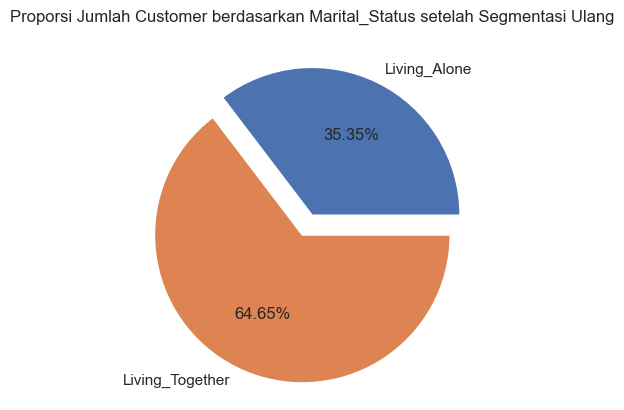

In [113]:
warnings.filterwarnings('ignore')
%matplotlib inline
sns.set()
l,a = list(set(df['Marital_Status2'])),[]
for j in range(len(l)):
    a.append(df['Marital_Status2'].to_list().count(l[j]))
    l[j] = l[j]
plt.pie(a,labels=l,autopct='%1.2f%%',explode=[0,0.15])
plt.title('Proporsi Jumlah Customer berdasarkan Marital_Status setelah Segmentasi Ulang')
plt.show()

In [114]:
df['Marital_Status2'].value_counts()

Living_Together    1430
Living_Alone       782 
Name: Marital_Status2, dtype: int64

Kemudian kita masukkan ke dalam bar plot untuk membandingkan amount spent & total pembelian antara customer yang hidup sendiri dan hidup bersama.

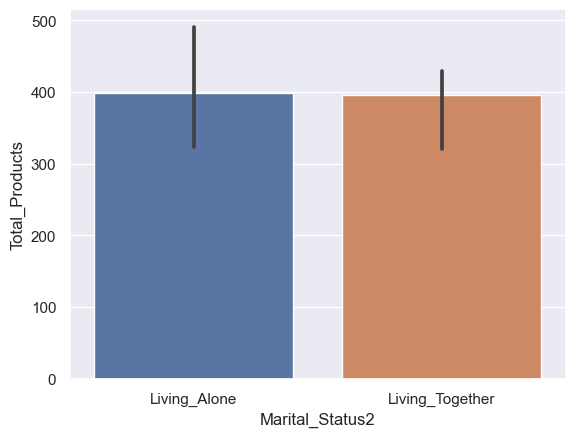

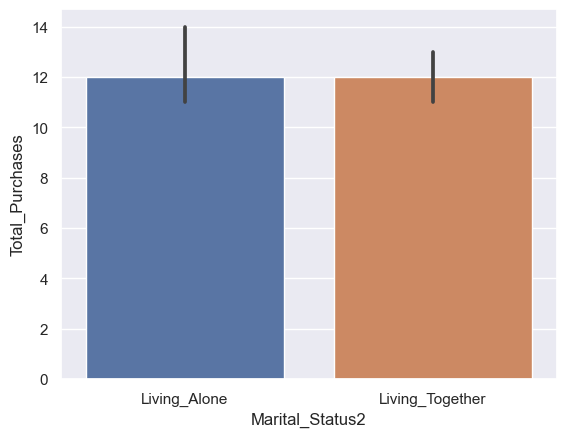

In [115]:
warnings.filterwarnings('ignore')
%matplotlib inline
sns.set()
for i in Segment_Y2:
    sns.barplot(data=df, y=i, x=df['Marital_Status2'], estimator=np.median)
    plt.show()

Kemudian kita akan menguji apakah customer yang hidup sendiri memiliki median amount spent yang lebih besar daripada customer yang hidup bersama pasangan.

In [116]:
widow = df.loc[df['Marital_Status2'] == 'Living_Alone', 'Total_Products']
non_widow = df.loc[~(df['Marital_Status2'] == 'Living_Alone'), 'Total_Products']

stats, pvalue = mannwhitneyu(widow, non_widow, alternative='greater')
print(stats, pvalue)

H0="Median kelompok Living_Alone kurang dari atau sama dengan median kelompok Living_Together"
Ha="Median kelompok Living_Alone lebih besar dibanding median kelompok Living_Together"

result(pvalue, ha=Ha, h0=H0)

569811.0 0.2285165786816623
Terima H0. Median kelompok Living_Alone kurang dari atau sama dengan median kelompok Living_Together


In [117]:
widow = df.loc[df['Marital_Status2'] == 'Living_Alone', 'Total_Purchases']
non_widow = df.loc[~(df['Marital_Status2'] == 'Living_Alone'), 'Total_Purchases']

stats, pvalue = mannwhitneyu(widow, non_widow, alternative='greater')
print(stats, pvalue)

H0="Median kelompok Living_Alone kurang dari atau sama dengan median kelompok Living_Together"
Ha="Median kelompok Living_Alone lebih besar dibanding median kelompok Living_Together"

result(pvalue, ha=Ha, h0=H0)

560603.0 0.4591035332727175
Terima H0. Median kelompok Living_Alone kurang dari atau sama dengan median kelompok Living_Together


In [118]:
widow = df.loc[df['Marital_Status2'] == 'Living_Alone', 'Total_Purchases']
non_widow = df.loc[~(df['Marital_Status2'] == 'Living_Alone'), 'Total_Purchases']

stats, pvalue = mannwhitneyu(widow, non_widow, alternative='greater')
print(stats, pvalue)

H0="Median kelompok Living_Alone kurang dari atau sama dengan median kelompok Living_Together"
Ha="Median kelompok Living_Alone lebih besar dibanding median kelompok Living_Together"

result(pvalue, ha=Ha, h0=H0)

560603.0 0.4591035332727175
Terima H0. Median kelompok Living_Alone kurang dari atau sama dengan median kelompok Living_Together


Dari hasil **Mann Whitney U Test** menunjukkan bahwa customer yang hidup sendiri ternyata tidak lebih besar dari kelompok  yang hidup bersama pasangan. Sehingga disarankan jangan menjadikan status pernikahan dalam clusterisasi dalam market analysis ini.

**Akan menjawab pertanyaan:**
* Status pernikahan apa yang paling sering melakukan pembelian dan spent paling banyak?
    * Status pernikahan yang frekuensi pembelian nya paling sering & amount spent nya paling banyak adalah kelompok `Widow`
* Apakah median status pernikahan tertentu signifikan lebih besar dibanding median kelompok lain?
    * Median kelompok status pernikahan yang hidup sendiri tidak lebih besar dari median kelompok yang hidup bersama.

##### Merged Bar Plot

Selanjutnya kita akan menggabungkan bar plot untuk membandingkan tingkat pendidikan dan status pernikahan.

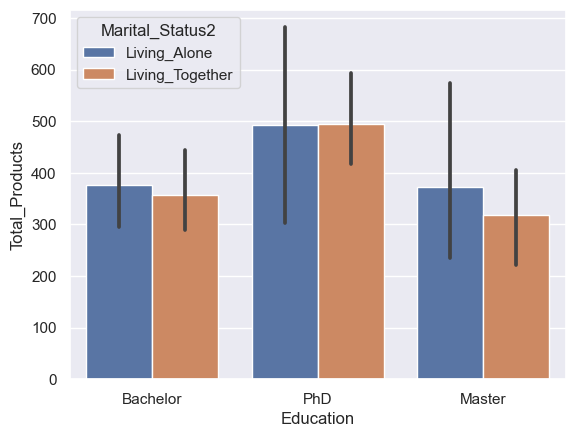

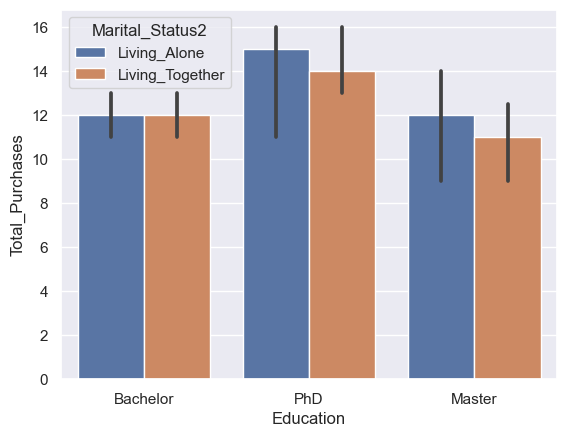

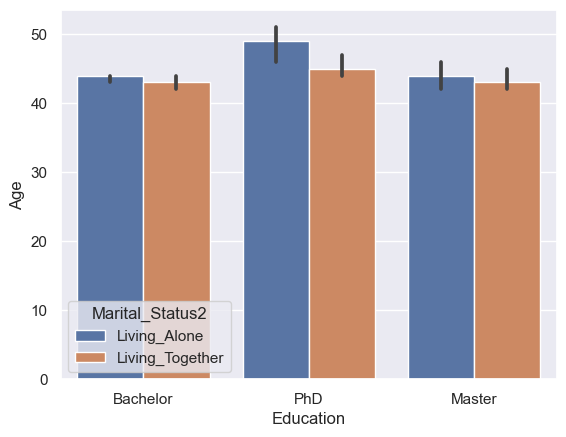

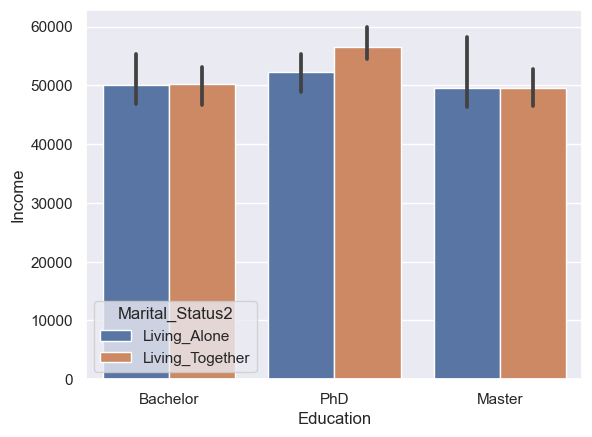

In [119]:
warnings.filterwarnings('ignore')
%matplotlib inline
sns.set()
for i in Segment_Y:
    sns.barplot(data=df, y =i, x = df['Education'], estimator = np.median,hue='Marital_Status2')
    plt.show()

Dari bar plot diatas, dapat terlihat hanya terdapat sedikit perbedaan pada segment `Education` yang akan kita jadikan target pada sub-pembahasan sebelumnya (`PhD`). Sehingga sebaiknya dalam strategi marketing selanjutnya, jangan membeda-bedakan customer berdasarkan status pernikahan.

##### `Dt_Customer`

Kemudian kita akan melihat pada periode apa, customer cenderung komsumtif dengan membuat line plot.

In [120]:
Segment_Y3 = ['Total_Products','Total_Purchases','NumDealsPurchases']

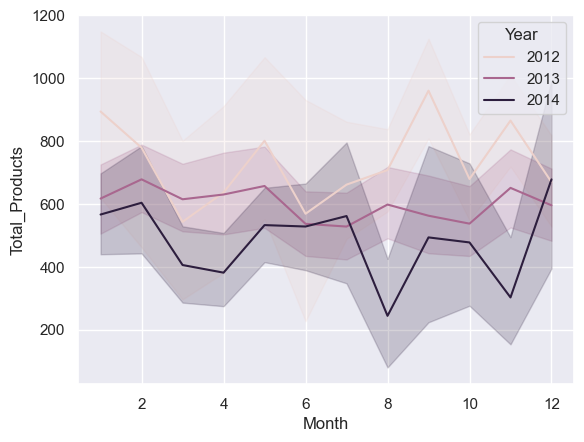

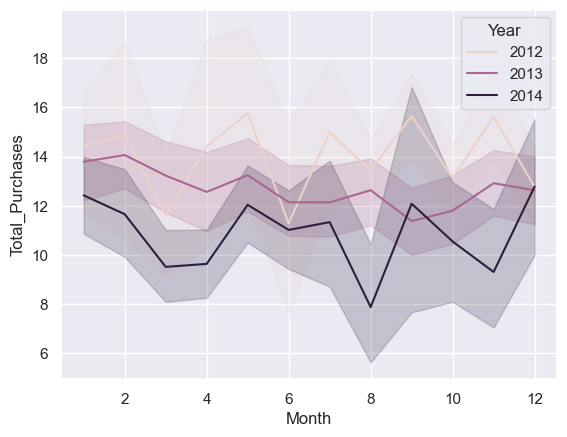

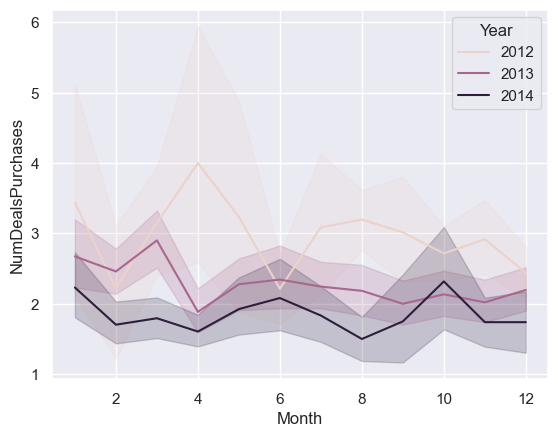

In [121]:
warnings.filterwarnings('ignore')
%matplotlib inline
sns.set()
for i in Segment_Y3:
    sns.lineplot(data=df, y=i, x='Month',hue='Year')
    plt.show()

Bisa terlihat dalam grafik, amount spent & total pembelian cenderung **fluktatif** dari bulan ke bulan. Kemudian tren amount spent & total pembelian juga **cenderung** menurun pada tahun **2012 ke 2014**. Hal ini menandakan **antusiasme customer semakin lama semakin menurun**.

#### 2. `Campaign`

Pada sub-bab ini akan dibahas pengaruh `Income`, `Marital_Status`, `Kidhome`, `Teenhome`, `Education`, dan `Dt_Customer` terhadap campaign yang telah dijalankan.

##### Overview mengenai Penawaran `Campaign`

Dikutip dari situs [wordstream.com](https://www.wordstream.com/blog/ws/2014/03/17/what-is-a-good-conversion-rate), Search Conversion Rate Distribution yang merupakan persentase customer menerima tawaran campaign dari produk yang kita tawarkan, digolongkan sebagai berikut:
| Distribution Point    | Conversion Rate   | Remarks       |
| --------------------- | ----------------- | ------------- |
| Average               | 2.35%             | Unremarkable  |
| Top 25%               | 5.31%             | Awesome       |
| Top 10%               | 11.45%            | Unicorns      |

Pertama, kita akan melihat customer yang setidaknya pernah menerima sebuah offer. Kita lakukukan bar plotting pada kolom `Accept_Campaign` terhadap Total Customer.

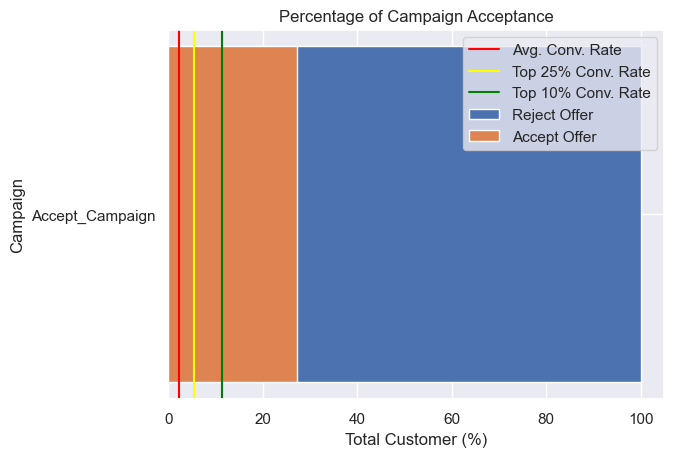

In [122]:
column_name = ['Accept_Campaign']
column_sum = [df['Accept_Campaign'].sum()/df['Accept_Campaign'].count()*100]
column_total = [100]
plt.barh(column_name, column_total)
plt.barh(column_name, column_sum)
plt.axvline(2.35, color='red')
plt.axvline(5.35, color='yellow')
plt.axvline(11.45, color='green')
plt.legend(['Avg. Conv. Rate','Top 25% Conv. Rate','Top 10% Conv. Rate','Reject Offer','Accept Offer'])
plt.title('Percentage of Campaign Acceptance')
plt.xlabel('Total Customer (%)')
plt.ylabel('Campaign')
plt.show()

Dari plot diatas dapat dianalisis bahwa jika melihat campaign secara keseluruhan (`AcceptedCmp1`, `AcceptedCmp2`, `AcceptedCmp3`, `AcceptedCmp4`, `AcceptedCmp5`, `Response`), kinerja campaign sebetulnya sudah tergolong ke **Top 10% (Unicorns)**. Namun, perlu kita analisis juga kinerja per campaign nya.

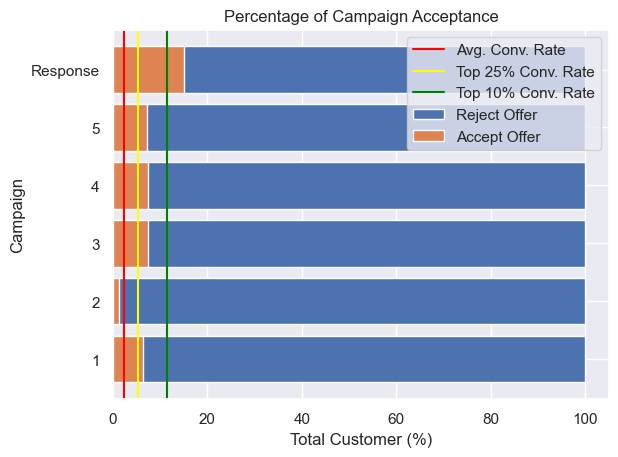

In [123]:
column_name = ['1','2','3','4','5','Response']
column_sum = [df['AcceptedCmp1'].sum()/df['AcceptedCmp1'].count()*100,df['AcceptedCmp2'].sum()/df['AcceptedCmp2'].count()*100,df['AcceptedCmp3'].sum()/df['AcceptedCmp3'].count()*100,df['AcceptedCmp4'].sum()/df['AcceptedCmp4'].count()*100,df['AcceptedCmp5'].sum()/df['AcceptedCmp5'].count()*100,df['Response'].sum()/df['Response'].count()*100]
column_total = [100,100,100,100,100,100]
plt.barh(column_name, column_total)
plt.barh(column_name, column_sum)
plt.axvline(2.35, color='red')
plt.axvline(5.35, color='yellow')
plt.axvline(11.45, color='green')
plt.legend(['Avg. Conv. Rate','Top 25% Conv. Rate','Top 10% Conv. Rate','Reject Offer','Accept Offer'])
plt.title('Percentage of Campaign Acceptance')
plt.xlabel('Total Customer (%)')
plt.ylabel('Campaign')
plt.show()

Jika dilihat per campaign, terlihat customer cenderung lebih banyak menerima tawaran ketika dilakukan campaign terakhir (`Response`). Kolom `Response` tersebut juga termasuk ke dalam Top 10% conversion rate dimana termasuk kategori **Unicorns**. Sementara kolom `AcceptedCmp1`, `AcceptedCmp3`, `AcceptedCmp4`, dan `AcceptedCmp5` termasuk ke dalam Top 25% Conversion rate dimana termasuk ke dalam kategori **Awesome**. Performa campaign terburuk yaitu pada campaign ke-2 (`AcceptedCmp2`) dimana nilainya berada dibawah rata-rata conversion rate.<br><br>

Langkah selanjutnya, kita akan menghitung persentase customer yang menerima penawaran di campagn terakhir.

In [124]:
percentage_response = df['Response'].sum()/df['Accept_Campaign'].sum()*100
print(f'Persentase Customer menerima penawaran terakhir: {percentage_response}%')

Persentase Customer menerima penawaran terakhir: 55.132450331125824%


Dari data diatas, terlihat kebanyakan customer menerima tawaran pada campaign terakhir (Kolom `Response`) yang **lebih dari setengah** dari total keseluruhan customer yang menerima tawaran (Kolom `Accept_Campaign`).<br><br>
Sehingga pada analisis ini, **kita akan mencoba mengoptimasi campaign dengan menyelam lebih dalam ke kolom `Response`.**

##### `Income`

**Akan menjawab pertanyaan**:
* Segment `Income` apa yang paling banyak menerima tawaran dari campaign?
* Segment `Income` apa yang memiliki persentase acceptance yang paling tinggi?
* Apakah ada perbedaan antara `Income` customer yang menerima penawaran campaign dengan yang tidak?

Pada tahap pertama, kita akan melakukan cross tabulation antara `Income_Segment` (yang telah dikelompokkan berdasarakan dengan proporsi Income USA pada tahun 2012-2014) dengan `Response`:

In [125]:
df_ct=pd.crosstab(df['Income_Segment'],df['Response'])
df_ct['Total']=df_ct.sum(axis=1)
df_ct['Percentage']=(df_ct[1]/df_ct['Total'])*100
df_ct.sort_values(1,ascending=False)

Response          0    1  Total  Percentage
Income_Segment                             
Higher          877  205  1082   18.946396 
Lower           865  115  980    11.734694 
Very Low        129  13   142    9.154930  
Very High       8    0    8      0.000000

Dari tabel berikut, dapat dilihat `Income_Segment` yang paling banyak menerima offer (`Response`=1) adalah income segment `Higher` dengan jumlah 205 customer, serta persentase:

In [126]:
percentage_higher = df_ct[1].iloc[0]/df_ct[1].sum(axis=0)*100
print(f'Persentase customer yang menerima tawaran dari Income_Segment Higher: {percentage_higher}%')

Persentase customer yang menerima tawaran dari Income_Segment Higher: 61.56156156156156%


Kemudian kita akan buat bar plot yang merupakan jumlah dari customer menerima tawaran campaign (`1`) dan yang tidak menerima (`0`).

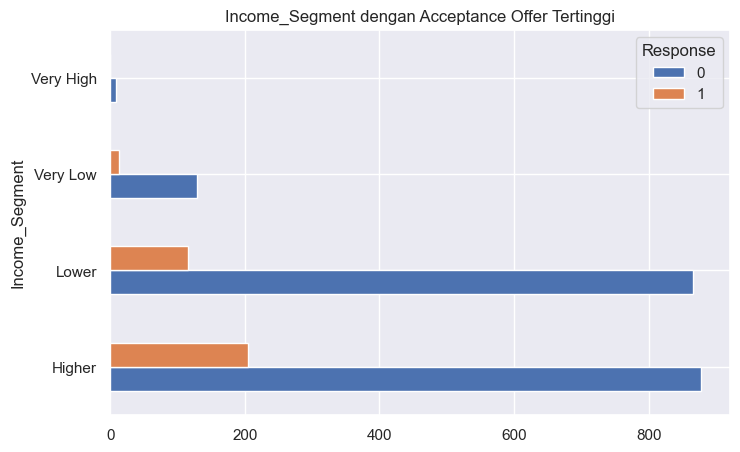

In [127]:
df_ct.sort_values(1,ascending=False).drop(columns=['Total','Percentage']).plot(kind='barh',figsize=(8,5), 
title='Income_Segment dengan Acceptance Offer Tertinggi')
plt.show()

Teriihat dari jumlahnya, customer dari `Income_Segment` yang termasuk dalam kategori `Higher` paling banyak menerima offer. Namun, kita juga perlu melihat *persentasenya* pada tiap kategori untuk melihat conversion ratenya.

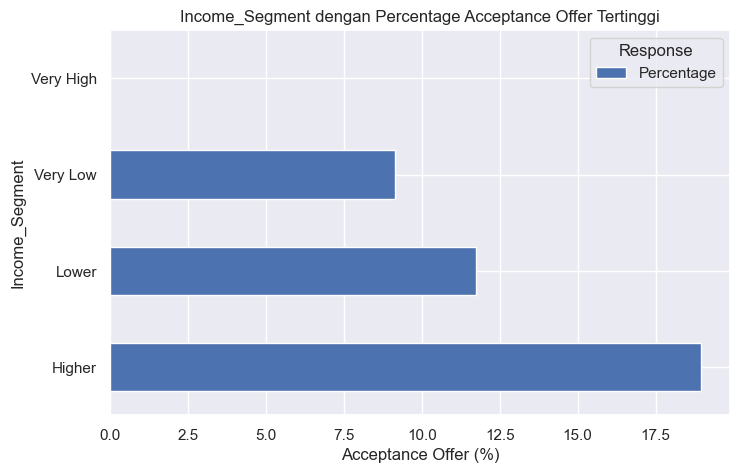

In [128]:
df_ct.sort_values(1,ascending=False).head(10).drop(columns=[0,1,'Total']).plot(kind='barh',figsize=(8,5), 
title='Income_Segment dengan Percentage Acceptance Offer Tertinggi')
plt.xlabel('Acceptance Offer (%)')
plt.ylabel('Income_Segment')
plt.show()

Dari bar plot diatas, kita bisa melihat `Income` dengan persentase menerima tawaran campaign tertinggi didapati dari segment `Higher`. Didapati juga trend bahwa segment `Very Low` memiliki persentase yang lebih kecil daripada `Lower`. Untuk segment `Very High` sepertinya kurang bisa dijadikan acuan karena hanya menampilkan 4 buah data (Hanya 0,36% dari total data). Sehingga kita mendapat insigt bahwa **Semakin tinggi pendapatan, semakin tinggi juga kemungkinan customer menerima offer**. Analisis kita ini juga sesuai dengan correlation matrix yang telah dibuat pada sub-bab sebelumnya.<br><br>
Sebagai pengingat, berikut segmentasi yang dilakukan pada chapter sebelumnya:
* `Very Low`: < $20,900
* `Lower`: $20,900 - $51,939
* `Higher`: $51,939 - $105,900
* `Very High`: > $105,900

Kemudian kita akan membuat plot histogram antara kolom `Income` vs `Response` untuk melihat trend nya.

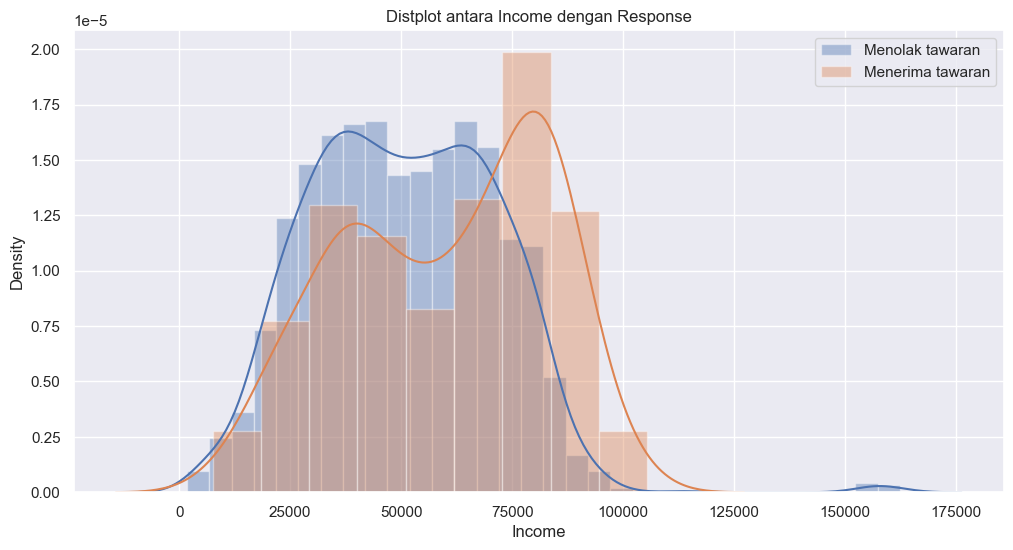

In [129]:
plt.figure(figsize=(12,6))
sns.distplot(df[df['Response']==0]['Income'],label='Menolak tawaran')
sns.distplot(df[df['Response']==1]['Income'],label='Menerima tawaran')
plt.title('Distplot antara Income dengan Response')
plt.legend()
plt.show()

Dari displot diatas, terdapat perpotongan pada `Income` pada nilai **±70000** dimana di sebelah kiri nilai tersebut, customer cenderung menolak tawaran. Sementara di sebelah kanan nilai tersebut, customer cenderung menerima tawaran. kita juga dapat melihat adanya kecenderungan **customer dengan income tinggi lebih tertarik menerima penawaran campaign**. Hal ini wajar dimana biasanya customer dengan income tinggi pastinya lebih mampu untuk menerima penawaran daripada customer yang memiliki income rendah dimana pastinya mereka lebih sulit mengalokasikan uang nya untuk program ini. Namun terdapat juga sedikit anomali bahwa customer dari `Income_Segment` `Very High` cenderung tidak menerima tawaran campaign. Hal ini dapat dikarenakan campaign yang kita tawarkan tidak sesuai dengan kelas mereka atau terdapat tawaran dari market lain dengan benefit lebih tinggi pada kategori income tersebut.

Selanjutnya kita akan mengetahui apakah ada perbedaan antara `Income` antara customer yang menerima penawaran campaign dengan yang tidak. Pertama, kita lakukan uji distribusi normal untuk menentukan kita akan menggunakan test yang akan digunakan.

In [130]:
from scipy.stats import normaltest
stats, pval=normaltest(df['Income'])
print(stats,pval)
if pval<=0.05:
    print('Data terdistribusi tidak normal') #Ha
else:
    print('Data terdistribusi normal') #Ho

69.68659753711606 7.374755280326316e-16
Data terdistribusi tidak normal


Terlihat hasil menunjukkan kolom `Income` memiliki data yang terdistribusi **tidak normal**. Sehingga kita akan melakukan Non parametrik test menggunakan **Mann Whitney U test**

In [131]:
from scipy.stats import mannwhitneyu
stats,pval=mannwhitneyu(*[df[df['Response']==i]['Income'] for i in df['Response'].unique()], alternative='greater')
print(stats,pval)
if pval <= 0.05:
    print('Tolak Ho')
else:
    print('Terima Ho')

394619.5 1.3520358711475304e-14
Tolak Ho


Dari hasil **Mann Whitney U test**, didapati bahwa memang ada perbedaan `Income` yang signifikan antara customer yang menerima offer campaign dengan yang tidak. Customer yang menerima offer berasal dari kalangan yang memiliki income tinggi. Untuk analisis lebih lengkap, akan dibuat Boxplot

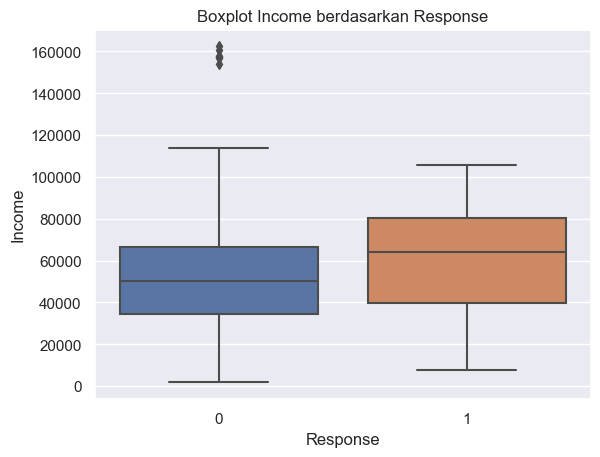

In [132]:
sns.boxplot(y='Income', x='Response', data=df)
plt.title('Boxplot Income berdasarkan Response')
plt.show()

Dari boxplot terlihat jelas bahwa customer yang menerima penawaran campaign memiliki median yang lebih tinggi dari customer yang tidak menerima penawaran campaign. Sehingga, apabila dihadapkan pada 2 opsi, maka akan lebih disarankan apabila kedepannya aksi campaign yang dilakukan berfokus pada customer dengan **income tinggi**.

Jawaban pertanyaan di awal:
* Segment `Income` apa yang paling banyak menerima tawaran dari campaign?
    * Segment Income `Higher` paling banyak menerima tawaran dengan customer 205 orang dengan persentase 61% dari total customer yang menerima tawaran
* Segment `Income` apa yang memiliki persentase acceptance yang paling tinggi?
    * Customer yang memiliki `Income_Segment` yang masuk dalam kategori `Higher` cenderung lebih menerima offer. Segment tersebut memiliki rentang `Income` $51,939 - $105,900.
* Apakah ada perbedaan antara `Income` customer yang menerima penawaran campaign dengan yang tidak?
    * Terdapat perbedaan `Income` yang signifikan antara customer yang menerima offer campaign dengan yang tidak.

##### `Marital_Status`

**Akan menjawab pertanyaan:**
* Berdasarkan status perkawinan, customer segmen apa yang lebih cenderung menerima tawaran campaign?
* Apakah proporsi customer yang menerima tawaran campaign signifikan berbeda dari yang lain? 

In [133]:
df_ct=pd.crosstab(df['Marital_Status'],df['Response'])
df_ct['Total']=df_ct.sum(axis=1)
df_ct['Percentage']=(df_ct[1]/df_ct['Total'])*100
df_ct.sort_values(1,ascending=False)

Response          0    1  Total  Percentage
Marital_Status                             
Single          367  108  475    22.736842 
Married         760  99   859    11.525029 
Together        511  60   571    10.507881 
Divorced        183  48   231    20.779221 
Widow           58   18   76     23.684211

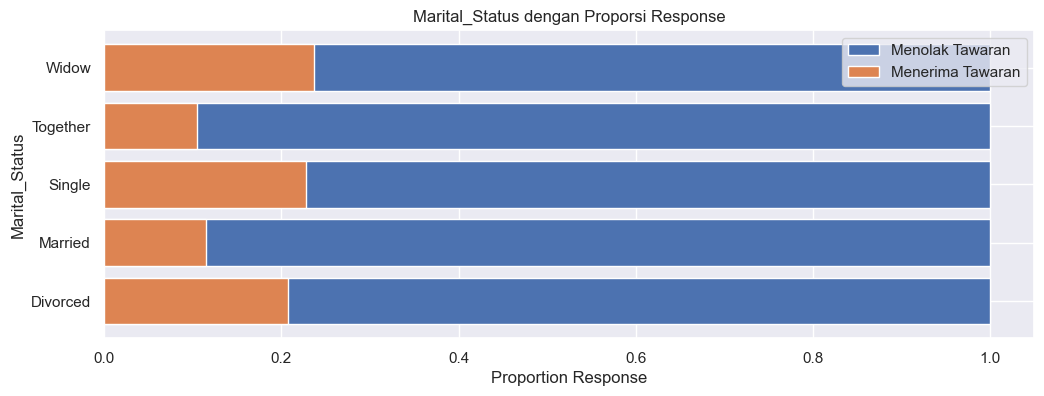

In [134]:
ct=pd.crosstab(df['Marital_Status'],df['Response'],normalize='index').sort_index()
ct['total']=ct.sum(axis=1)
plt.figure(figsize=(12,4))
plt.barh(np.arange(df['Marital_Status'].nunique()),ct['total'])
plt.barh(np.arange(df['Marital_Status'].nunique()),ct[1])
plt.xlabel('Proportion Response')
plt.ylabel('Marital_Status')
plt.legend(['Menolak Tawaran','Menerima Tawaran'])
plt.yticks(np.arange(len(ct.index.tolist())),ct.index.tolist())
plt.title('Marital_Status dengan Proporsi Response')
plt.show()

In [135]:
fig=px.sunburst(df,path=['Marital_Status','Response'],color='Response', title='Proporsi Status Pernikahan Berdasarkan Response')
fig.show()

In [136]:
df_ct=pd.crosstab(df['Marital_Status2'],df['Response'])
df_ct['Total']=df_ct.sum(axis=1)
df_ct['Percentage']=(df_ct[1]/df_ct['Total'])*100
df_ct.sort_values(1,ascending=False)

Response            0    1  Total  Percentage
Marital_Status2                              
Living_Alone     608   174  782    22.250639 
Living_Together  1271  159  1430   11.118881

Sama seperti sub-bab sebelumnya, kita akan kelompokkan lagi karena jumlah customer widow yang sedikit.

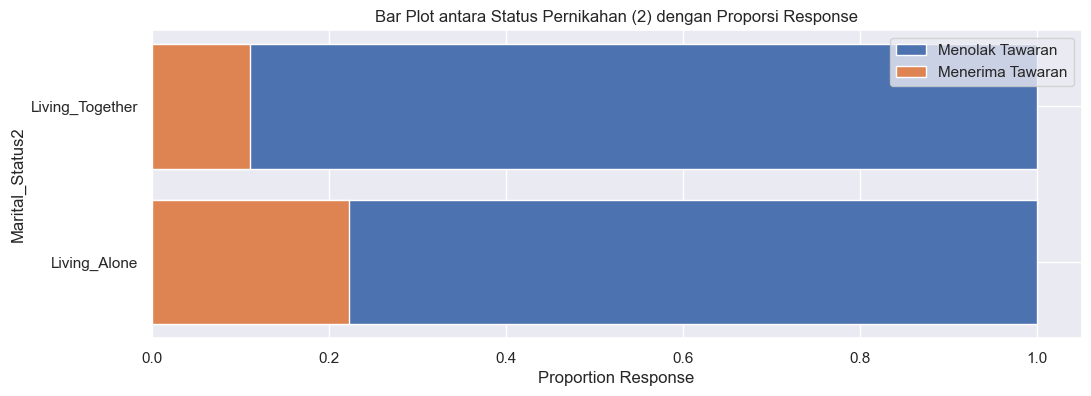

In [137]:
ct=pd.crosstab(df['Marital_Status2'],df['Response'],normalize='index').sort_index()
ct['total']=ct.sum(axis=1)
plt.figure(figsize=(12,4))
plt.barh(np.arange(df['Marital_Status2'].nunique()),ct['total'])
plt.barh(np.arange(df['Marital_Status2'].nunique()),ct[1])
plt.xlabel('Proportion Response')
plt.ylabel('Marital_Status2')
plt.legend(['Menolak Tawaran','Menerima Tawaran'])
plt.yticks(np.arange(len(ct.index.tolist())),ct.index.tolist())
plt.title('Bar Plot antara Status Pernikahan (2) dengan Proporsi Response')
plt.show()

Untuk hasil pengelompokan ulang, dapat terlihat dari bar plot diatas, **customer yang hidup sendiri** cenderung lebih **berminat untuk menerima tawaran campaign** dengan persentase **22,25%**. Hal ini mungkin wajar mengingat orang yang hidup sendiri cenderung bebas mengalokasikan uangnya dibanding orang yang hidup berdua dengan pasangan.

Sekarang, mari kita cek secara statistik menggunakan **Proportion Z-test**, apakah proporsi customer yang menolak tawaran campaign memang secara signifikan lebih rendah pada customer yang memiliki pasangan dibanding customer yang tidak memiliki pasangan.

In [138]:
stats, pval=proportions_ztest(df_ct.sort_values('Marital_Status2', ascending=False)[1],df_ct.sort_values('Marital_Status2', ascending=False).sum(axis=1),alternative='smaller')
print(stats,pval)
if pval<=0.05:
    print('Tolak Ho')
else:
    print('Terima Ho')

-6.603251848639277 2.011176704428643e-11
Tolak Ho


Dari hasil uji **Proportion Z-test**, dapat terlihat bahwa memang proporsi customer yang menerima offer secara signifikan **lebh rendah** pada customer yang memiliki pasangan dibanding customer yang tidak memiliki pasangan.

**Jawaban pertanyaan:**
* Berdasarkan status perkawinan, customer segmen apa yang lebih cenderung menerima tawaran campaign?
    * Secara persentase, Customer yang **hidup sendiri** lebih cenderung lebih tertarik menerima campaign.
* Apakah proporsi customer yang menerima tawaran campaign signifikan berbeda dari yang lain?
    * Proporsi customer yang menerima offer secara signifikan **lebih rendah** pada customer yang memiliki pasangan dibanding customer yang tidak memiliki pasangan

##### `Is_Parent` & `Children`

**Akan menjawab pertanyaan:**
* Customer mana yang memiliki kecenderungan untuk menerima tawaran campaign, yang merupakan orang tua (mempunyai anak) atau yang tidak?
* Bagaimana tren pengaruh jumlah anak terhadap kecenderungan untuk menerima tawaran campaign?
* Apakah proporsi customer yang menerima tawaran campaign secara signifikan lebih rendah pada segment tertentu atau tidak?

Pertama, kita buat bar plot antara kolom `Is_Parent` dengan `Response`

In [139]:
ct=pd.crosstab(df['Is_Parent'],df['Response'],normalize='index').sort_index()
ct['total']=ct.sum(axis=1)

In [140]:
ct

Response          0         1  total
Is_Parent                           
0          0.734177  0.265823  1.0  
1          0.895570  0.104430  1.0

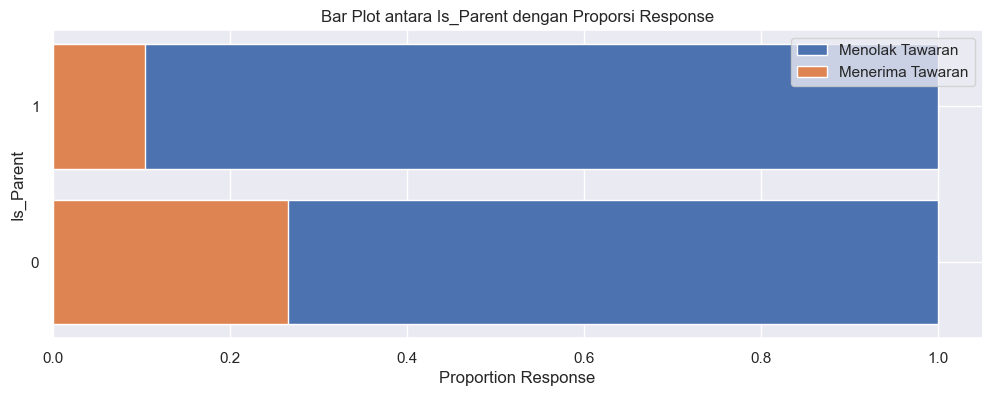

In [141]:

plt.figure(figsize=(12,4))
plt.barh(np.arange(df['Is_Parent'].nunique()),ct['total'])
plt.barh(np.arange(df['Is_Parent'].nunique()),ct[1])
plt.ylabel('Is_Parent')
plt.xlabel(f'Proportion Response')
plt.legend(['Menolak Tawaran','Menerima Tawaran'])
plt.yticks(np.arange(len(ct.index.tolist())),ct.index.tolist())
plt.title('Bar Plot antara Is_Parent dengan Proporsi Response')
plt.show()

Dari grafik diatas, terlihat customer yang **tidak memiliki anak** cenderung memiliki presentase **menerima tawaran campaign lebih tinggi** dibanding customer yang **memiliki anak**. Kemudian kita akan menganalisis berdasarkan jumlah anak (`Children`), dimana kita akan membuat bar-plot proportion `Children` terhadap kolom `Target`.

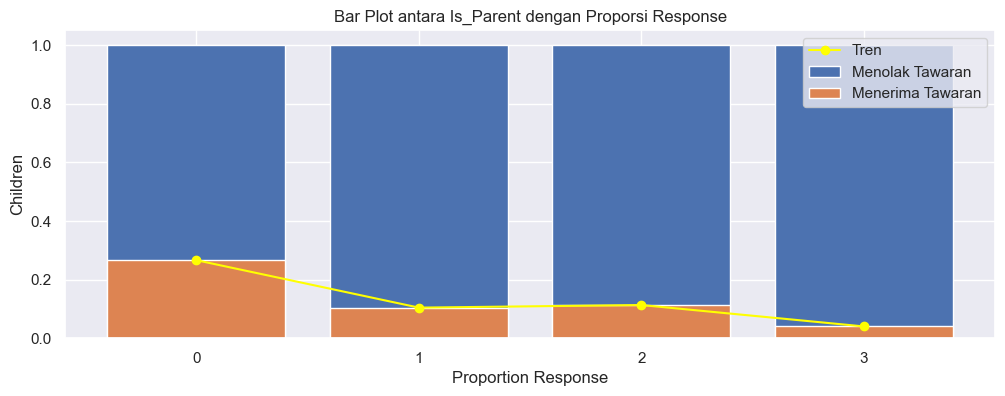

In [142]:
ct=pd.crosstab(df['Children'],df['Response'],normalize='index').sort_index()
ct['total']=ct.sum(axis=1)
plt.figure(figsize=(12,4))
plt.bar(np.arange(df['Children'].nunique()),ct['total'])
plt.bar(np.arange(df['Children'].nunique()),ct[1])
plt.plot(np.arange(df['Children'].nunique()),ct[1],'-o',color='yellow')
plt.xlabel('Proportion Response')
plt.ylabel('Children')
plt.legend(['Tren','Menolak Tawaran','Menerima Tawaran'])
plt.xticks(np.arange(len(ct.index.tolist())),ct.index.tolist())
plt.title('Bar Plot antara Is_Parent dengan Proporsi Response')
plt.show()

Terlihat dari trend, **semakin banyak anak** yang dimiliki customer, akan cenderung **menurunkan** presentase customer tersebut akan **menerima tawaran campaign**. Hal ini sesuai dengan hasil correlation matrix.

Kemudian kita buat pie chart antara `Is_Parent` & `Children` dengan Response untuk melihat persebaran nya.

In [143]:
fig=px.sunburst(df,path=['Is_Parent','Response'],color='Response', title='Proporsi Is_Parent Berdasarkan Response')
fig.show()

In [144]:
fig=px.sunburst(df,path=['Children','Response'],color='Response', title='Proporsi Children Berdasarkan Response')
fig.show()

Selanjutnya kita akan mengecek apakah proporsi customer yang menerima penawaran campaign memang signifikan lebih rendah pada customer yang memiliki anak dibanding customer yang tidak memiliki anak menggunakan **Two sample Z-test for Proportions**.

In [145]:
df_ct=pd.crosstab(df['Is_Parent'],df['Response'])

In [146]:
df_ct

Response      0    1
Is_Parent           
0          464   168
1          1415  165

In [147]:
df_ct.sort_values('Is_Parent', ascending=False)

Response      0    1
Is_Parent           
1          1415  165
0          464   168

In [148]:
stats, pval=proportions_ztest(df_ct.sort_values('Is_Parent', ascending=False)[1],df_ct.sort_values('Is_Parent', ascending=False).sum(axis=1),alternative='smaller')
print(stats,pval)
if pval<=0.05:
    print('Tolak Ho')
else:
    print('Terima Ho')

-9.589086374974642 4.443421472950128e-22
Tolak Ho


Dari hasil uji **Two sample Z-test for Proportions**, dapat dilihat bahwa memang proporsi customer yang menerima tawaran campaign secara signifikan **lebih rendah** pada customer yang memiliki anak dibanding yang tidak memiliki anak.

**Jawaban pertanyaan:**
* Customer mana yang memiliki kecenderungan untuk menerima tawaran campaign, yang merupakan orang tua (mempunyai anak) atau yang tidak?
    * Customer yang tidak tidak memiliki keturunan (`Is_Parent`=0) cenderung lebih suka menerima penawaran campaign. Tercatat **26.58%** customer menerima tawaran campaign dari segment tersebut.
* Bagaimana tren pengaruh jumlah anak terhadap kecenderungan untuk menerima tawaran campaign?
    * Semakin banyak jumlah anak, semakin rendah kecenderungan nya untuk menerima tawaran campaign.
* Apakah proporsi customer yang menerima tawaran campaign secara signifikan lebih rendah pada segment tertentu atau tidak?
    * Proporsi customer yang menerima tawaran campaign secara signifikan **lebih rendah** pada customer yang memiliki anak dibanding yang tidak memiliki anak.

##### `Education`

**Akan menjawab pertanyaan:**
* Secara jumlah, customer segment `Education` apa yang paling banyak menerima tawaran campaign?
* Secara proporsi, customer segment `Education` apa yang paling banyak menerima tawaran campaign?
* Apakah gender memiliki pengaruh terhadap minat customer untuk menerima tawaran campaign?

Pada bagian ini kita akan menganalisa apakah kolom `Education` berpengaruh terhadap minat customer untuk menerima tawaran campaign terakhir (Kolom `Response`).

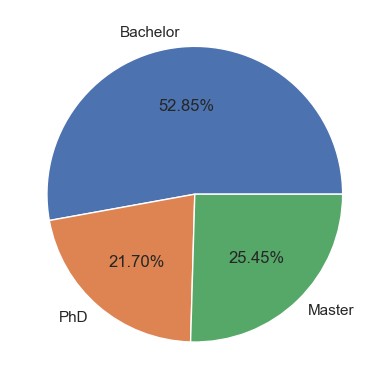

In [149]:
warnings.filterwarnings('ignore')
%matplotlib inline
sns.set()
l,a = list(set(df['Education'])),[]
for j in range(len(l)):
    a.append(df['Education'].to_list().count(l[j]))
    l[j] = l[j]
plt.pie(a,labels=l,autopct='%1.2f%%')
plt.show()

In [150]:
ct=pd.crosstab(df['Education'],df['Response']).sort_index()
ct['total']=ct.sum(axis=1)

In [151]:
ct

Response      0    1  total
Education                  
Bachelor   1015  154  1169 
Master     485   78   563  
PhD        379   101  480

Berdasarkan pie chart diatas, value `Bachelor` atau mahasiswa/lulusan S1 memiliki proporsi terbanyak. Untuk melihat proporsi setiap value pada kolom `Education` terhadap keputusan nya akan menerima (1) atau menolak (0) tawaran campaign, mari kita buat plot bar nya

Paling banyak menerima tawaran campaign: `Bachelor`

In [152]:
ct=pd.crosstab(df['Education'],df['Response'],normalize='index').sort_index()
ct['total']=ct.sum(axis=1)

In [153]:
ct

Response          0         1  total
Education                           
Bachelor   0.868263  0.131737  1.0  
Master     0.861456  0.138544  1.0  
PhD        0.789583  0.210417  1.0

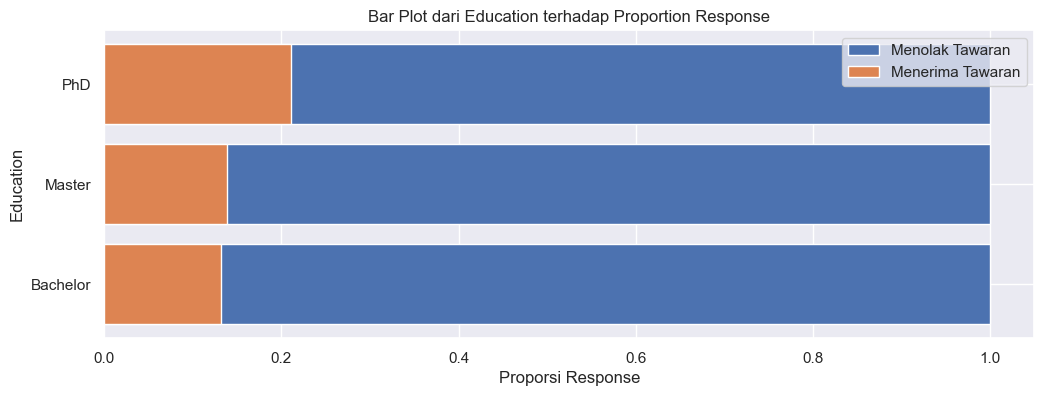

In [154]:
plt.figure(figsize=(12,4))
plt.barh(np.arange(df['Education'].nunique()),ct['total'])
plt.barh(np.arange(df['Education'].nunique()),ct[1])
plt.xlabel('Proporsi Response')
plt.ylabel('Education')
plt.legend(['Menolak Tawaran','Menerima Tawaran'])
plt.yticks(np.arange(len(ct.index.tolist())),ct.index.tolist())
plt.title('Bar Plot dari Education terhadap Proportion Response')
plt.show()

Namun, dalam plot terlihat value `Bachelor` memiliki proporsi penolakan terhadap penawaran terbesar dibanding value lainnya. Untuk melihat proporsi secara detailnya, disajikan melalui pie chart dibawah ini.

In [155]:
fig=px.sunburst(df,path=['Education','Response'],color='Response', title=f'Proporsi Response berdasarkan Education')
fig.show()

Selanjutnya, kita akan menguji apakah `Education` memiliki pengaruh terhadap minat customer untuk menerima tawaran campaign terakhir. Pengujian menggunakan **Chi Square Contigency Test** karena kita akan menguji 2 variabel kategorik.

In [156]:
df_ct= pd.crosstab(df['Education'],df['Response'])
score, pval, dof,exp=chi2_contingency(df_ct)
print(score, pval)
if pval<=0.05:
    print('Ho ditolak')
else:
    print('Ho diterima')

17.322969098820767 0.00017312710029811733
Ho ditolak


Hasil uji dengan chi square juga mengkonfirmasi bahwa `Education` memiliki pengaruh terhadap minat customer untuk menerima campaign.

**Jawaban Pertanyaan:**
* Secara jumlah, customer segment `Education` apa yang paling banyak menerima tawaran campaign?
    * Customer dari segment `Bachelor` paling banyak menerima tawaran campaign dengan jumlah **154**.
* Secara proporsi, customer segment `Education` apa yang paling banyak menerima tawaran campaign?
    * Customer dari segment `PhD` memiliki proporsi penerimaan tawaran campaign tertinggi sebesar **21.04%**.
* Apakah `Education` memiliki pengaruh terhadap minat customer untuk menerima tawaran campaign?
    * **Ada** pengaruh `Education` terhadap minat customer untuk menerima tawaran campaign

##### `Dt_Customer`

**Akan menjawab pertanyaan:**
* Bagaimana tren penerimaan tawaran campaign dari waktu ke waktu?
* Pada periode waktu kapan, customer cenderung lebih menerima tawaran campaign?

Kita buat cross tabulation untuk melihat tren penerimaan tawaran campaign customer dari waktu ke waktu.

In [157]:
df_my=pd.crosstab(df['Month_Year'],df['Response'])
df_my['total']=df_my.sum(axis=1)
df_my['percentage']=(df_my[1]/df_my['total'])*100

In [158]:
df_my

Response     0   1  total  percentage
Month_Year                           
2012-01     11  5   16     31.250000 
2012-02     6   3   9      33.333333 
2012-03     15  5   20     25.000000 
2012-04     13  4   17     23.529412 
2012-05     16  1   17     5.882353  
2012-06     9   5   14     35.714286 
2012-07     16  7   23     30.434783 
2012-08     66  25  91     27.472527 
2012-09     40  26  66     39.393939 
2012-10     58  23  81     28.395062 
2012-11     47  14  61     22.950820 
2012-12     61  14  75     18.666667 
2013-01     78  17  95     17.894737 
2013-02     95  16  111    14.414414 
2013-03     88  13  101    12.871287 
2013-04     80  16  96     16.666667 
2013-05     78  12  90     13.333333 
2013-06     81  12  93     12.903226 
2013-07     82  12  94     12.765957 
2013-08     91  12  103    11.650485 
2013-09     79  6   85     7.058824  
2013-10     85  19  104    18.269231 
2013-11     84  12  96     12.500000 
2013-12     96  6   102    5.882353  
2014-01     70  8   78     10.256410 
2014-02     56  8   64     12.500000 
2014-03     71  7   78     8.974359  
2014-04     66  5   71     7.042254  
2014-05     75  5   80     6.250000  
2014-06     55  6   61     9.836066  
2014-07     21  3   24     12.500000 
2014-08     14  2   16     12.500000 
2014-09     12  0   12     0.000000  
2014-10     19  3   22     13.636364 
2014-11     23  0   23     0.000000  
2014-12     22  1   23     4.347826

Kemudian kita buat line plot untuk melihat tren jumlah customer dan penerimaan campaign dari waktu ke waktu.

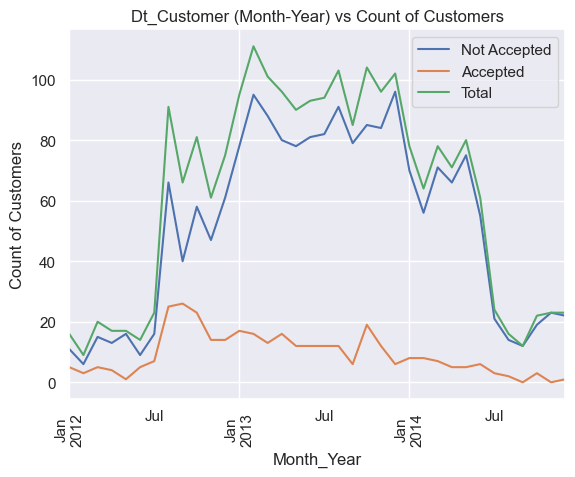

In [159]:
barplot = df_my.drop(columns=['percentage']).plot.line(rot = 0)
plt.xticks(rotation = 90)
plt.title('Dt_Customer (Month-Year) vs Count of Customers')
plt.ylabel('Count of Customers')
plt.xlabel('Month_Year')
plt.legend(['Not Accepted','Accepted','Total'])
plt.show()

Terlihat jumlah total pendaftar **meningkat drastis** pada bulan **Agustus 2012**, kemudian **meningkat lumayan banyak** lagi pada bulan **November 2012** hingga mencapai puncak di bulan **Februari 2013**. **Penurunan** pendaftar terjadi pada bulan **Desember 2013** - **Februari 2014** dan **menurun drastis** lagi pada bulan **Juni-Juli 2014** dan tidak pernah kembali ke level sebelumnya.<br><br>
Kemudian jika dilihat dari jumlah penerimaan tawaran, juga terdapat **peningkatan drastis** pada bulan **Agustus 2012**, namun tren nya selalu **menurun** hingga masa akhir campaign.

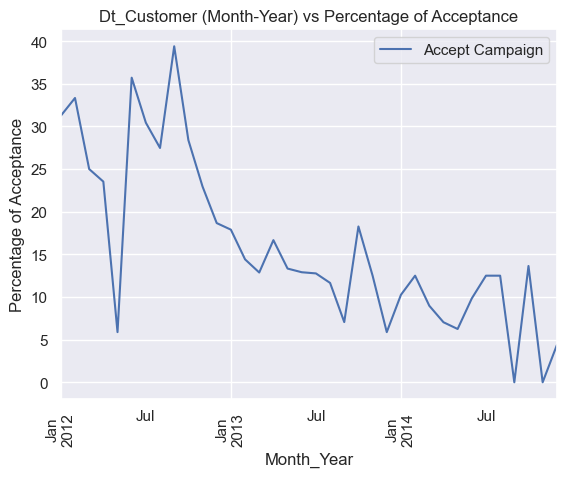

In [160]:
barplot = df_my.drop(columns=[0,1,'total']).plot.line(rot = 0)
plt.xticks(rotation = 90)
plt.title('Dt_Customer (Month-Year) vs Percentage of Acceptance')
plt.ylabel('Percentage of Acceptance')
plt.xlabel('Month_Year')
plt.legend(['Accept Campaign'])
plt.show()

Jika dilihat secara persentase, memang pada bulan **Juli-September 2012** penerimaan campaign mencapai **masa jayanya**, namun setelah itu cenderung menurun hingga akhir.

Untuk lebih detailnya, kita akan menganalisa dengan membagi segmen `Dt_Customer` dalam bulan.

Kita buat cross tabulation untuk melihat tren penerimaan tawaran campaign customer dari bulan ke bulan.

In [161]:
df_m=pd.crosstab(df['Month'],df['Response'])
df_m['total']=df_m.sum(axis=1)
df_m['percentage']=(df_m[1]/df_m['total'])*100

In [162]:
df_m

Response    0   1  total  percentage
Month                               
1         159  30  189    15.873016 
2         157  27  184    14.673913 
3         174  25  199    12.562814 
4         159  25  184    13.586957 
5         169  18  187    9.625668  
6         145  23  168    13.690476 
7         119  22  141    15.602837 
8         171  39  210    18.571429 
9         131  32  163    19.631902 
10        162  45  207    21.739130 
11        154  26  180    14.444444 
12        179  21  200    10.500000

Kemudian kita buat line plot untuk melihat tren jumlah customer dan penerimaan campaign dari bulan ke bulan.

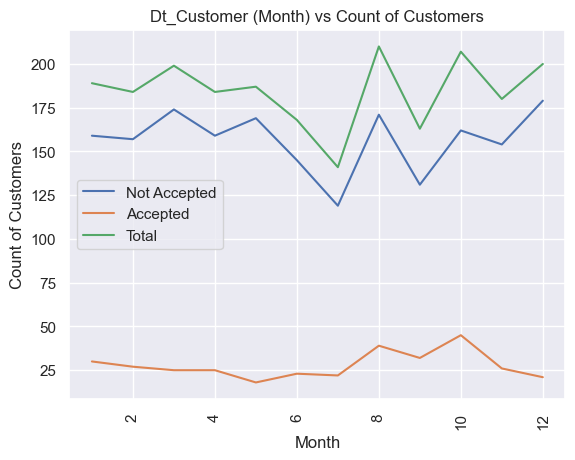

In [163]:
barplot = df_m.drop(columns=['percentage']).plot.line(rot = 0)
plt.xticks(rotation = 90)
plt.title('Dt_Customer (Month) vs Count of Customers')
plt.ylabel('Count of Customers')
plt.xlabel('Month')
plt.legend(['Not Accepted','Accepted','Total'])
plt.show()

Terlihat secara total, customer **menurun** di bulan **Maret-Juli**, kemudian meningkat pada bulan **Agustus**. Sementara itu, customer yang menerima offer mengalami **pengingkatan** pada bulan **Mei-Oktober**.

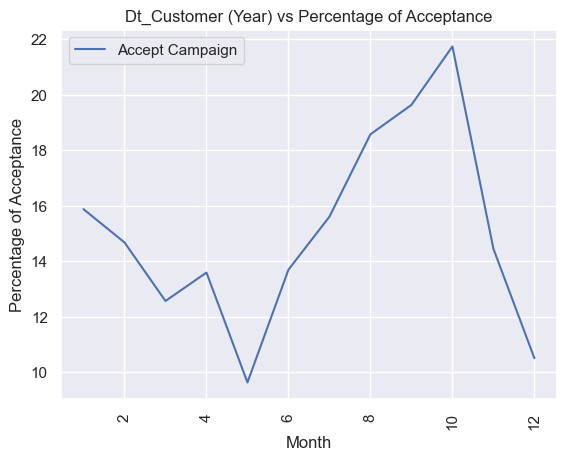

In [164]:
barplot = df_m.drop(columns=[0,1,'total']).plot.line(rot = 0)
plt.xticks(rotation = 90)
plt.title('Dt_Customer (Year) vs Percentage of Acceptance')
plt.ylabel('Percentage of Acceptance')
plt.xlabel('Month')
plt.legend(['Accept Campaign'])
plt.show()

Secara persentase juga pada bulan **Mei-Oktober**, customer juga cenderung mengalami tren **peningkatan**.

**Jawaban Pertanyaan:**
* Bagaimana tren penerimaan tawaran campaign dari waktu ke waktu?
    * Terdapat peningkatan persentase penerimaan campaign dari awal periode hingga mencapai puncaknya pada September 2012 dengan nilai 39,39%, namun setelah itu mengalami penurunan hingga akhir periode masa campaign.
* Pada periode waktu kapan, customer cenderung lebih menerima tawaran campaign?
    * Terlihat tren peningkatan persentase penerimaan campaign dari bulan Juni hingga mencapai puncaknya pada Oktober dengan nilai 21.74%.

#### 3. Analisis RFM

**Pertanyaan:**
* Berdasarkan **Jumlah hari sejak pembelian terakhir** pelanggan, **jumlah pembelian**, dan total **amount spent**, segment customer apa yang terbesar?
* Bagaimana **karakteristik** segment terbesar tersebut?
* Bagaimana **karakteristik segment yang dicari (champions)**?

Analisis [RFM (Recency , Frequency, dan Monetary)](http://www.brucehardie.com/papers/rfm_clv_2005-02-16.pdf) adalah metode yang digunakan untuk menganalisis value dan segmentasi pelanggan yang umum digunakan dalam database & Direct. Metode ini telah mendapat perhatian khusus dalam industri layanan ritel dan profesional.

Dalam dataset ini, telah disesuaikan ketiga unsur RFM tersebut yang disajikan sebagai berikut:
* Recency – How recently did the customer purchase? -> `Recency`
* Frequency – How often do they purchase? -> `Total_Purchases`
* Monetary Value – How much do they spend? -> `Total_Products`

Kita buat kolom RFM sesuai kriteria diatas.

In [165]:
df['Recency_RFM']=df['Recency']
df['Frequency_RFM']=df['Total_Purchases']
df['Monetary_RFM']=df['Total_Products']

In [166]:
df

Year_Birth Education Marital_Status   Income  Kidhome  Teenhome  \
0     1957        Bachelor  Single         58138.0  0        0          
1     1954        Bachelor  Single         46344.0  1        1          
2     1965        Bachelor  Together       71613.0  0        0          
3     1984        Bachelor  Together       26646.0  1        0          
4     1981        PhD       Married        58293.0  1        0          
...    ...        ...           ...            ... ..       ..          
2235  1967        Bachelor  Married        61223.0  0        1          
2236  1946        PhD       Together       64014.0  2        1          
2237  1981        Bachelor  Divorced       56981.0  0        0          
2238  1956        Master    Together       69245.0  0        1          
2239  1954        PhD       Married        52869.0  1        1          

     Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  \
0    2012-04-09   58       635       88         546               
1    2014-08-03   38       11        1          6                 
2    2013-08-21   26       426       49         127               
3    2014-10-02   26       11        4          20                
4    2014-01-19   94       173       43         118               
...         ...   ..       ...       ..         ...               
2235 2013-06-13   46       709       43         182               
2236 2014-10-06   56       406       0          30                
2237 2014-01-25   91       908       48         217               
2238 2014-01-24   8        428       30         214               
2239 2012-10-15   40       84        3          61                

      MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
0     172              88                88            3                   
1     2                1                 6             2                   
2     111              21                42            1                   
3     10               3                 5             2                   
4     46               27                15            5                   
...   ..               ..                ..           ..                   
2235  42               118               247           2                   
2236  0                0                 8             7                   
2237  32               12                24            1                   
2238  80               30                61            2                   
2239  2                1                 21            3                   

      NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
0     8                10                   4                   
1     1                1                    2                   
2     8                2                    10                  
3     2                0                    4                   
4     5                3                    6                   
...  ..               ..                   ..                   
2235  9                3                    4                   
2236  8                2                    5                   
2237  2                3                    13                  
2238  6                5                    10                  
2239  3                1                    4                   

      NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
0     7                  0             0             0              
1     5                  0             0             0              
2     4                  0             0             0              
3     6                  0             0             0              
4     5                  0             0             0              
...  ..                 ..            ..            ..              
2235  5                  0             0             0              
2236  7                  0             0             0              
2237  6  

In [167]:
df.describe()[['Recency_RFM','Frequency_RFM','Monetary_RFM']]

Recency_RFM  Frequency_RFM  Monetary_RFM
count  2212.000000  2212.000000    2212.000000 
mean   49.019439    12.566908      607.268083  
std    28.943121    7.205427       602.513364  
min    0.000000     0.000000       5.000000    
25%    24.000000    6.000000       69.000000   
50%    49.000000    12.000000      397.000000  
75%    74.000000    18.250000      1048.000000 
max    99.000000    32.000000      2525.000000

Dilihat dari deskripsi numerik dari dataset, kita akan membagi menjadi 5 buah equal-sized bucket yang diranking berdasarkan urutan label menggunakan [pandas.qcut](https://pandas.pydata.org/docs/reference/api/pandas.qcut.html):
* Recency –> semakin kecil Recency, semakin tinggi score nya
* Frequency –> semakin besar Frequency, semakin tinggi score nya
* Monetary -> semakin besar Monetary, semakin tinggi score nya

In [168]:
df['Recency_Score'] = pd.qcut(df['Recency_RFM'], 5, labels=[5, 4, 3, 2, 1])
df['Frequency_Score'] = pd.qcut(df['Frequency_RFM'], 5, labels=[1, 2, 3, 4, 5])
df['Monetary_Score'] = pd.qcut(df['Monetary_RFM'], 5, labels=[1, 2, 3, 4, 5])
df['RFM_Score'] = df['Recency_Score'].astype(str) + df['Frequency_Score'].astype(str)

In [169]:
df = df.reset_index()

In [170]:
df

index  Year_Birth Education Marital_Status   Income  Kidhome  Teenhome  \
0     0      1957        Bachelor  Single         58138.0  0        0          
1     1      1954        Bachelor  Single         46344.0  1        1          
2     2      1965        Bachelor  Together       71613.0  0        0          
3     3      1984        Bachelor  Together       26646.0  1        0          
4     4      1981        PhD       Married        58293.0  1        0          
...  ..       ...        ...           ...            ... ..       ..          
2207  2235   1967        Bachelor  Married        61223.0  0        1          
2208  2236   1946        PhD       Together       64014.0  2        1          
2209  2237   1981        Bachelor  Divorced       56981.0  0        0          
2210  2238   1956        Master    Together       69245.0  0        1          
2211  2239   1954        PhD       Married        52869.0  1        1          

     Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  \
0    2012-04-09   58       635       88         546               
1    2014-08-03   38       11        1          6                 
2    2013-08-21   26       426       49         127               
3    2014-10-02   26       11        4          20                
4    2014-01-19   94       173       43         118               
...         ...   ..       ...       ..         ...               
2207 2013-06-13   46       709       43         182               
2208 2014-10-06   56       406       0          30                
2209 2014-01-25   91       908       48         217               
2210 2014-01-24   8        428       30         214               
2211 2012-10-15   40       84        3          61                

      MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
0     172              88                88            3                   
1     2                1                 6             2                   
2     111              21                42            1                   
3     10               3                 5             2                   
4     46               27                15            5                   
...   ..               ..                ..           ..                   
2207  42               118               247           2                   
2208  0                0                 8             7                   
2209  32               12                24            1                   
2210  80               30                61            2                   
2211  2                1                 21            3                   

      NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
0     8                10                   4                   
1     1                1                    2                   
2     8                2                    10                  
3     2                0                    4                   
4     5                3                    6                   
...  ..               ..                   ..                   
2207  9                3                    4                   
2208  8                2                    5                   
2209  2                3                    13                  
2210  6                5                    10                  
2211  3                1                    4                   

      NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
0     7                  0             0             0              
1     5                  0             0             0              
2     4                  0             0             0              
3     6                  0             0             0              
4     5                  0             0             0              
...  ..                 ..            ..            ..              
2207  5                  0             0             0         

Menurut artikel yang dimuat dalam [clevertap.com](https://clevertap.com/blog/rfm-analysis/), segmentasi analisis RFM dapat dibagi 10, yaitu:
| Segmentasi            | R-Score   | F-Score   |
| --------------------- | --------- | --------- |
| Hibernating           | 1-2       | 1-2       |
| At Risk               | 1-2       | 3-4       |
| Can't Lose Them       | 1-2       | 5         |
| About to Sleep        | 3         | 1-2       |
| Need Attention        | 3         | 3         |
| Loyal Customers       | 3-4       | 4-5       |
| Promising             | 4         | 1         |
| New Customers         | 5         | 1         |
| Potential Loyalist    | 4-5       | 2-3       |
| Champions             | 5         | 4-5       |

Untuk score **Monetary** akan diwakilkan oleh score **Frequency** karena keduanya memiliki **korelasi positif yang kuat** jika merujuk kepada **Correlation Matrix**.

In [171]:
seg_map = {
    r'[1-2][1-2]': 'hibernating',
    r'[1-2][3-4]': 'at_risk',
    r'[1-2]5': 'cant_lose_them',
    r'3[1-2]': 'about_to_sleep',
    r'33': 'need_attention',
    r'[3-4][4-5]': 'loyal_customers',
    r'41': 'promising',
    r'51': 'new_customers',
    r'[4-5][2-3]': 'potential_loyalists',
    r'5[4-5]': 'champions'
}

df['Segment'] = df['RFM_Score'].replace(seg_map, regex = True)

In [172]:
df

index  Year_Birth Education Marital_Status   Income  Kidhome  Teenhome  \
0     0      1957        Bachelor  Single         58138.0  0        0          
1     1      1954        Bachelor  Single         46344.0  1        1          
2     2      1965        Bachelor  Together       71613.0  0        0          
3     3      1984        Bachelor  Together       26646.0  1        0          
4     4      1981        PhD       Married        58293.0  1        0          
...  ..       ...        ...           ...            ... ..       ..          
2207  2235   1967        Bachelor  Married        61223.0  0        1          
2208  2236   1946        PhD       Together       64014.0  2        1          
2209  2237   1981        Bachelor  Divorced       56981.0  0        0          
2210  2238   1956        Master    Together       69245.0  0        1          
2211  2239   1954        PhD       Married        52869.0  1        1          

     Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  \
0    2012-04-09   58       635       88         546               
1    2014-08-03   38       11        1          6                 
2    2013-08-21   26       426       49         127               
3    2014-10-02   26       11        4          20                
4    2014-01-19   94       173       43         118               
...         ...   ..       ...       ..         ...               
2207 2013-06-13   46       709       43         182               
2208 2014-10-06   56       406       0          30                
2209 2014-01-25   91       908       48         217               
2210 2014-01-24   8        428       30         214               
2211 2012-10-15   40       84        3          61                

      MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
0     172              88                88            3                   
1     2                1                 6             2                   
2     111              21                42            1                   
3     10               3                 5             2                   
4     46               27                15            5                   
...   ..               ..                ..           ..                   
2207  42               118               247           2                   
2208  0                0                 8             7                   
2209  32               12                24            1                   
2210  80               30                61            2                   
2211  2                1                 21            3                   

      NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
0     8                10                   4                   
1     1                1                    2                   
2     8                2                    10                  
3     2                0                    4                   
4     5                3                    6                   
...  ..               ..                   ..                   
2207  9                3                    4                   
2208  8                2                    5                   
2209  2                3                    13                  
2210  6                5                    10                  
2211  3                1                    4                   

      NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
0     7                  0             0             0              
1     5                  0             0             0              
2     4                  0             0             0              
3     6                  0             0             0              
4     5                  0             0             0              
...  ..                 ..            ..            ..              
2207  5                  0             0             0         

Kemudian kita buat pie chart untuk melihat proporsi pada tiap segmen berdasarkan analisis RFM.

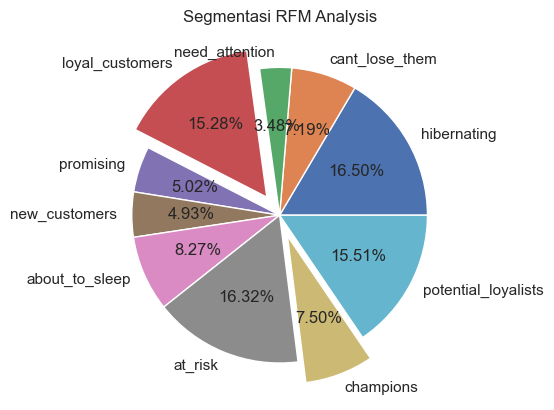

In [173]:
warnings.filterwarnings('ignore')
%matplotlib inline
sns.set()
l,a = list(set(df['Segment'])),[]
for j in range(len(l)):
    a.append(df['Segment'].to_list().count(l[j]))
    l[j] = l[j]
plt.pie(a,labels=l,autopct='%1.2f%%',explode=[0,0,0,0.15,0,0,0,0,0.15,0])
plt.title('Segmentasi RFM Analysis')
plt.show()

Berdasarkan pie chart hasil segmentasi analisis RFM, didapati segmen tertinggi yaitu `hibernating` & `at_risk` dengan proporsi masing-masing **16,50%** & **16,32%**. Hal ini menandakan bahwa kebanyakan customer sudah lama tidak melakukan pembelian (R-Score = 1-2).

In [174]:
df_champions = df[df['Segment']=='champions']

In [175]:
df_champions

index  Year_Birth Education Marital_Status   Income  Kidhome  Teenhome  \
5     5      1967        Master    Together       62513.0  0        1          
22    23     1954        PhD       Married        65324.0  0        1          
32    34     1946        Master    Married        68657.0  0        0          
38    40     1980        Bachelor  Married        80011.0  0        1          
47    51     1964        Master    Married        79143.0  0        0          
...   ..      ...           ...        ...            ... ..       ..          
2159  2185   1960        Bachelor  Married        67716.0  0        1          
2175  2201   1969        Bachelor  Single         57731.0  0        1          
2180  2206   1980        Bachelor  Married        61014.0  0        1          
2195  2221   1982        Master    Single         75777.0  0        0          
2210  2238   1956        Master    Together       69245.0  0        1          

     Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  \
5    2013-09-09   16       520       42         98                
22   2014-11-01   0        384       0          102               
32   2013-02-20   4        482       34         471               
38   2013-04-29   3        421       76         536               
47   2012-11-08   2        650       37         780               
...         ...  ..        ...       ..         ...               
2159 2013-10-01   8        530       142        217               
2175 2012-11-23   0        266       21         300               
2180 2012-11-08   17       269       129        495               
2195 2013-04-07   12       712       26         538               
2210 2014-01-24   8        428       30         214               

      MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
5     0                42                14            2                   
22    21               32                5             3                   
32    119              68                22            1                   
38    82               178               102           2                   
47    27               167               32            1                   
...   ..               ...               ..           ..                   
2159  62               9                 56            4                   
2175  65               8                 44            4                   
2180  182              43                29            4                   
2195  69               13                80            1                   
2210  80               30                61            2                   

      NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
5     6                4                    10                  
22    6                2                    9                   
32    3                5                    9                   
38    8                6                    5                   
47    6                9                    13                  
...  ..               ..                    ..                  
2159  7                4                    13                  
2175  8                8                    6                   
2180  9                3                    4                   
2195  3                6                    11                  
2210  6                5                    10                  

      NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
5     6                  0             0             0              
22    4                  0             0             0              
32    7                  0             0             0              
38    4                  0             0             0              
47    3                  0             0             0              
...  ..                 ..            ..            ..              
2159  5                  0             1             0         

In [176]:
Segment_RFM = df[['Age_Segment','Education','Marital_Status','Income_Segment','Children']]

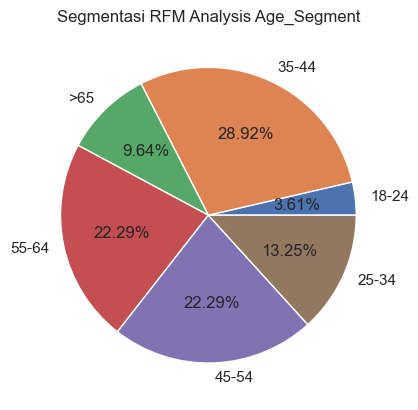

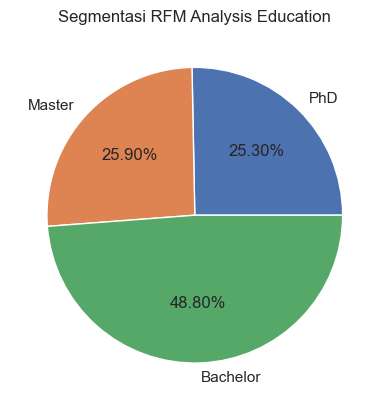

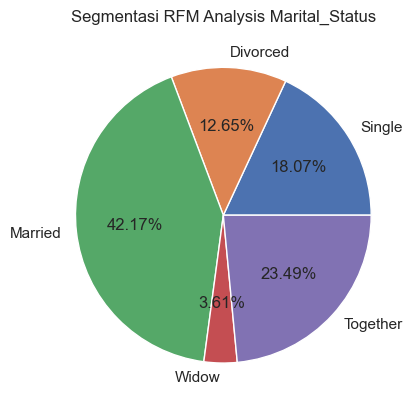

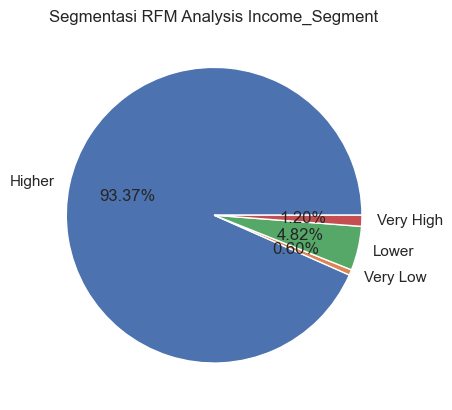

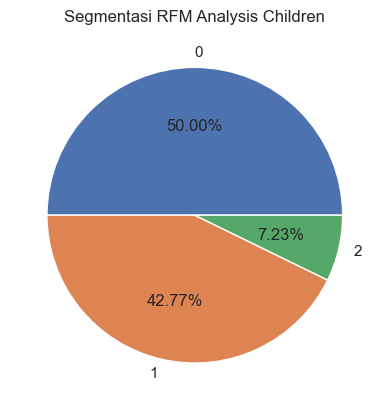

In [177]:
warnings.filterwarnings('ignore')
%matplotlib inline
sns.set()

for i in Segment_RFM:
    l,a = list(set(df_champions[i])),[]
    for j in range(len(l)):
        a.append(df_champions[i].to_list().count(l[j]))
        l[j] = l[j]
    plt.pie(a,labels=l,autopct='%1.2f%%')
    plt.title(f'Segmentasi RFM Analysis {i}')
    plt.show()

Dari pie chart diatas, dapat dilihat bahwa segmen `champions` memiliki:
* Hampir tiga perempat (73,5%) customer merupakan customer berusia 35-65%.
* Hampir setengah (48,80%) customer merupakan sedang menempuh / baru lulus jenjang S1.
* Hampir dua pertiga (65,66%) customer hidup bersama pasangan.
* Hampir semua customer memiliki pendapatan yang tinggi.
* Mayoritas customer tidak memiliki atau hanya memiliki 1 anak.

**Jawaban Pertanyaan:**
* Berdasarkan **Jumlah hari sejak pembelian terakhir** pelanggan, **jumlah pembelian**, dan total **amount spent**, segmen customer apa yang terbesar?
    * Dari segmentasi RFM, didapati segmen tertinggi yaitu `hibernating` & `at_risk` dengan proporsi hampir sepertiga dari segmen lainnya (**32,82%**).
* Bagaimana karakteristik segment tersebut?
    * Segmen `hibernating` terdiri dari customer yang telah lama mendaftar, namun belum pernah membeli produk baru-baru ini. Customer segmen ini perlu dibujuk untuk melakukan pembelian sesegera mungkin, atau produk kita akan kehilangan kepercayaan dan relevansi yang telah diciptakan sebelumnya. Approach bisa dilakukan melalui penawaran produk lain yang relevan dan perlu diberikan diskon khusus.
    * Segmen `at_risk` juga seperti `hibernating`, namun mereka cenderung lebih banyak melakukan pembelian di masa lalu. Untuk mentreatment segmen ini, bisa dilakukan dengan mengirim email atau pesan singkat agar bisa lebih keep in touch kepada customer tersebut. Kemudian juga bisa menawarkan campaign yang menarik.
* Bagaimana karakteristik segment yang dicari (champions)?
    * Menurut RFM Analysis yang mempertimbangkan `Recency`, didapati kebanyakan berusia 35-65 tahun yang hidup bersama pasangan yang memiliki 0-1 anak. Kebanyakan juga merupakah seorang yang sedang menempuh pendidikan atau sudah lulus sarjana dengan income $51,939 - $105,900.

<hr>

## **C.6 Export Dataset**

In [178]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2212 entries, 0 to 2211
Data columns (total 48 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   index                2212 non-null   int64         
 1   Year_Birth           2212 non-null   int64         
 2   Education            2212 non-null   object        
 3   Marital_Status       2212 non-null   object        
 4   Income               2212 non-null   float64       
 5   Kidhome              2212 non-null   int64         
 6   Teenhome             2212 non-null   int64         
 7   Dt_Customer          2212 non-null   datetime64[ns]
 8   Recency              2212 non-null   int64         
 9   MntWines             2212 non-null   int64         
 10  MntFruits            2212 non-null   int64         
 11  MntMeatProducts      2212 non-null   int64         
 12  MntFishProducts      2212 non-null   int64         
 13  MntSweetProducts     2212 non-nul

In [179]:
df.describe().T

count          mean           std     min       25%  \
index                2212.0  1122.538427   642.517593    0.0     568.75     
Year_Birth           2212.0  1968.913653   11.701599     1940.0  1959.00    
Income               2212.0  51958.810579  21527.278844  1730.0  35233.50   
Kidhome              2212.0  0.441682      0.536955      0.0     0.00       
Teenhome             2212.0  0.505877      0.544253      0.0     0.00       
Recency              2212.0  49.019439     28.943121     0.0     24.00      
MntWines             2212.0  305.287523    337.322940    0.0     24.00      
MntFruits            2212.0  26.329566     39.744052     0.0     2.00       
MntMeatProducts      2212.0  167.029837    224.254493    0.0     16.00      
MntFishProducts      2212.0  37.648734     54.772033     0.0     3.00       
MntSweetProducts     2212.0  27.046564     41.090991     0.0     1.00       
MntGoldProds         2212.0  43.925859     51.706981     0.0     9.00       
NumDealsPurchases    2212.0  2.324593      1.924507      0.0     1.00       
NumWebPurchases      2212.0  4.088156      2.742187      0.0     2.00       
NumCatalogPurchases  2212.0  2.672242      2.927542      0.0     0.00       
NumStorePurchases    2212.0  5.806510      3.250939      0.0     3.00       
NumWebVisitsMonth    2212.0  5.321429      2.425597      0.0     3.00       
AcceptedCmp3         2212.0  0.073689      0.261323      0.0     0.00       
AcceptedCmp4         2212.0  0.074141      0.262060      0.0     0.00       
AcceptedCmp5         2212.0  0.072785      0.259842      0.0     0.00       
AcceptedCmp1         2212.0  0.064195      0.245156      0.0     0.00       
AcceptedCmp2         2212.0  0.013562      0.115691      0.0     0.00       
Complain             2212.0  0.009042      0.094678      0.0     0.00       
Response             2212.0  0.150542      0.357683      0.0     0.00       
Age                  2212.0  45.086347     11.701599     18.0    37.00      
Children             2212.0  0.947559      0.749466      0.0     0.00       
Is_Parent            2212.0  0.714286      0.451856      0.0     0.00       
Year                 2212.0  2013.028029   0.685926      2012.0  2013.00    
Month                2212.0  6.517631      3.510681      1.0     3.00       
Total_Products       2212.0  607.268083    602.513364    5.0     69.00      
Total_Purchases      2212.0  12.566908     7.205427      0.0     6.00       
Total_Campaign       2212.0  0.448915      0.893017      0.0     0.00       
Accept_Campaign      2212.0  0.273056      0.445630      0.0     0.00       
Recency_RFM          2212.0  49.019439     28.943121     0.0     24.00      
Frequency_RFM        2212.0  12.566908     7.205427      0.0     6.00       
Monetary_RFM         2212.0  607.268083    602.513364    5.0     69.00      

                         50%       75%       max  
index                1121.5   1678.25   2239.0    
Year_Birth           1970.0   1977.00   1996.0    
Income               51371.0  68487.00  162397.0  
Kidhome              0.0      1.00      2.0       
Teenhome             0.0      1.00      2.0       
Recency              49.0     74.00     99.0      
MntWines             175.5    505.00    1493.0    
MntFruits            8.0      33.00     199.0     
MntMeatProducts      68.0     232.25    1725.0    
MntFishProducts      12.0     50.00     259.0     
MntSweetProducts     8.0      33.00     262.0     
MntGoldProds         24.5     56.00     321.0     
NumDealsPurchases    2.0      3.00      15.0      
NumWebPurchases      4.0      6.00      27.0      
NumCatalogPurchases  2.0      4.00      28.0      
NumStorePurchases    5.0      8.00      13.0      
NumWebVisitsMonth    6.0      7.00      20.0      
AcceptedCmp3         0.0      0.00      1.0       
AcceptedCmp4         0.0      0.00      1.0       
AcceptedCmp5         0.0      0.00      1.0       
AcceptedCmp1         0.0      0.00      1.0       
AcceptedCmp2         0.0      0.00      1.0       

In [180]:
df.describe(include='int32').T

count      mean       std  min  25%  50%  75%  max
Is_Parent  2212.0  0.714286  0.451856  0.0  0.0  1.0  1.0  1.0

In [181]:
df.describe(include='object').T

count unique              top  freq
Education        2212  3      Bachelor         1169
Marital_Status   2212  5      Married          859 
Age_Segment      2212  6      35-44            732 
Income_Segment   2212  4      Higher           1082
Marital_Status2  2212  2      Living_Together  1430
RFM_Score        2212  25     41               111 
Segment          2212  10     hibernating      365

In [182]:
df.describe(include='category').T

count  unique  top  freq
Recency_Score    2212   5       5    452 
Frequency_Score  2212   5       1    515 
Monetary_Score   2212   5       1    444

In [183]:
df.describe(include='period[M]').T

count unique      top freq
Month_Year  2212  36     2013-02  111

In [184]:
list_item = []
for col in df.columns:
    list_item.append([col,df[col].nunique(),df[col].unique()])

tabel_desc = pd.DataFrame(columns=['Column Name','Num of Unique','Unique Data'],data=list_item)

In [185]:
pd.set_option('display.max_colwidth',-1)
tabel_desc

Column Name  Num of Unique  \
0   index                2212            
1   Year_Birth           56              
2   Education            3               
3   Marital_Status       5               
4   Income               1970            
5   Kidhome              3               
6   Teenhome             3               
7   Dt_Customer          662             
8   Recency              100             
9   MntWines             775             
10  MntFruits            158             
11  MntMeatProducts      553             
12  MntFishProducts      182             
13  MntSweetProducts     176             
14  MntGoldProds         212             
15  NumDealsPurchases    15              
16  NumWebPurchases      15              
17  NumCatalogPurchases  14              
18  NumStorePurchases    14              
19  NumWebVisitsMonth    16              
20  AcceptedCmp3         2               
21  AcceptedCmp4         2               
22  AcceptedCmp5         2               
23  AcceptedCmp1         2               
24  AcceptedCmp2         2               
25  Complain             2               
26  Response             2               
27  Age                  56              
28  Age_Segment          6               
29  Income_Segment       4               
30  Children             4               
31  Is_Parent            2               
32  Year                 3               
33  Month                12              
34  Month_Year           36              
35  Total_Products       1047            
36  Total_Purchases      33              
37  Total_Campaign       6               
38  Accept_Campaign      2               
39  Marital_Status2      2               
40  Recency_RFM          100             
41  Frequency_RFM        33              
42  Monetary_RFM         1047            
43  Recency_Score        5               
44  Frequency_Score      5               
45  Monetary_Score       5               
46  RFM_Score            25              
47  Segment              10              

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 

In [186]:
df.shape

(2212, 48)

Mengeksport dataset ke dalam format excel untuk dilakukan analisis menggunakan *Tableau Public*.

In [187]:
df.to_excel('Capstone 2 JCDSOL9 - Noor Kharismawan Akbar.xlsx',index=False)

<hr>

# **D. Kesimpulan dan Rekomendasi**

## **D.1 Kesimpulan**

Dari analisis yang telah dilakukan, akhirnya didapatkan jawaban atas problem yang dinyatakan sebelumnya yang tertuang pada poin-poin berikut:
1. Kinerja penjualan:
    * Semakin **tinggi pendapatan** dan semakin **sedikit keturunan** yang dimiliki customer, mereka lebih cenderung membeli **banyak produk** dan lebih **sering berbelanja**.
    * **Wine** & **Meat** merupakan produk yang paling **sering dibeli** & memberikan **pemasukan paling banyak** pada perusahaan kita. Sementara itu
    * Customer cenderung lebih **sering berbelanja langsung di toko**, namun amount spent nya lebih besar ketika berbelanja menggunakan **katalog**.
    * Jika dilihat dari **frekuensi pembelian** & **jumlah spent** nya, customer dengan pendidikan **`PhD`** memiliki total terbanyak, namun proporsi orang yang berpendidikan tinggi dalam dataset ini masih yang terrendah.
    * **Jumlah pendaftar** (customer baru) semakin **lama** semakin **sedikit**.<br><br>

2. Kinerja Marketing Campaign:
    * Customer yang **menerima penawaran** campaign lebih banyak untuk produk **Wine** & **Meat**, kemudian untuk pembelian menggunakan **katalog**. Pembelian melalui situs web lebih menarik customer ketika ada **diskon**.
    * Customer kebanyakan **menerima tawaran** campaign yang **terakhir**.
    * Customer yang cenderung menerima penawaran campaign berasal dari segmen pendapatan yang **tinggi** ($51,939 - $105,900), **hidup sendiri** (Single, Widow, Divorced), **tidak punya anak**, dan education **`PhD`**.
    * Acceptance rate campaign menunjukkan tren yang **menurun sejak Oktober 2012** hingga masa akhir campaign.<br><br>

3. Karakteristik Customer:
    * Berdasarkan analisis **RFM**, saat ini hampir **sepertiga** dari total customer sudah **lama tidak melakukan pembelian** dan **bukan** customer yang **sering sekali berbelanja**. Segmen ini perlu diberi approach dengan cara tertentu agar lebih sering menggunakan produk kita.
    * Berdasarkan analisis **RFM** juga, Customer yang **belum lama melakukan pembelian** & **sering melakukan pembelian** kebanyakan berusia **35-65 tahun** yang hidup **bersama pasangan** yang memiliki **0-1 anak**. Kebanyakan juga merupakah seorang yang sedang menempuh pendidikan atau sudah lulus **sarjana** dengan income **$51,939 - $105,900**.

## **D.2 Rekomendasi**

1. Melakukan **marketing campaign** di lokasi strategis yang banyak dikunjungi oleh orang berpendidikan tinggi seperti di dekat tempat **penelitian** & **Instansi pendidikan**.
2. **Jangan terlalu memandang status pernikahan** dalam targetting customer, cukup ditinjau secara umum saja apakah customer tersebut hidup sendiri atau bersama.
3. Memberikan promo berupa **paket bundling** untuk produk **Wine** & **Meat** karena dua produk itu yang paling berpengaruh pada total spent. Kemudian bisa ditambahkan promo juga untuk pembelian pada **Katalog**.
4. Sebagian besar customer sudah jarang berbelanja di market kita, sehingga perlu adanya approach dan penawaran yang membuat customer segera membeli produk kita. Contohnya dengan **Limited Time Offers**.
5. Untuk pengambilan data selanjutnya, alangkah baiknya jika diberi **keterangan rinci** mengenai **campaign** yang dilakukan agar bisa dilakukan analisis lebih dalam menggunakan [**RICE Framework**](https://www.productplan.com/glossary/rice-scoring-model/).